In [84]:
#Part 1 - Data Analysis

#importing essential libraries
from  more_itertools import unique_everseen

# to divide train and test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import joblib

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf, suppress=True)
pd.set_option('display.max_rows', None)

In [85]:
# load dataset
data = pd.read_csv('D:\Backup and Sync\Personal\Reas Estate Project\Dhaka_City_Apartment_Price_Estimation\DataSet\dhaka_city_apartment_price.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(8900, 6)


,property_type,location,bed,bath,total_sqft,price
0,Apartment,"Darussalam, Mirpur, Dhaka",3.0,3.0,"1,350 sqft","7,400,000"
1,Apartment,"Section 1, Mirpur, Dhaka",3.0,2.0,"1,300 sqft","5,800,000"
2,Apartment,"Chad Uddan Housing, Mohammadpur, Dhaka",2.0,2.0,600 sqft,"2,600,000"
3,Apartment,"Chad Uddan Housing, Mohammadpur, Dhaka",2.0,2.0,600 sqft,"2,600,000"
4,Apartment,"Bakshi Bazar, Lalbagh, Dhaka",3.0,2.0,"1,100 sqft","8,000,000"


In [86]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
data[vars_with_na].isnull().mean()

bed     0.000337
bath    0.000337
dtype: float64

In [87]:
def remove_sqft_text(x):
    sqft = x.split(' ')
    sqft[0]= sqft[0].replace(',', '') 
    return int((sqft[0]))

def remove_sqft_text(x):
    sqft = x.split(' ')
    sqft[0]= sqft[0].replace(',', '') 
    return int((sqft[0]))

data['price'] = data['price'].apply(remove_sqft_text)
data['total_sqft'] = data['total_sqft'].apply(remove_sqft_text)

In [88]:
#data['total_sqft'] = data['total_sqft'].apply(remove_sqft_text)
#data.head()

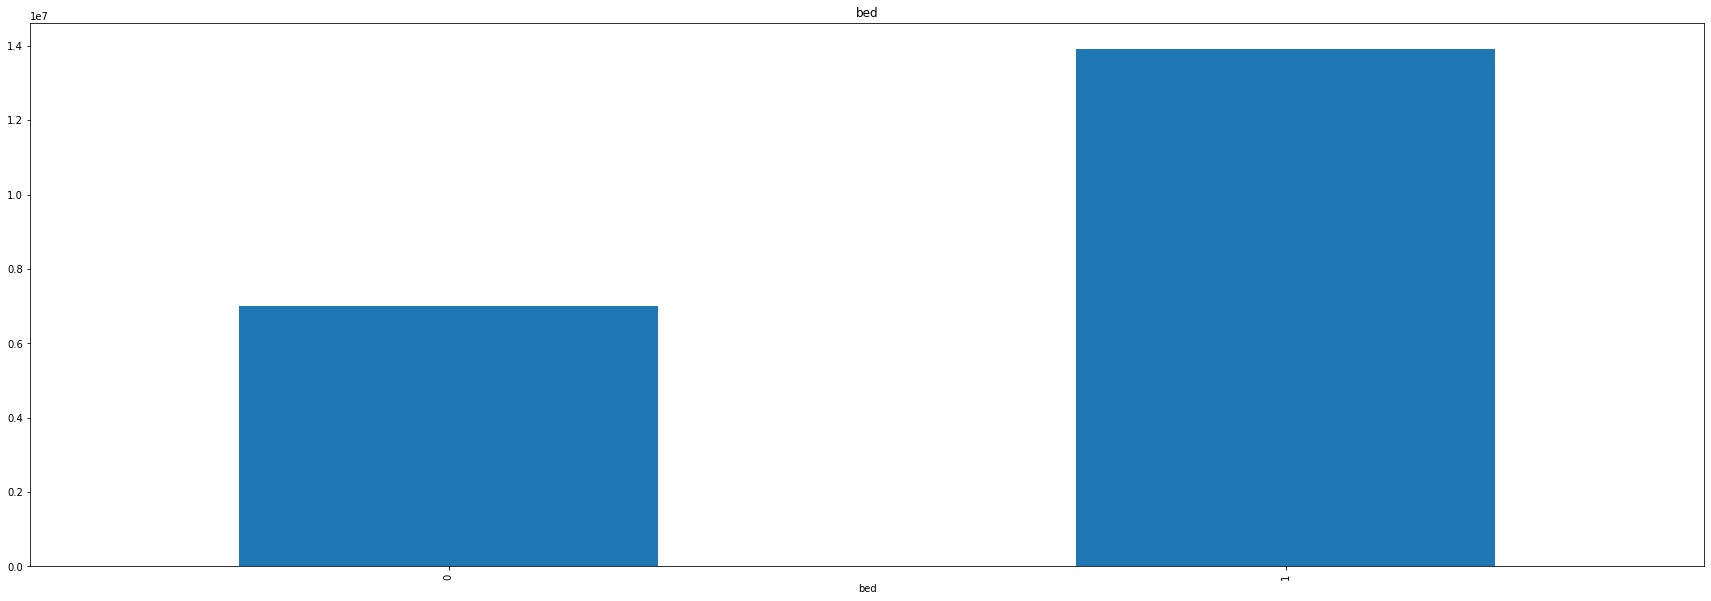

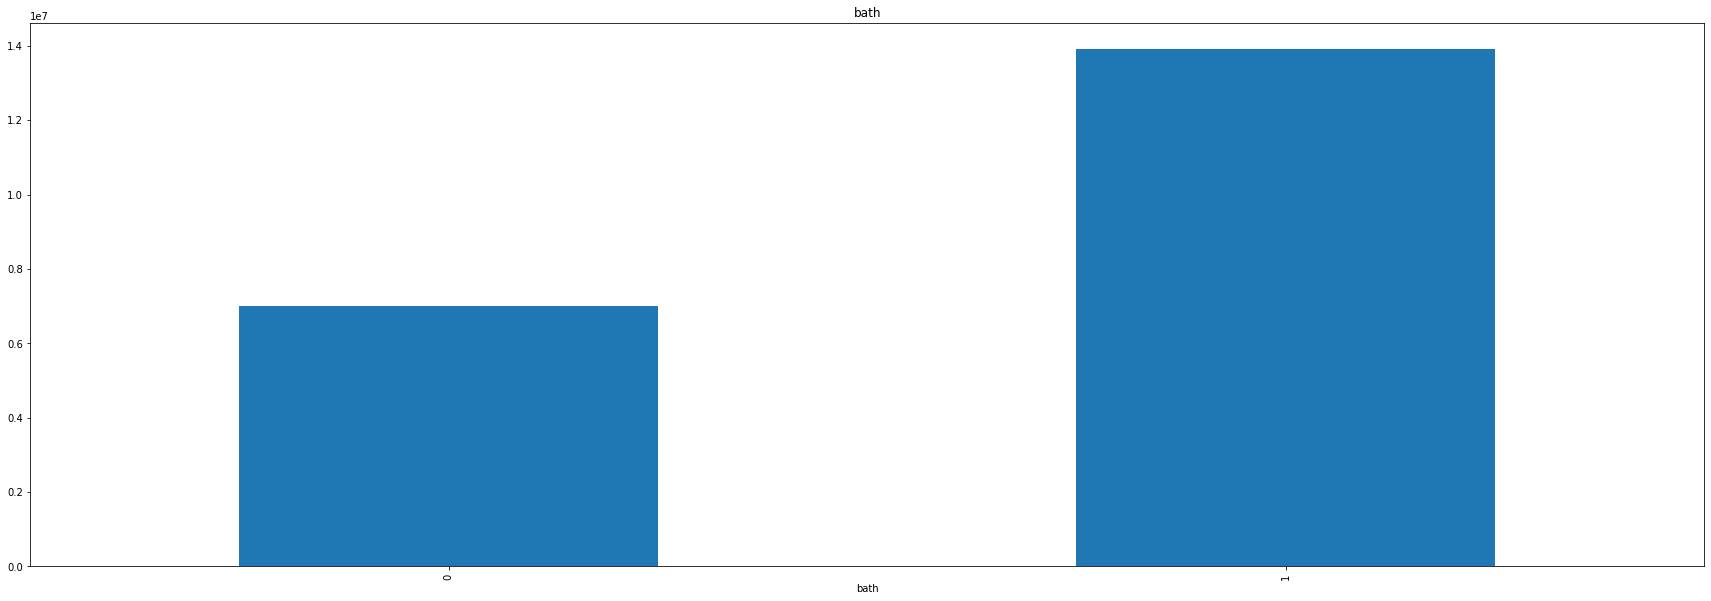

In [89]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)['price'].median().plot.bar()

    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

In [90]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  4


,bed,bath,total_sqft,price
0,3.0,3.0,1350,7400000
1,3.0,2.0,1300,5800000
2,2.0,2.0,600,2600000
3,2.0,2.0,600,2600000
4,3.0,2.0,1100,8000000


In [91]:
#  let's make a list of discrete variables within the numerical variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

# visualise the discrete variables
data[discrete_vars].head()

Number of discrete variables:  2


,bed,bath
0,3.0,3.0
1,3.0,2.0
2,2.0,2.0
3,2.0,2.0
4,3.0,2.0


In [92]:
# make list of categorical variables
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

# visualise the categorical variables
data[cat_vars].head()

Number of categorical variables:  2


,property_type,location
0,Apartment,"Darussalam, Mirpur, Dhaka"
1,Apartment,"Section 1, Mirpur, Dhaka"
2,Apartment,"Chad Uddan Housing, Mohammadpur, Dhaka"
3,Apartment,"Chad Uddan Housing, Mohammadpur, Dhaka"
4,Apartment,"Bakshi Bazar, Lalbagh, Dhaka"


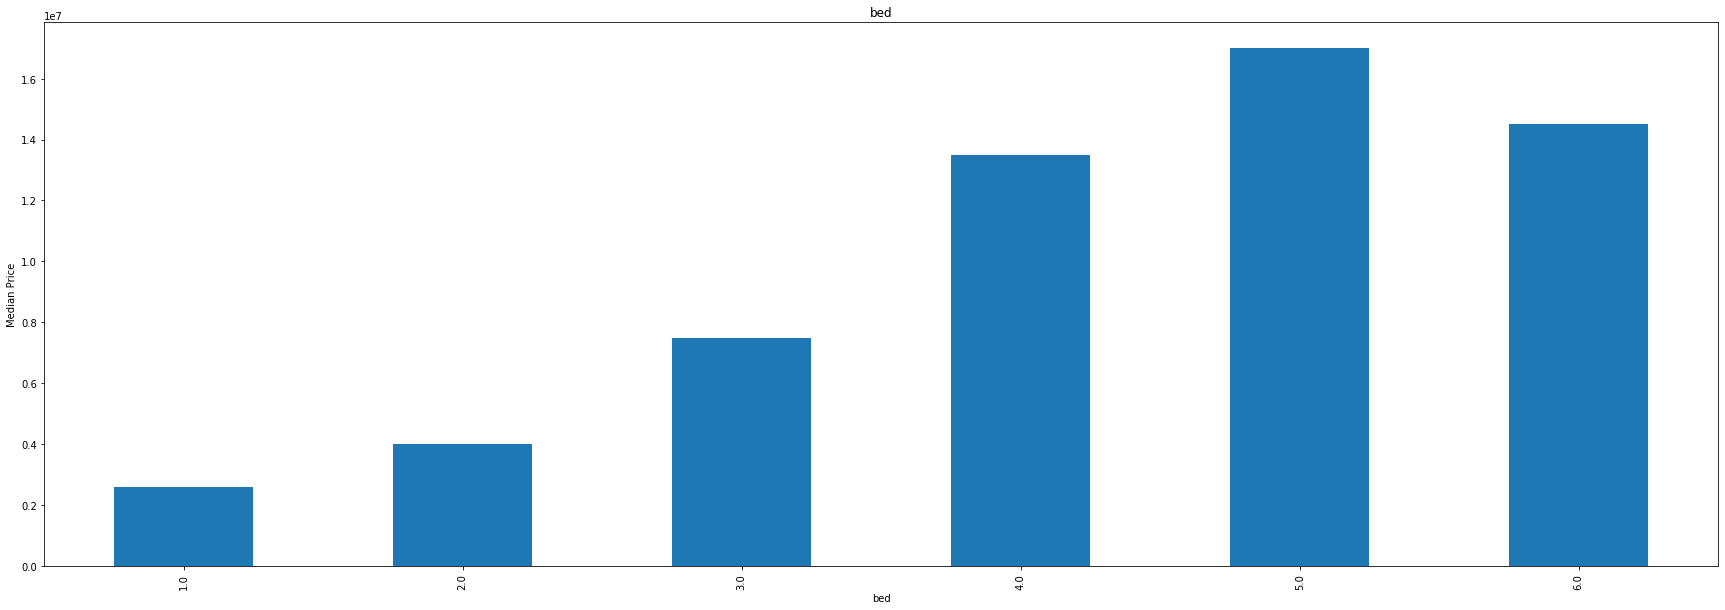

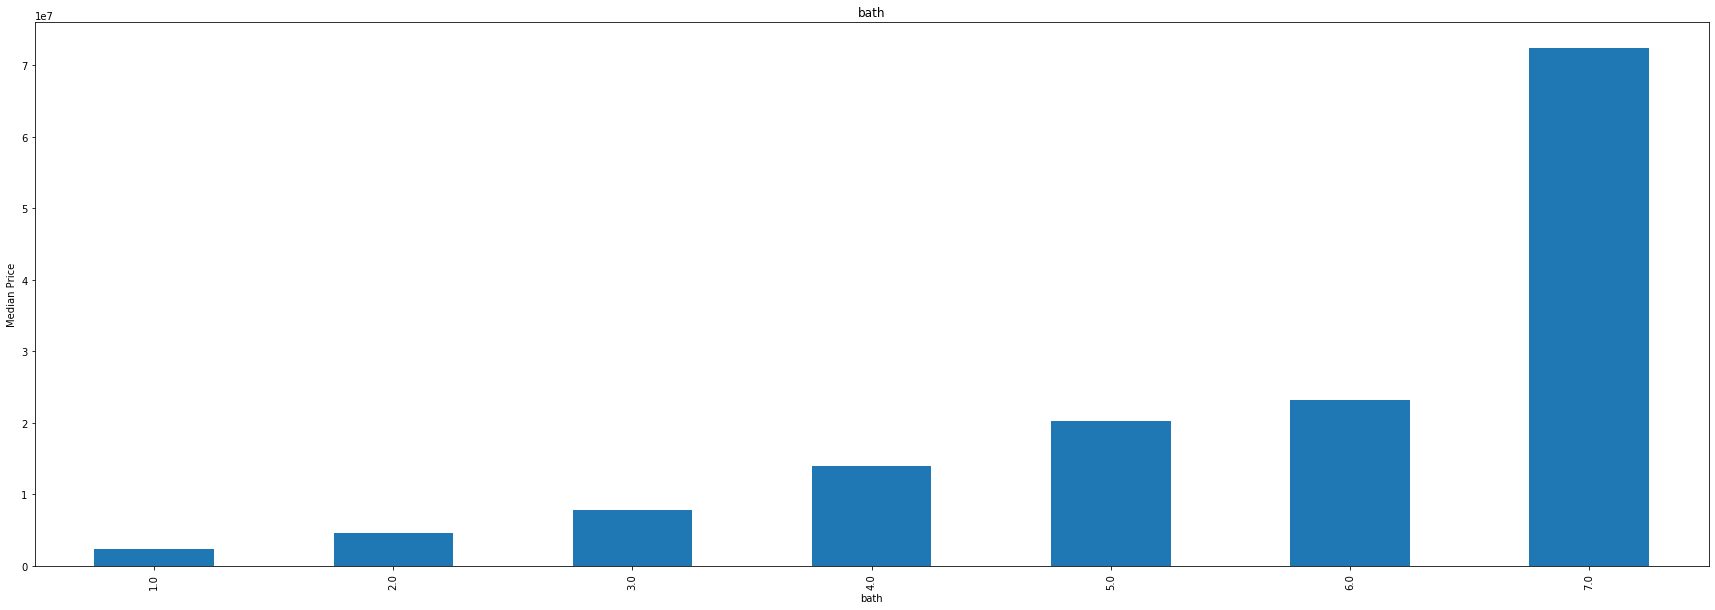

In [93]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median Price')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

In [94]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))
data[cont_vars].head()

Number of continuous variables:  2


,total_sqft,price
0,1350,7400000
1,1300,5800000
2,600,2600000
3,600,2600000
4,1100,8000000


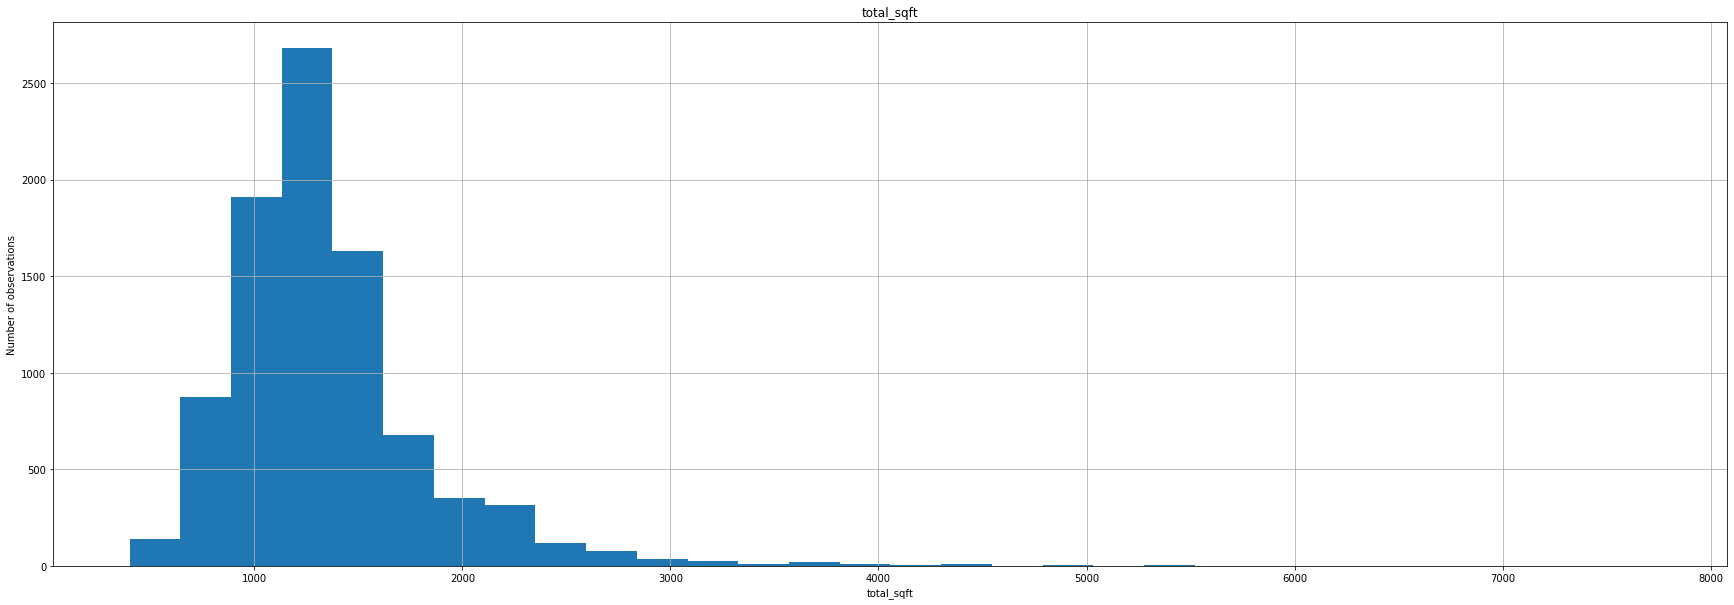

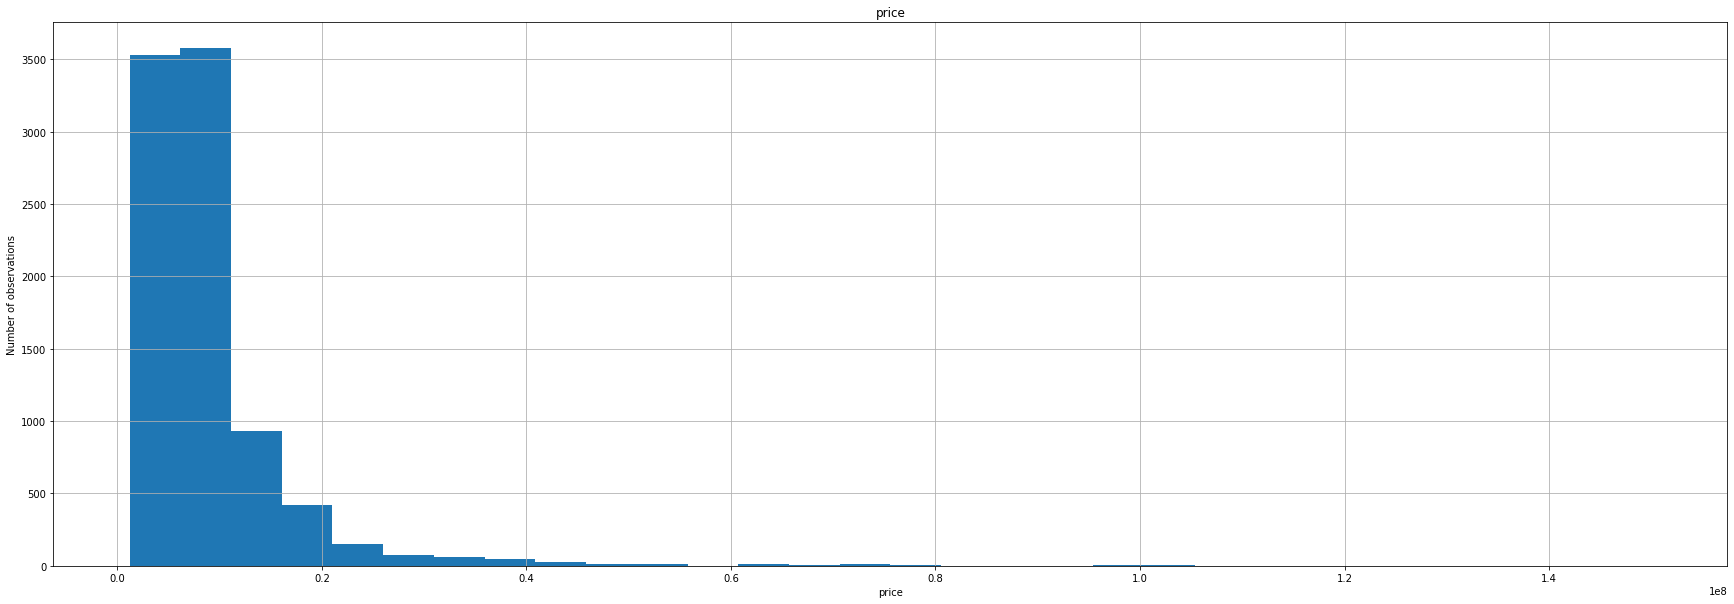

In [95]:
# Let's go ahead and analyse the distributions of these variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of observations')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

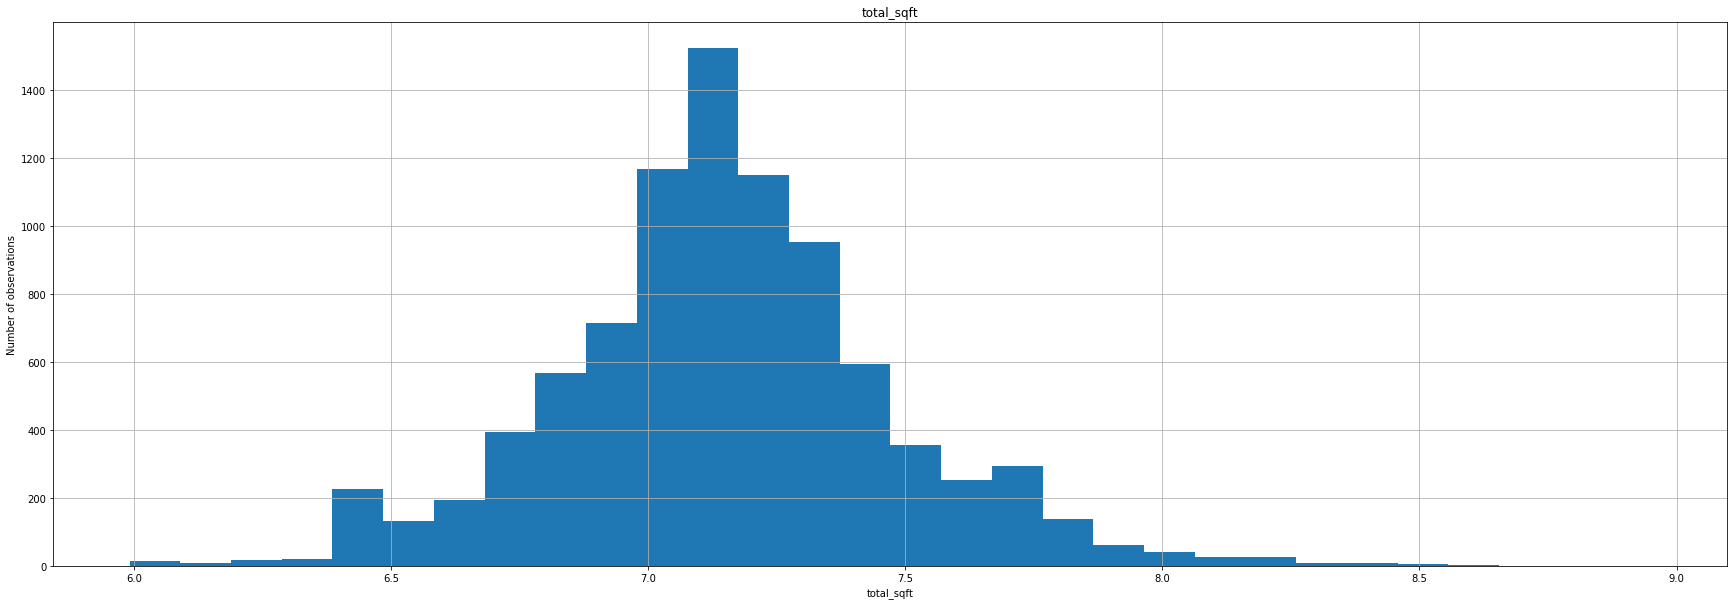

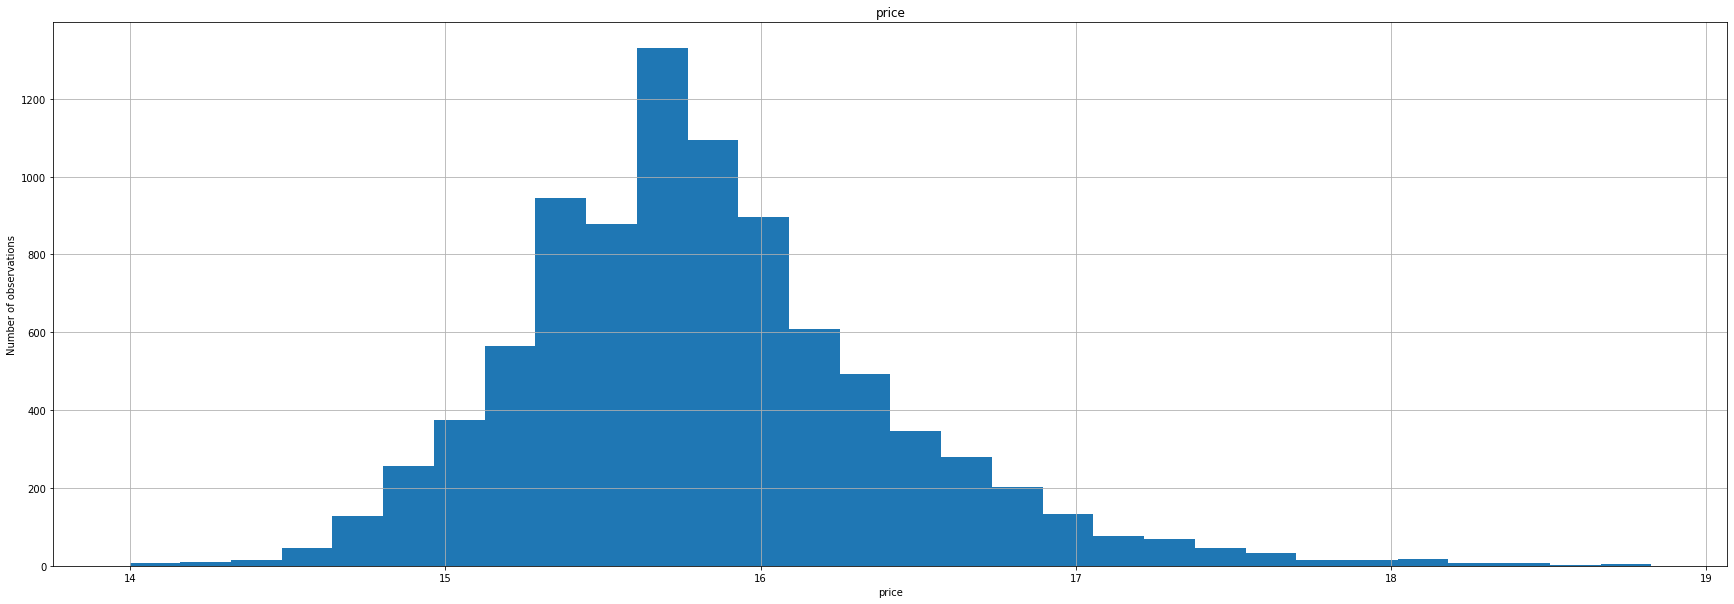

In [96]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation


def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of observations')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

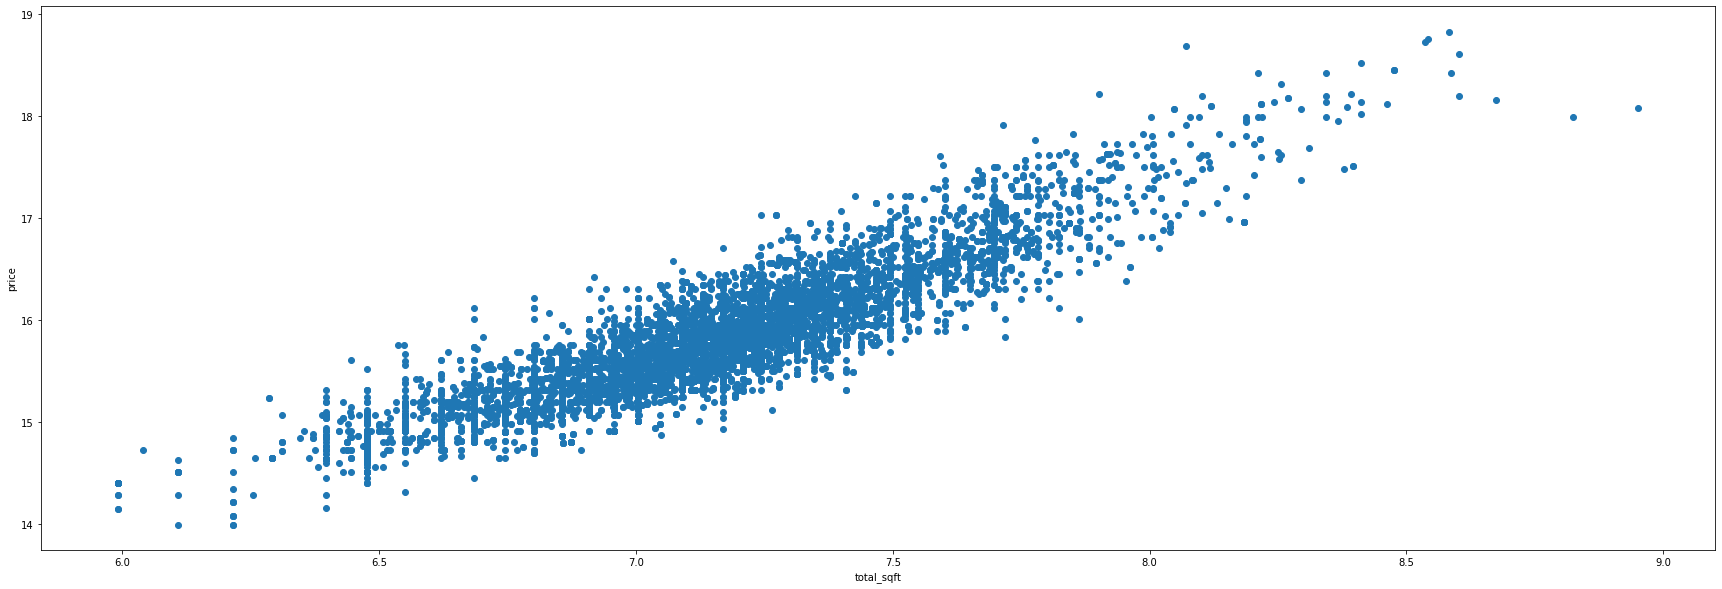

In [97]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:


def transform_analyse_continuous(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['price'] = np.log(df['price'])
        
        # plot
        plt.scatter(df[var], df['price'])
        plt.ylabel('price')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'price':
        transform_analyse_continuous(data, var)

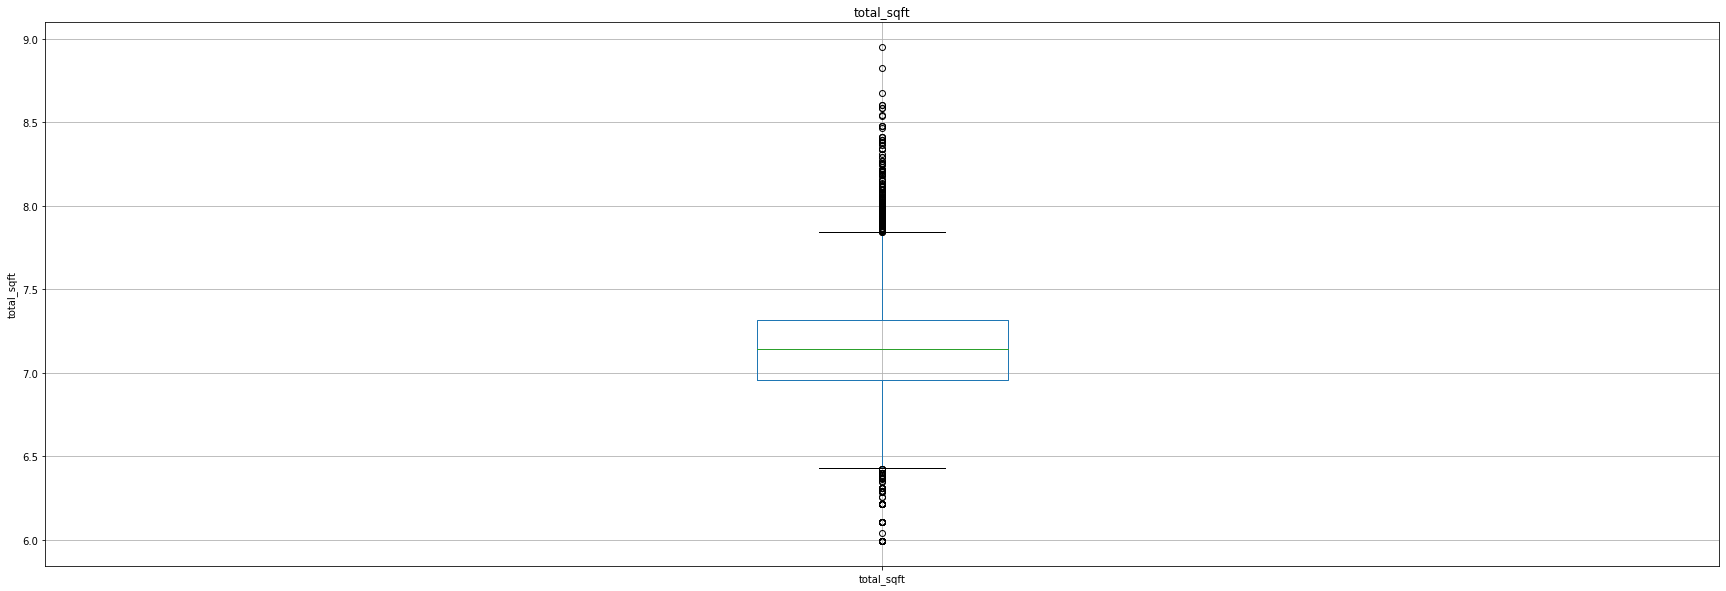

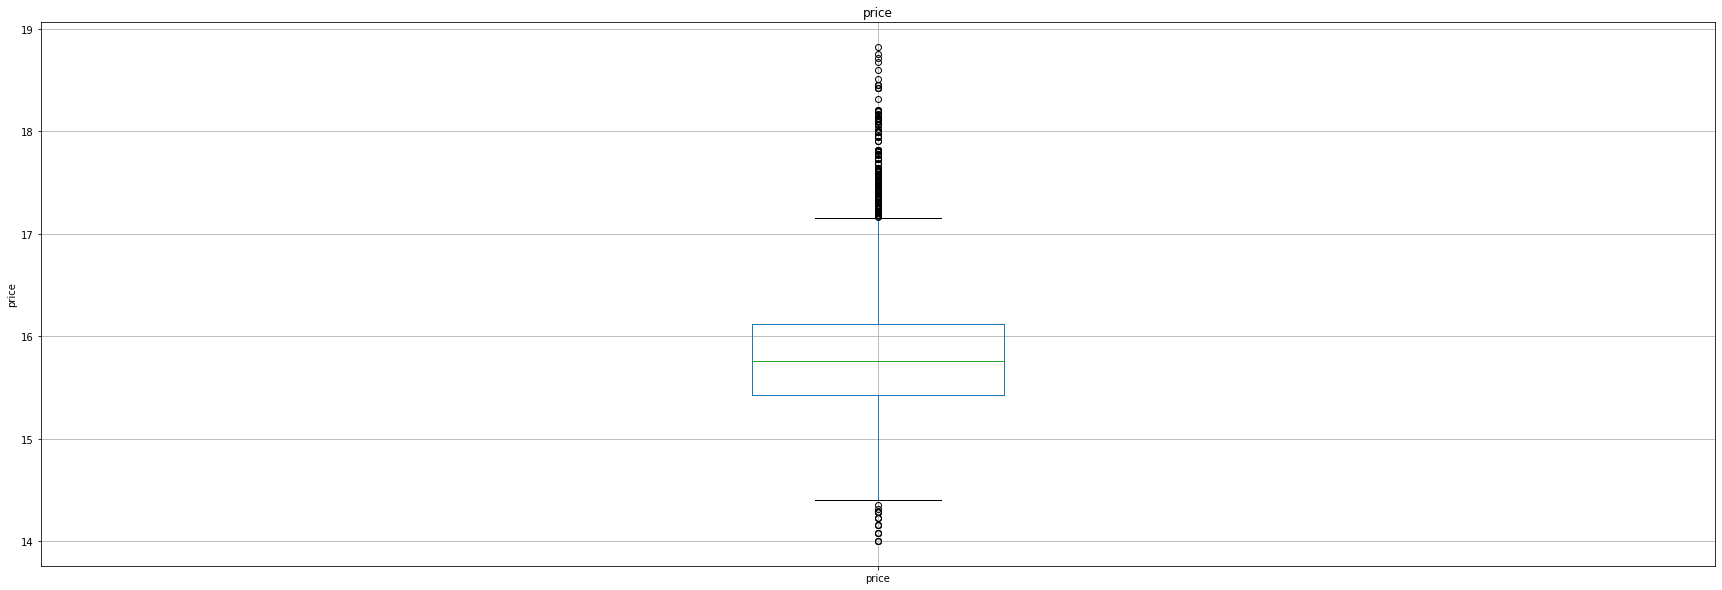

In [98]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

In [99]:
#visualize unique values for each categorical values. 
#since property_type has a single value we will drop it.
data[cat_vars].nunique()

property_type      1
location         581
dtype: int64

In [100]:
#drop propery_type
data = data.drop(['property_type'], axis=1)

In [101]:
cat_vars = cat_vars[1]

In [102]:
#location = df1['location'][0].split(',')
#location[:2]

location_split = pd.DataFrame(data.location.str.split(',').tolist(), columns = ['zone','area', 'city', 'n'])
#location_split
for row in data.location.str.split(',').tolist():
    if len(row) > 3:
        print(row)

['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['Niketan', ' Road No 14/3', ' Niketan', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['South Baridhara Residential Area', 'D.I.T. Project', ' Badda', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['6/9 Outer Circular Rd', '', ' Malibagh', ' Dhaka']
['South Baridhara Residential A

In [103]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

print(analyse_rare_labels(data, 'location', 0.01))
print()

location
1st Colony, Mirpur, Dhaka                                        0.000449
2nd Colony, Mirpur, Dhaka                                        0.000449
6/9 Outer Circular Rd,, Malibagh, Dhaka                          0.000674
Aainusbag, Dakshin Khan, Dhaka                                   0.000787
Abdul Aziz Lane, Lalbagh, Dhaka                                  0.000112
Abur Tek Road, Khilkhet, Dhaka                                   0.000225
Adarsha Nagar, Badda, Dhaka                                      0.001236
Adarsha Para, Uttar Khan, Dhaka                                  0.000112
Adorsho Polli Road, Ibrahimpur, Dhaka                            0.000449
Advanced Police Town, Savar, Dhaka                               0.000112
Aftab Nagar Main Road, Aftab Nagar, Dhaka                        0.002921
Aga Sadek Road, Bangshal, Dhaka                                  0.000225
Agamasi Lane, Bangshal, Dhaka                                    0.000112
Ahalia, Turag, Dhaka         

In [104]:
#location columns has address, area, city separated by comma
#city is the same across all the rows so, we need to remove that part
#then divide into two columns as: address, area 
#finally remove the location column

def location_cleaning(df, var):
    data['zone'] = data.apply(lambda _: '', axis=1)
    data['area'] = data.apply(lambda _: '', axis=1)
    for index,row in df[var].iteritems():
        row = df[var][index].split(',')[:-1]
        row = list(unique_everseen([row.strip() for row in row if row]))
        if len(row) == 3:
            row = [row[0] + ' ' + row[1]]
        if len(row) > 1:
            data['zone'][index], data['area'][index] = row[0], row[1]
    return df
            
data = location_cleaning(data, 'location')
data = data.drop(['location'], axis=1)    

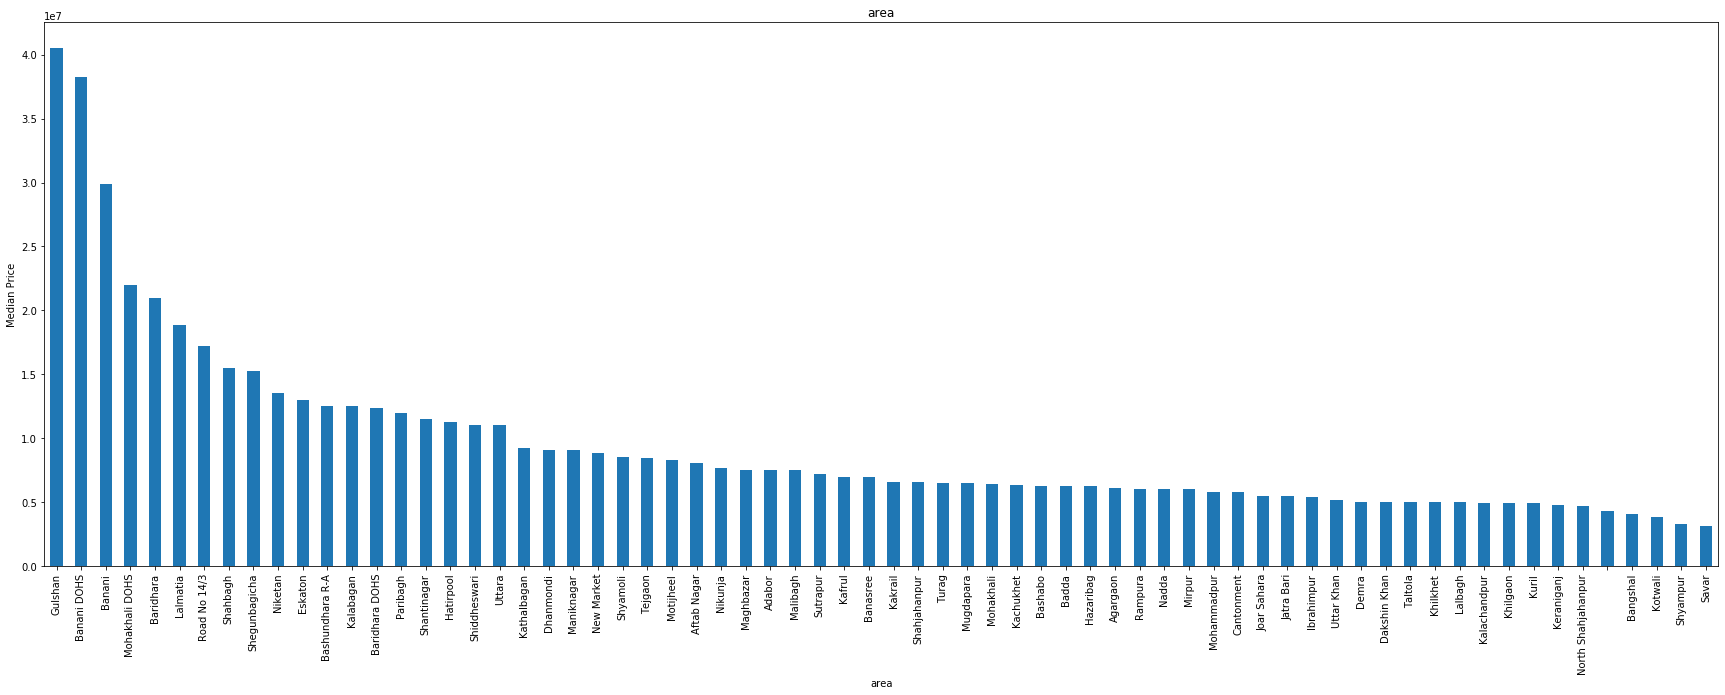

In [105]:
#see trend of avg price over different areas of Dhaka city
data.groupby('area')['price'].median().sort_values(ascending=False).plot.bar()
plt.rcParams["figure.figsize"] = (30,10)
plt.title('area')
plt.ylabel('Median Price')
plt.show()

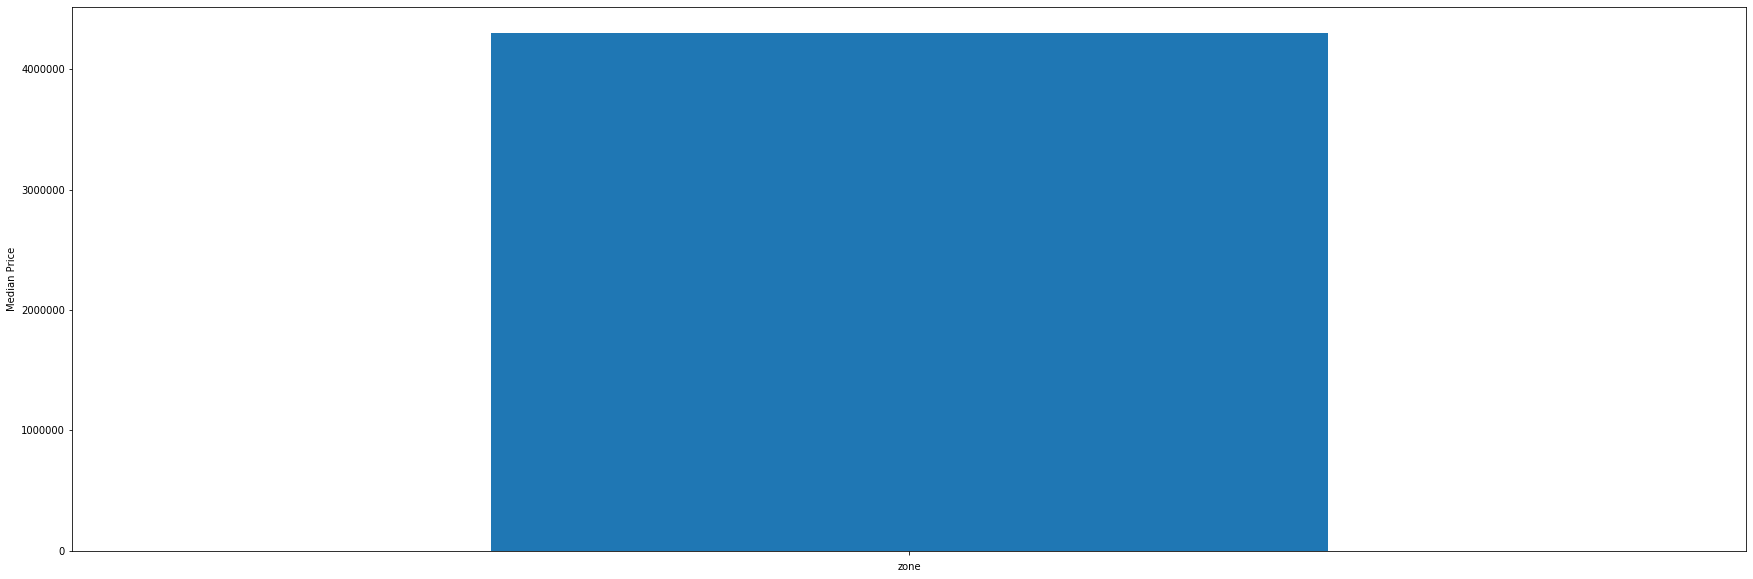

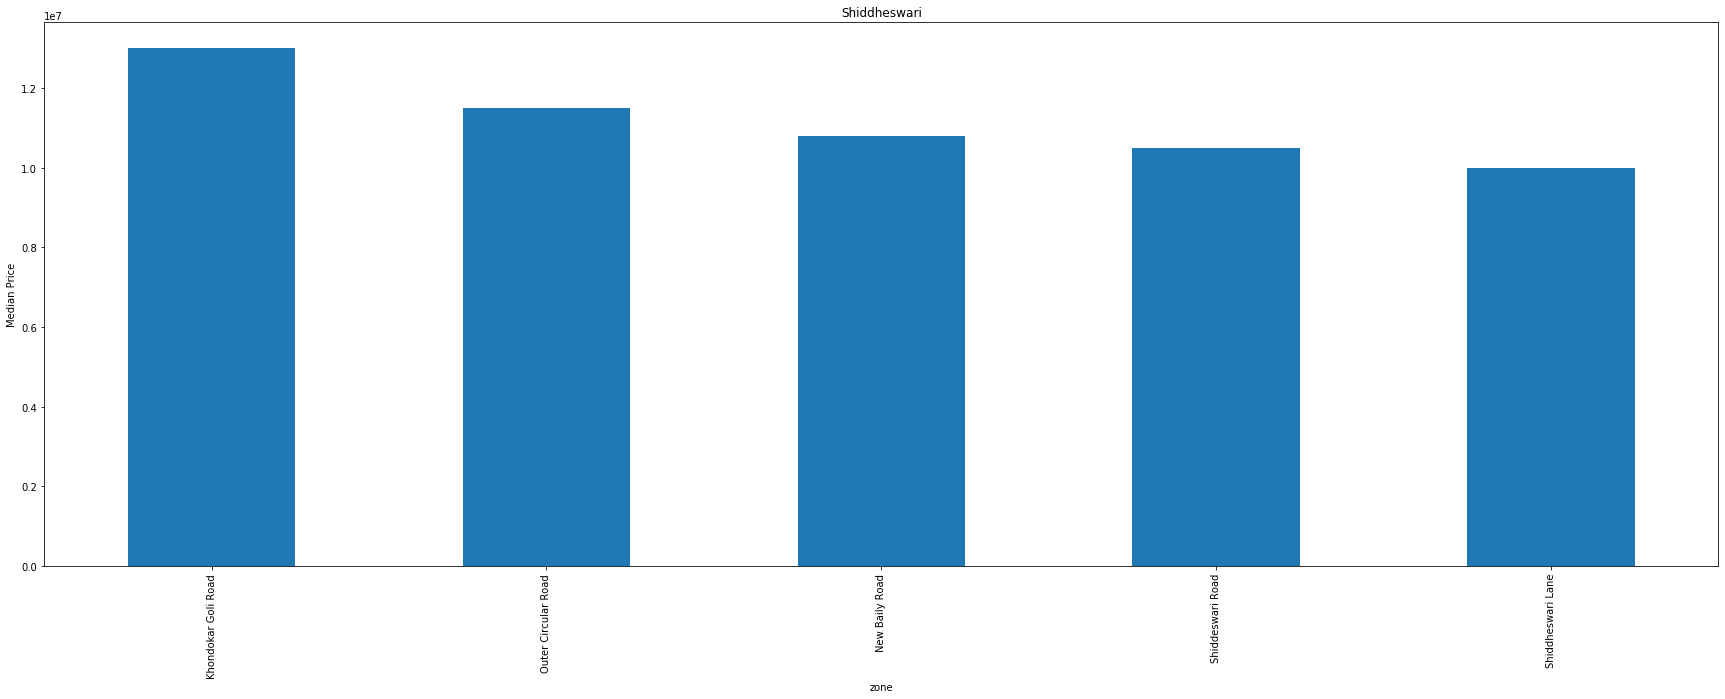

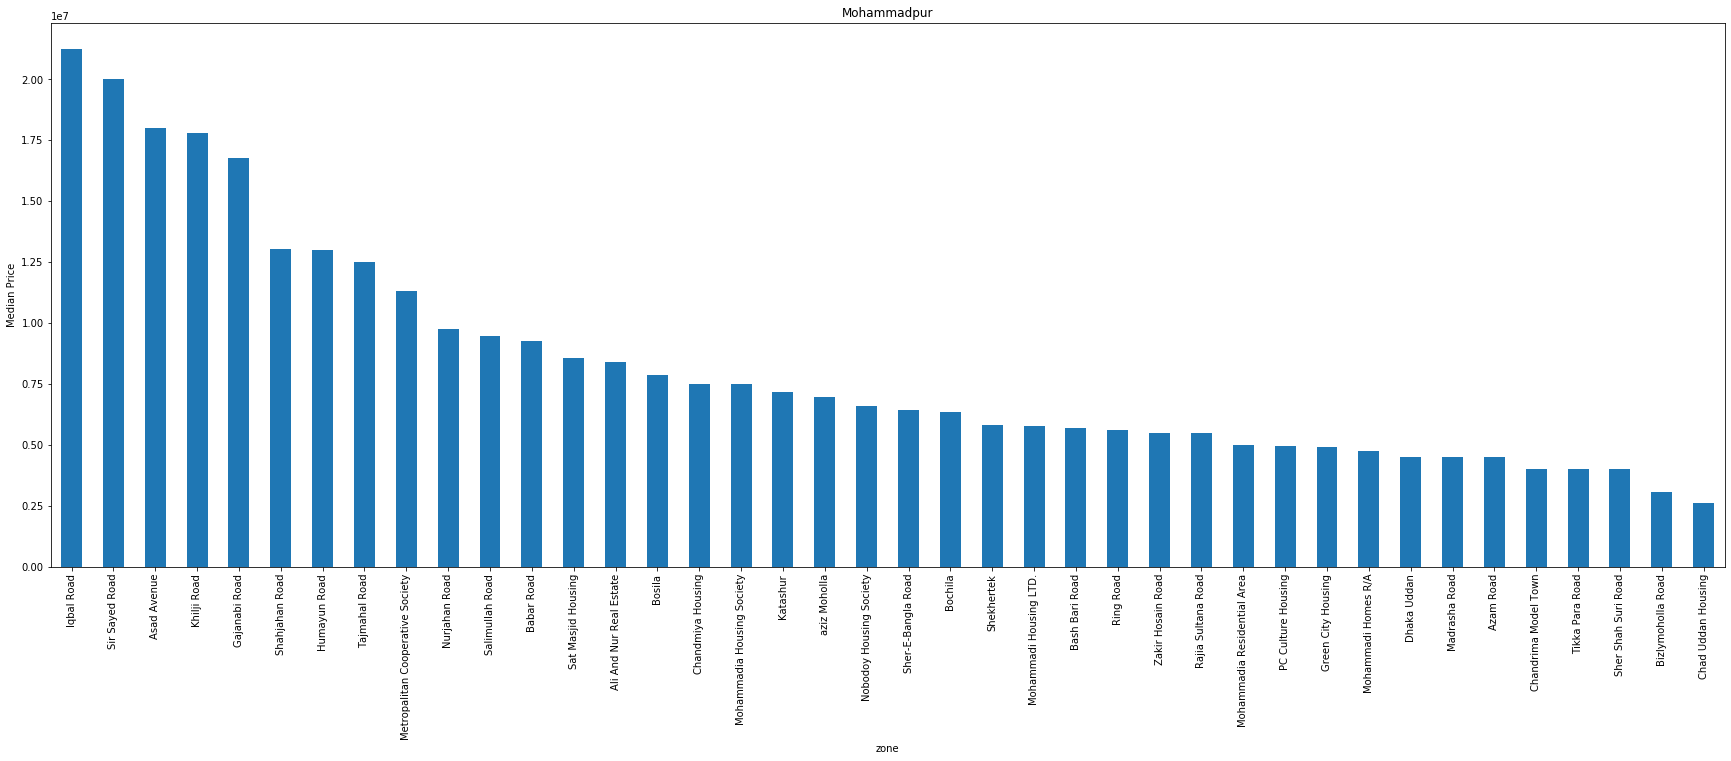

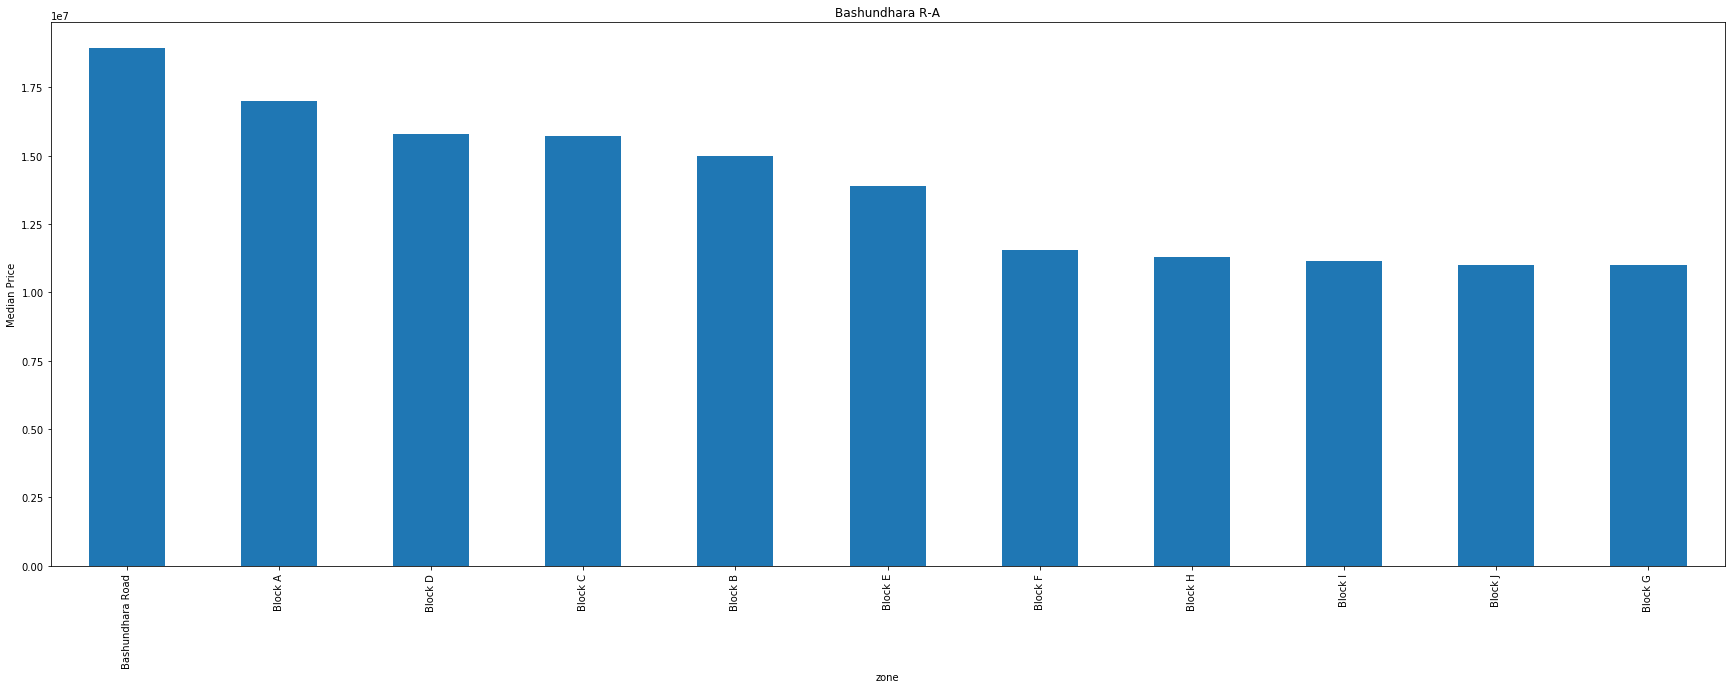

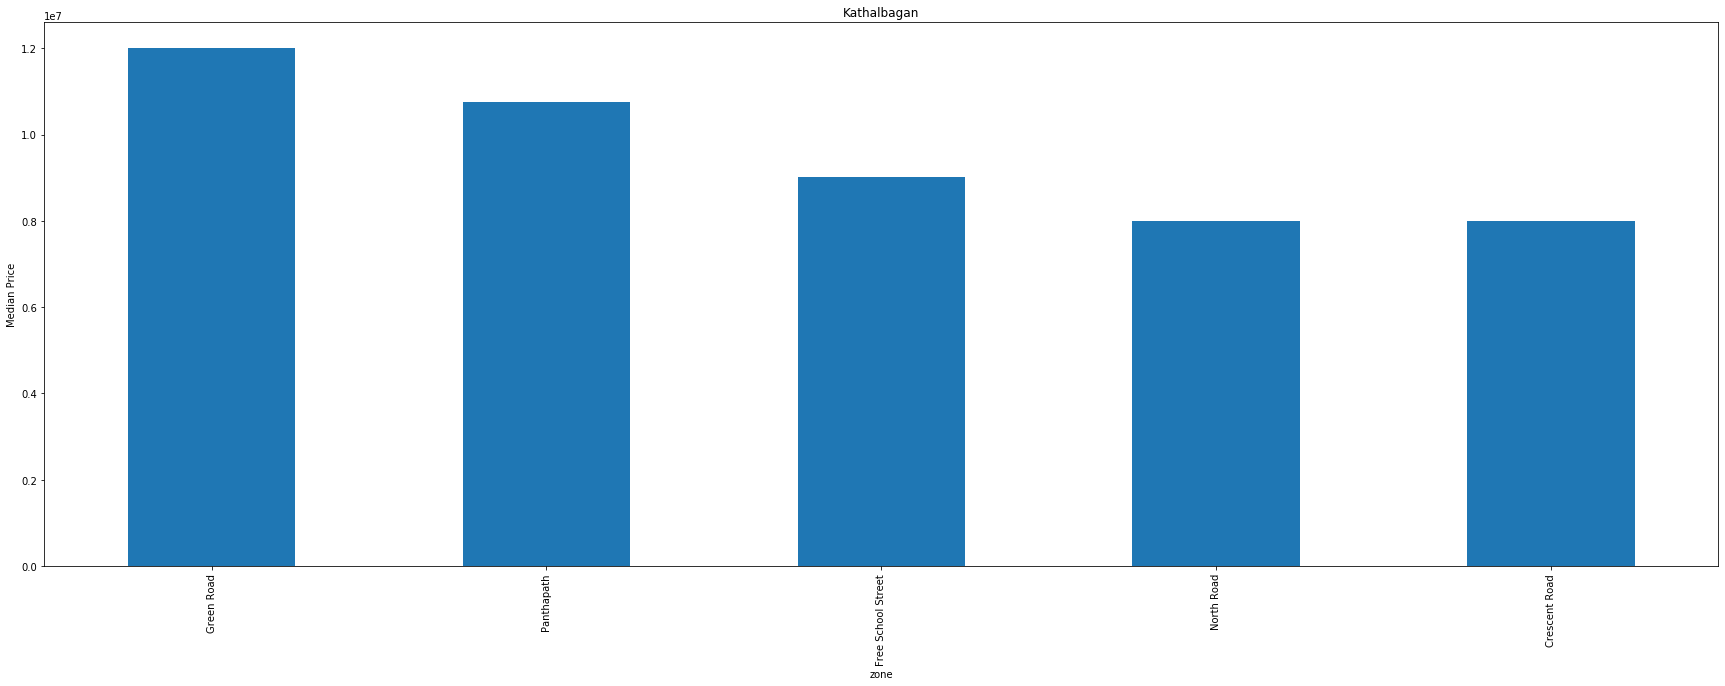

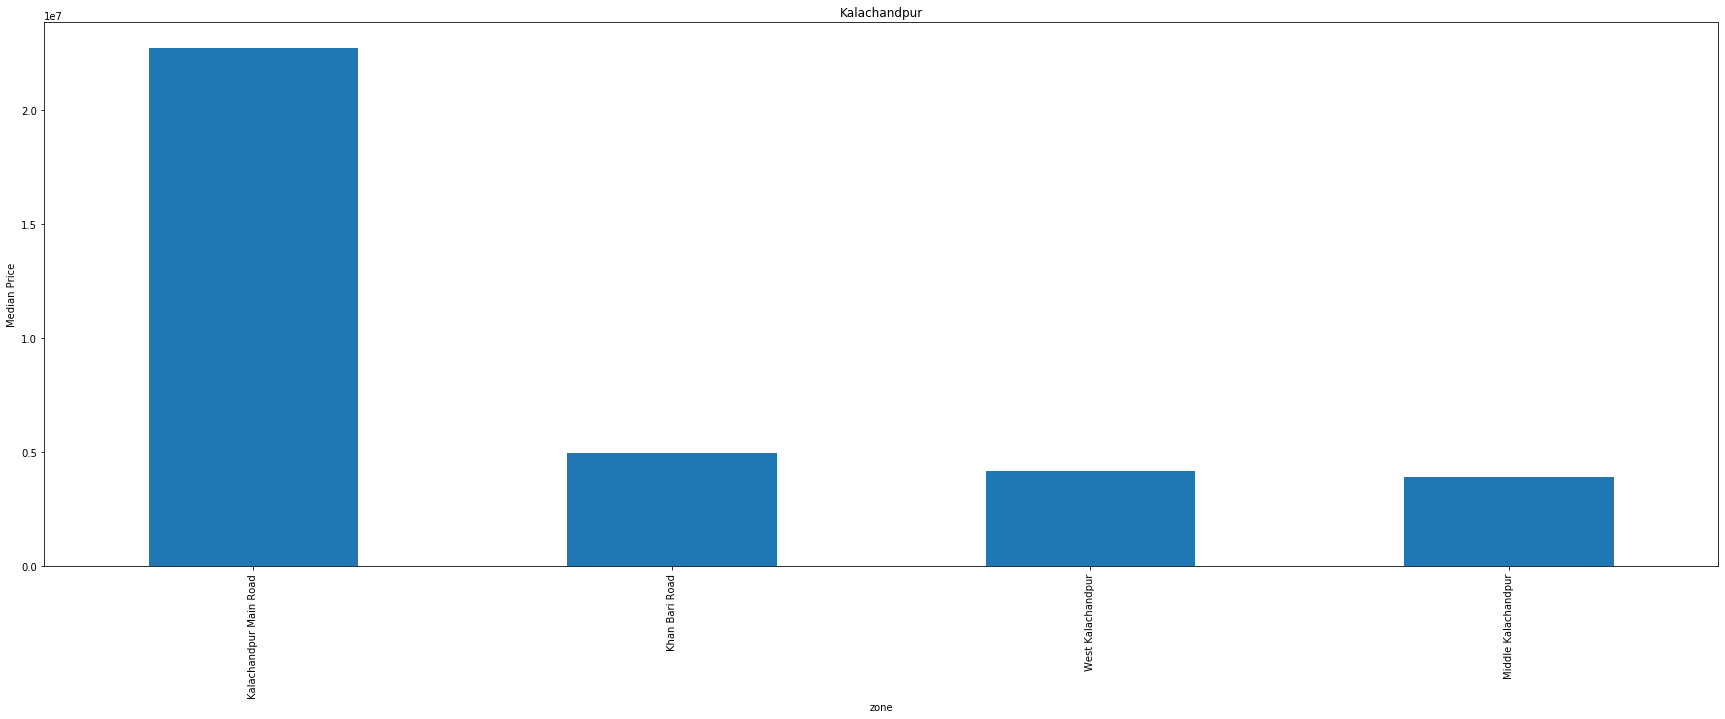

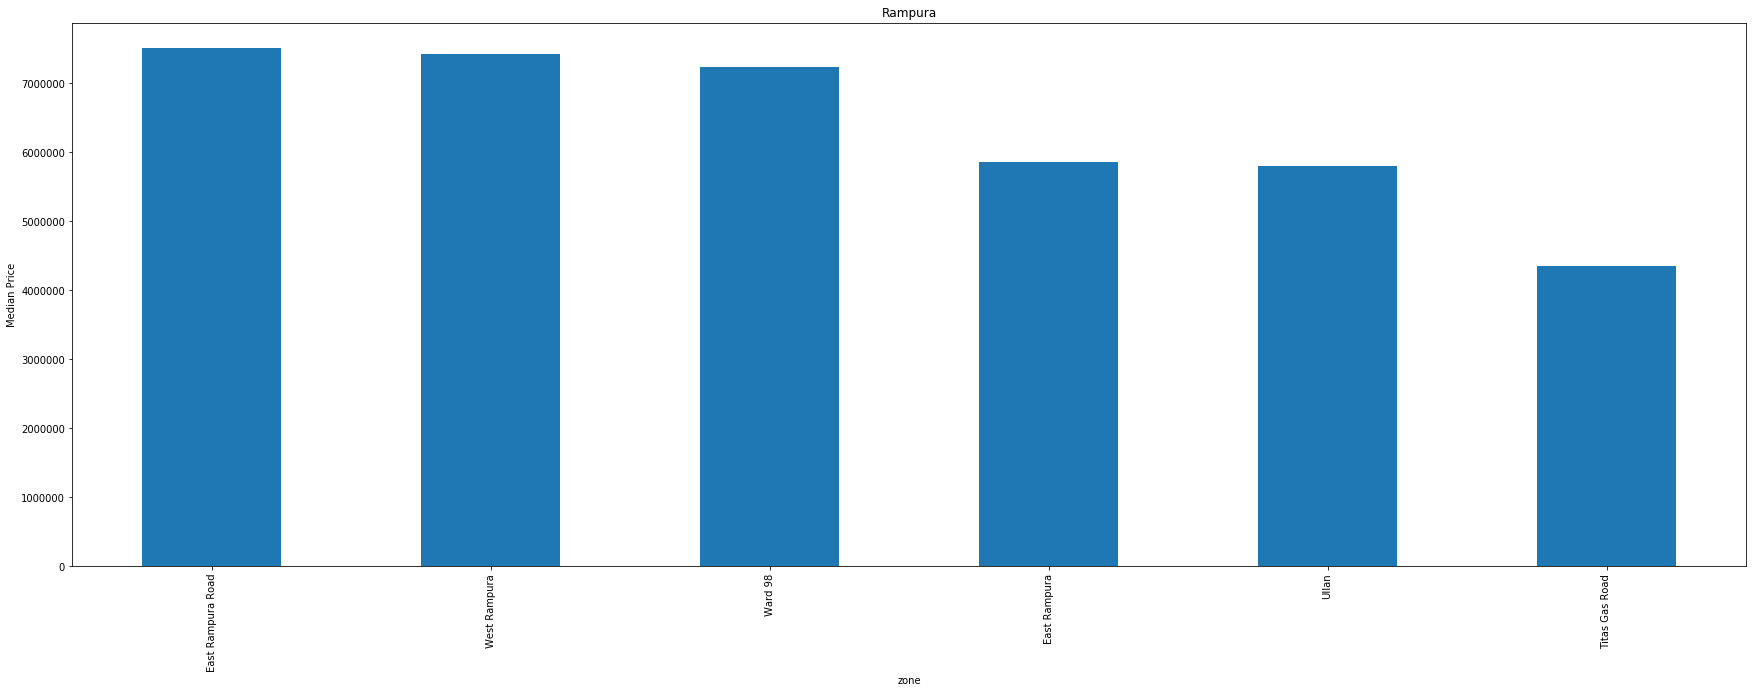

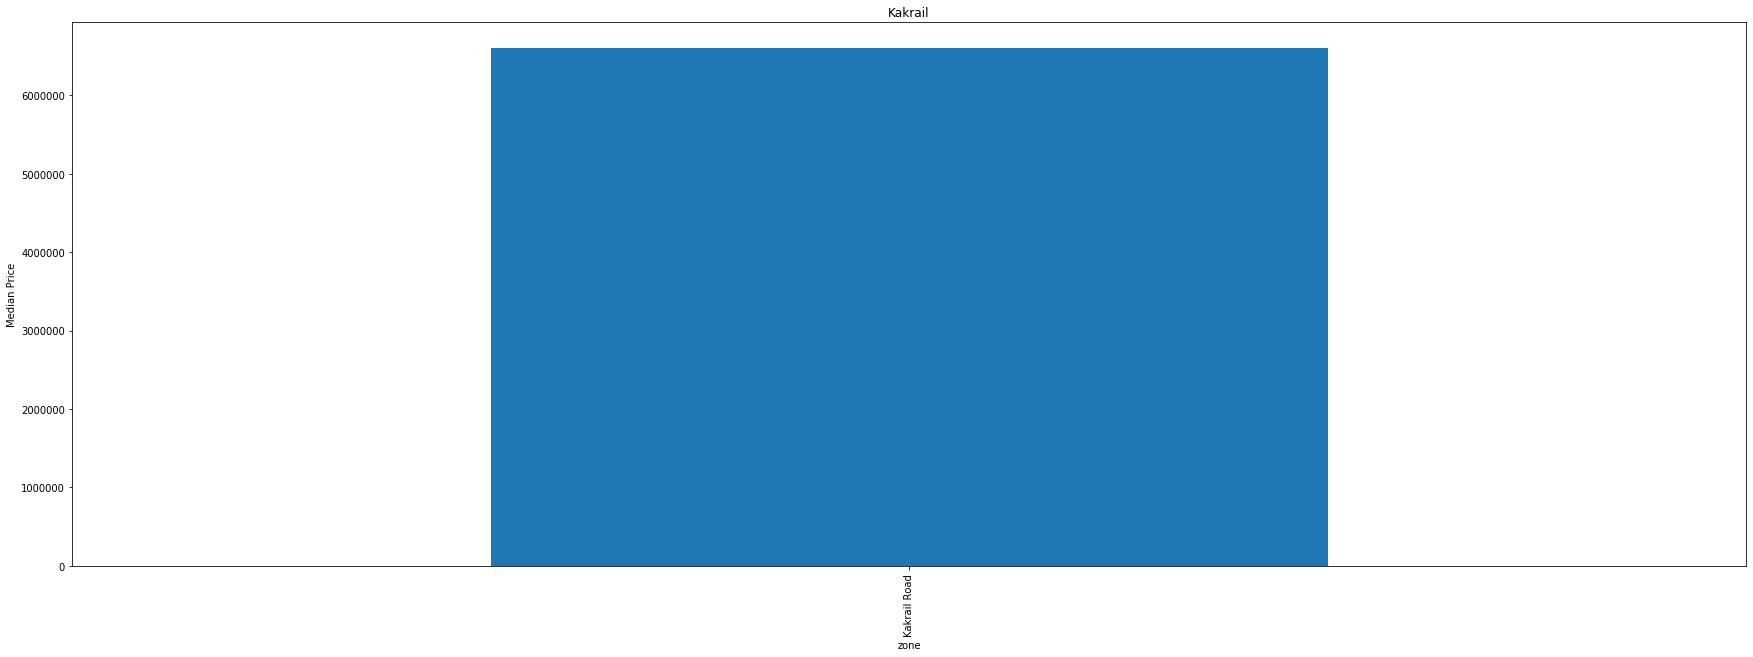

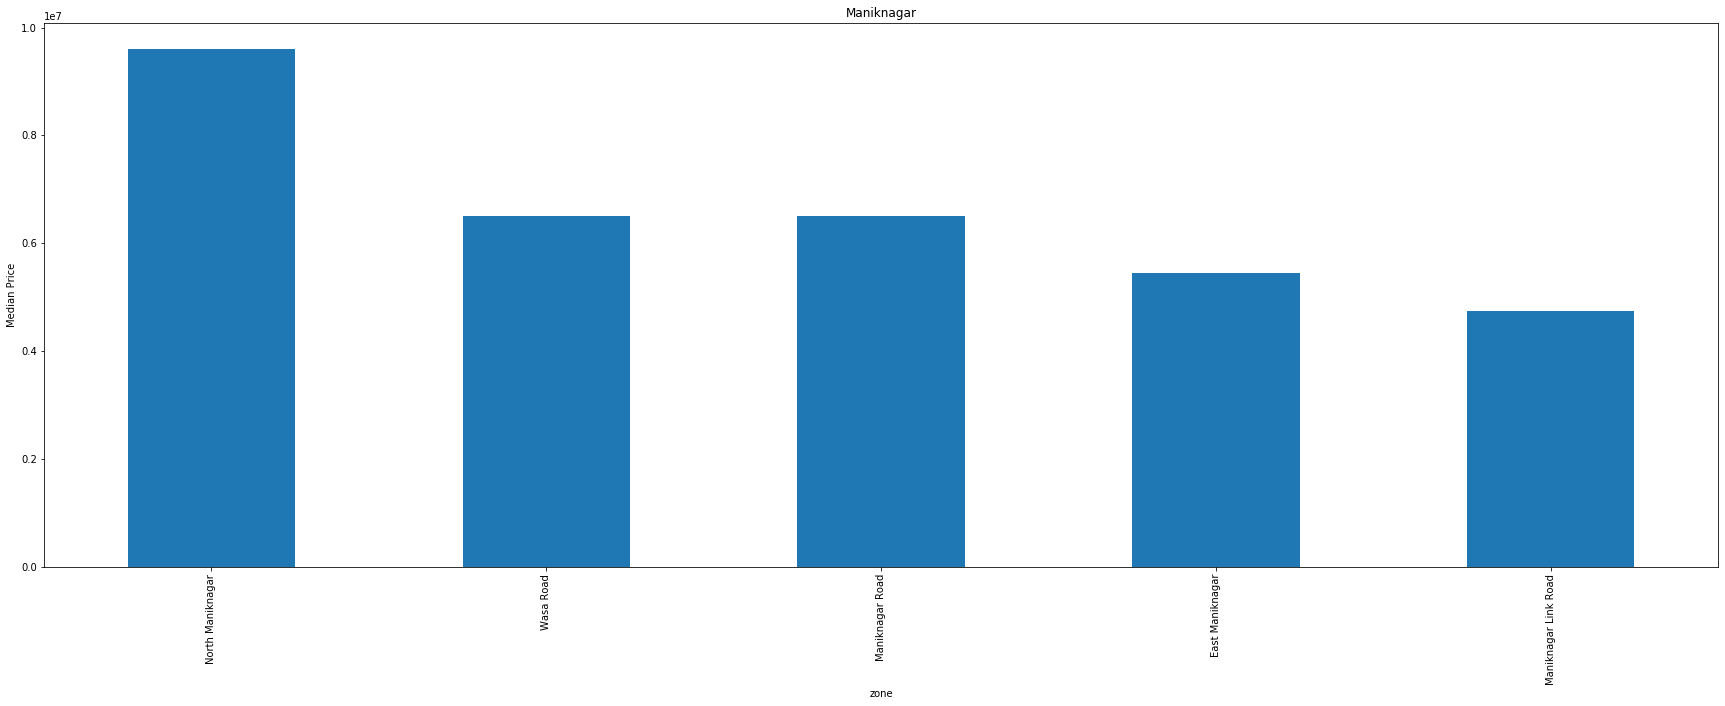

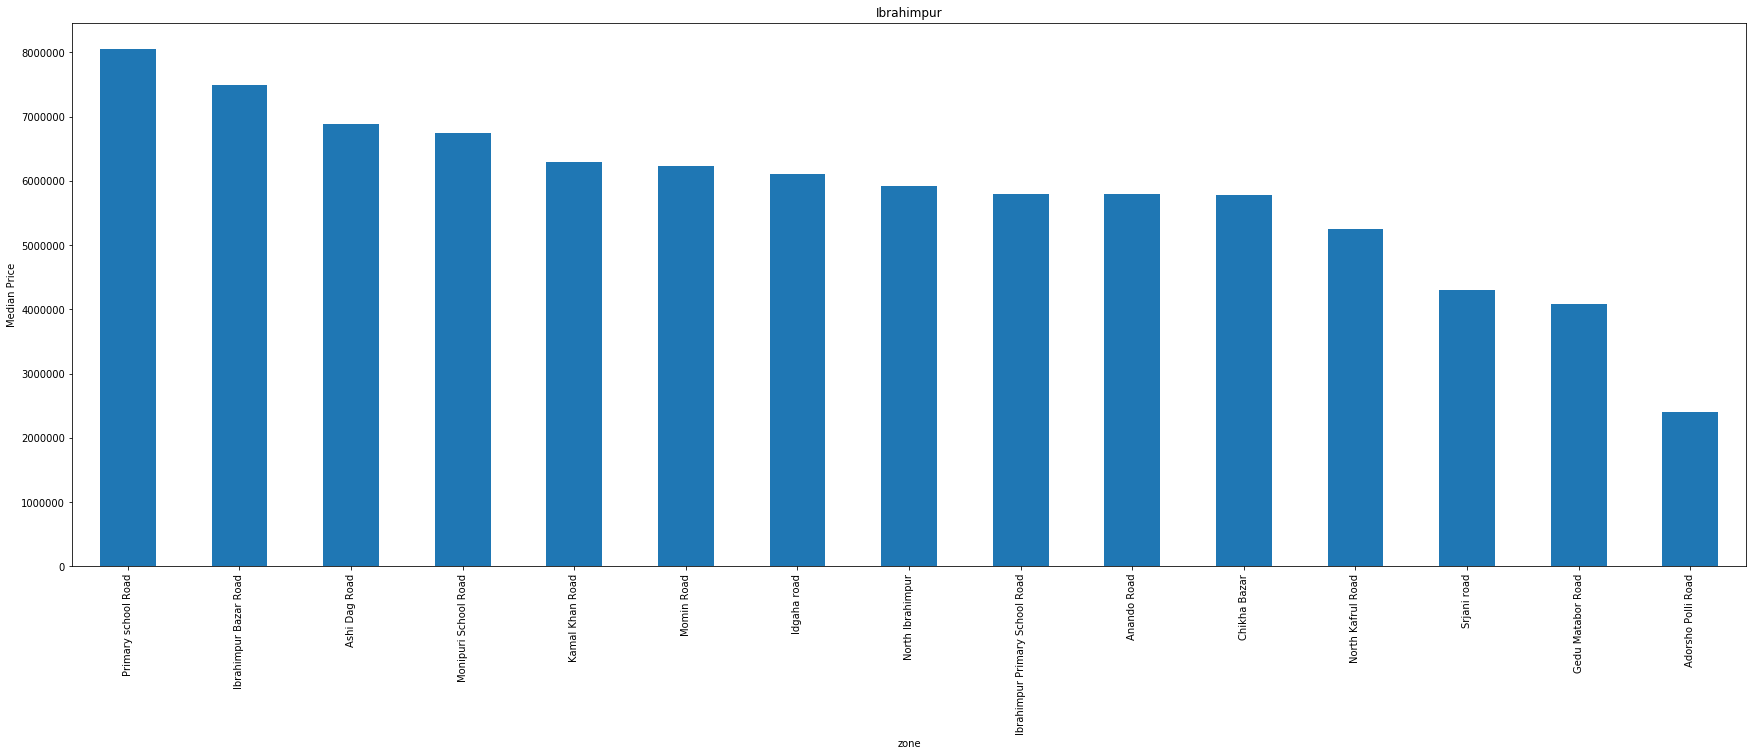

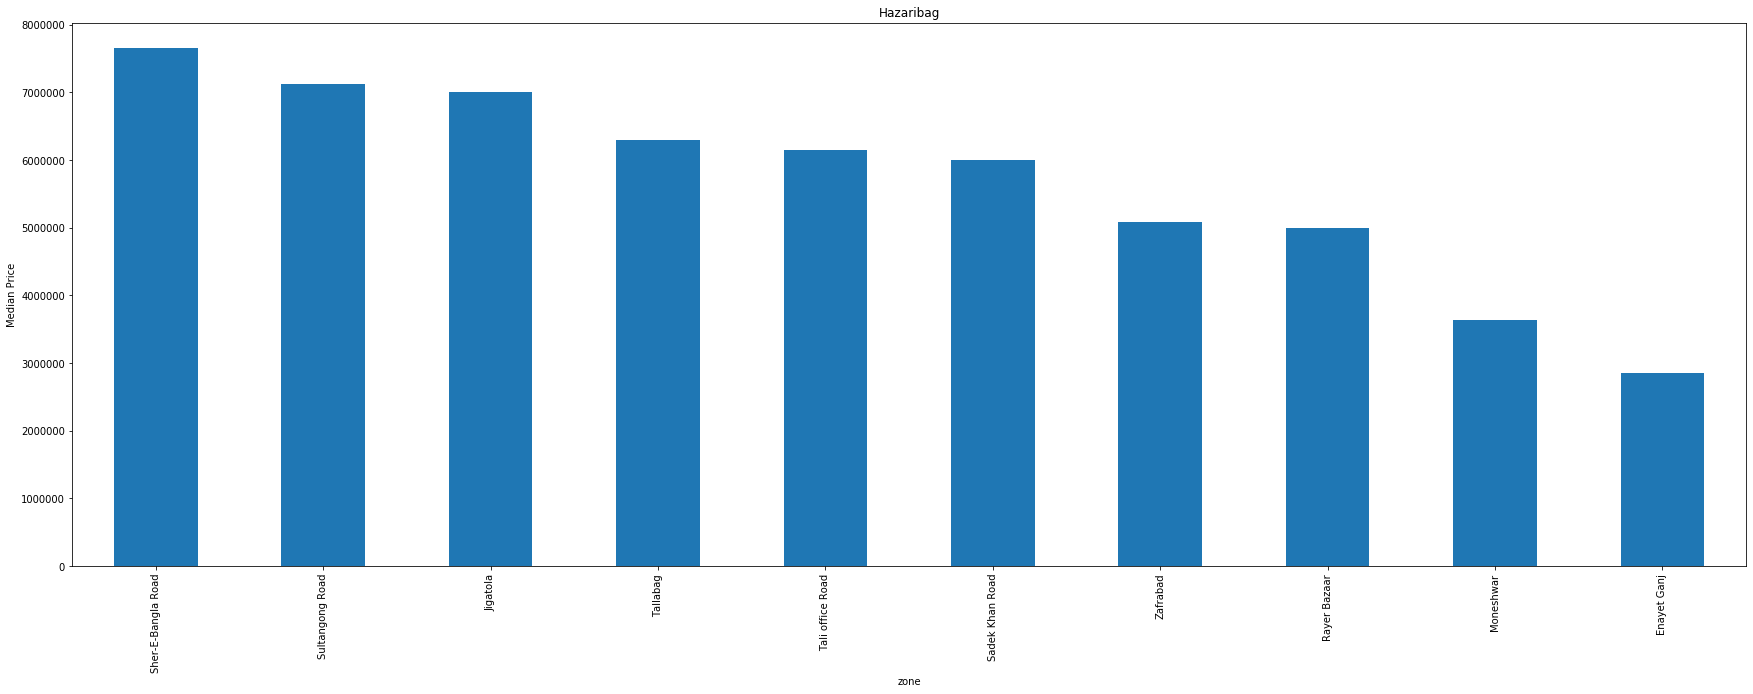

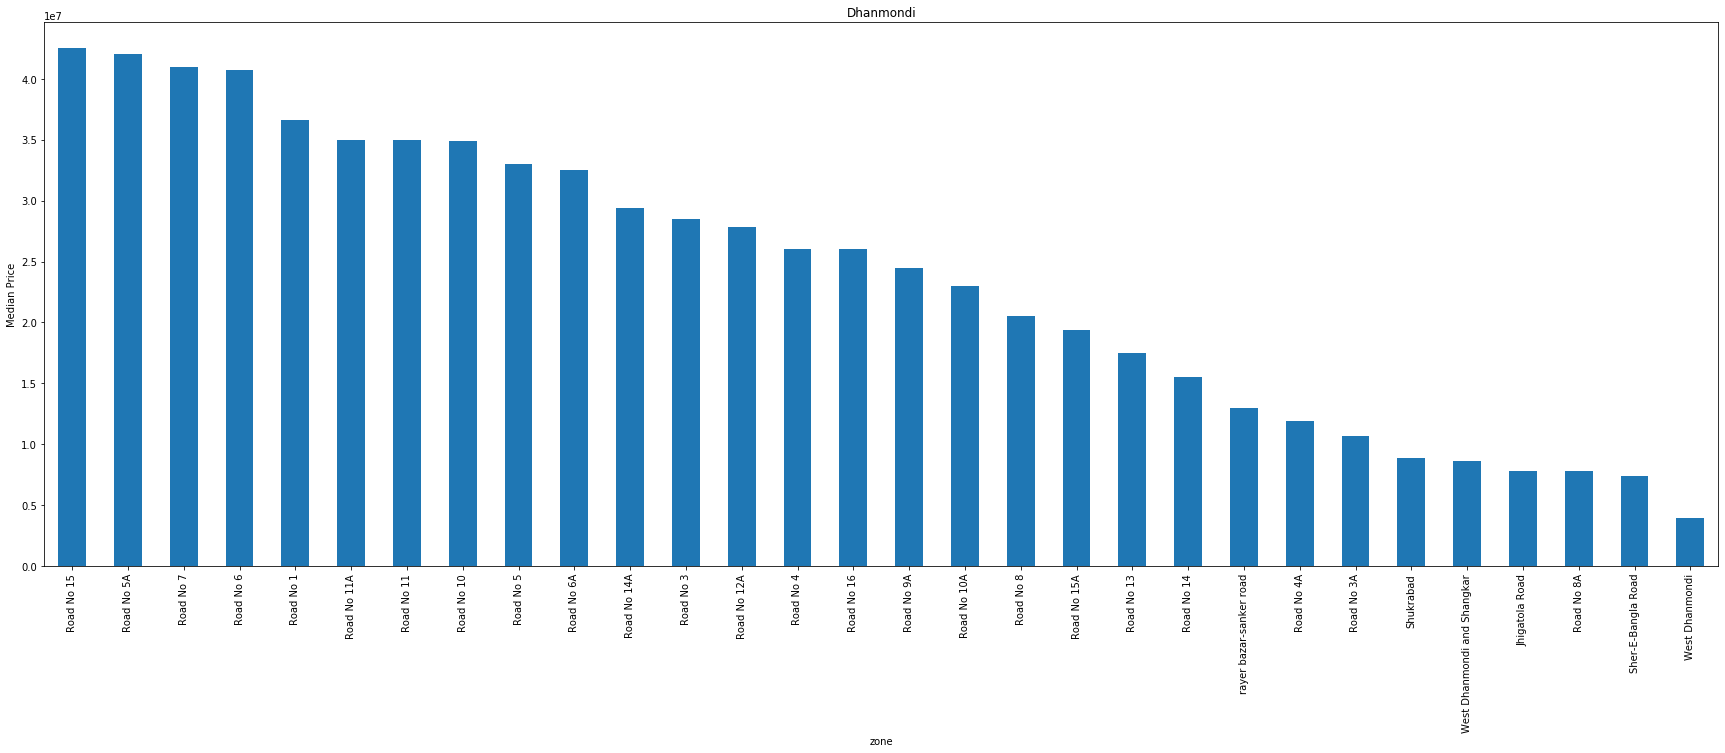

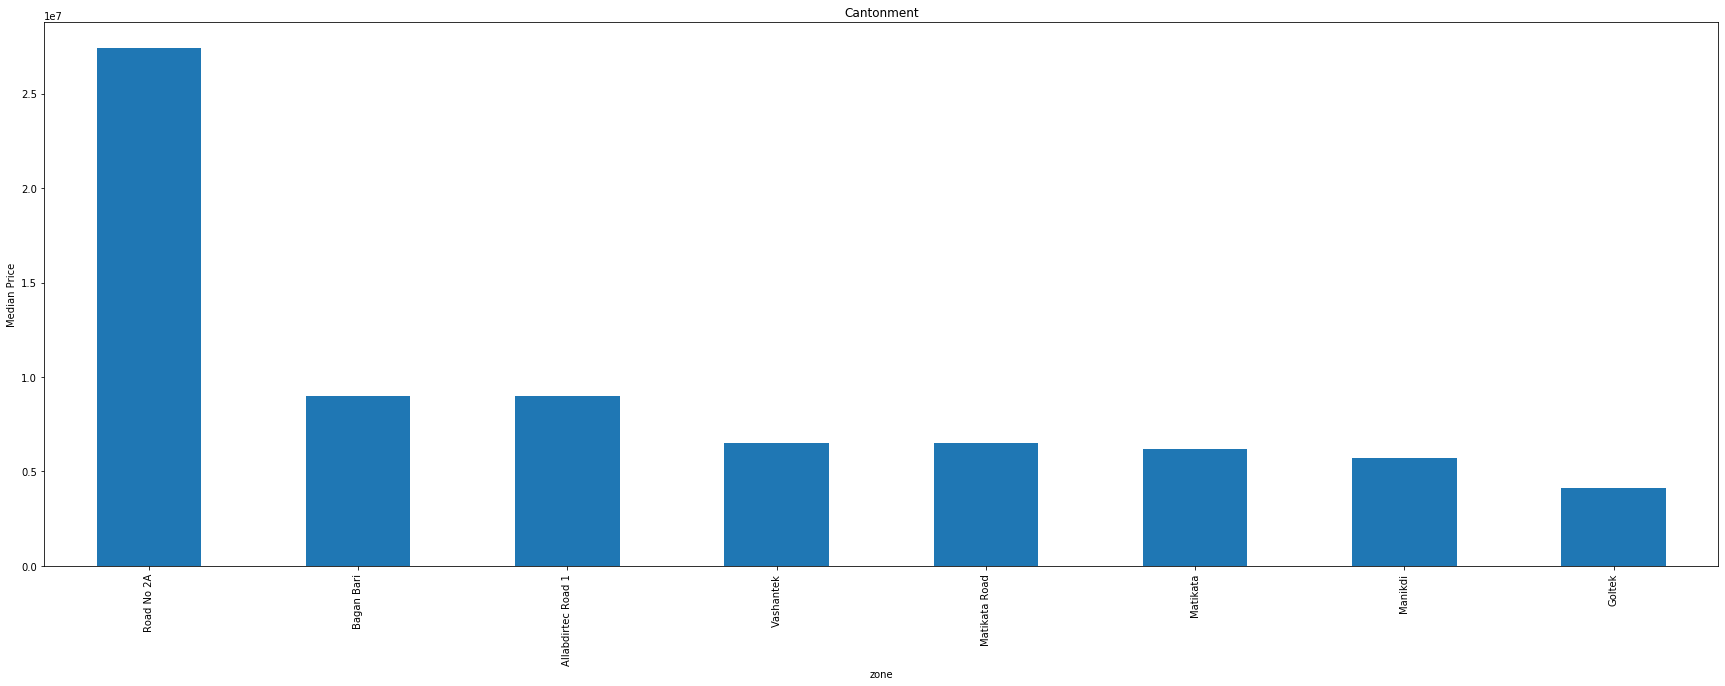

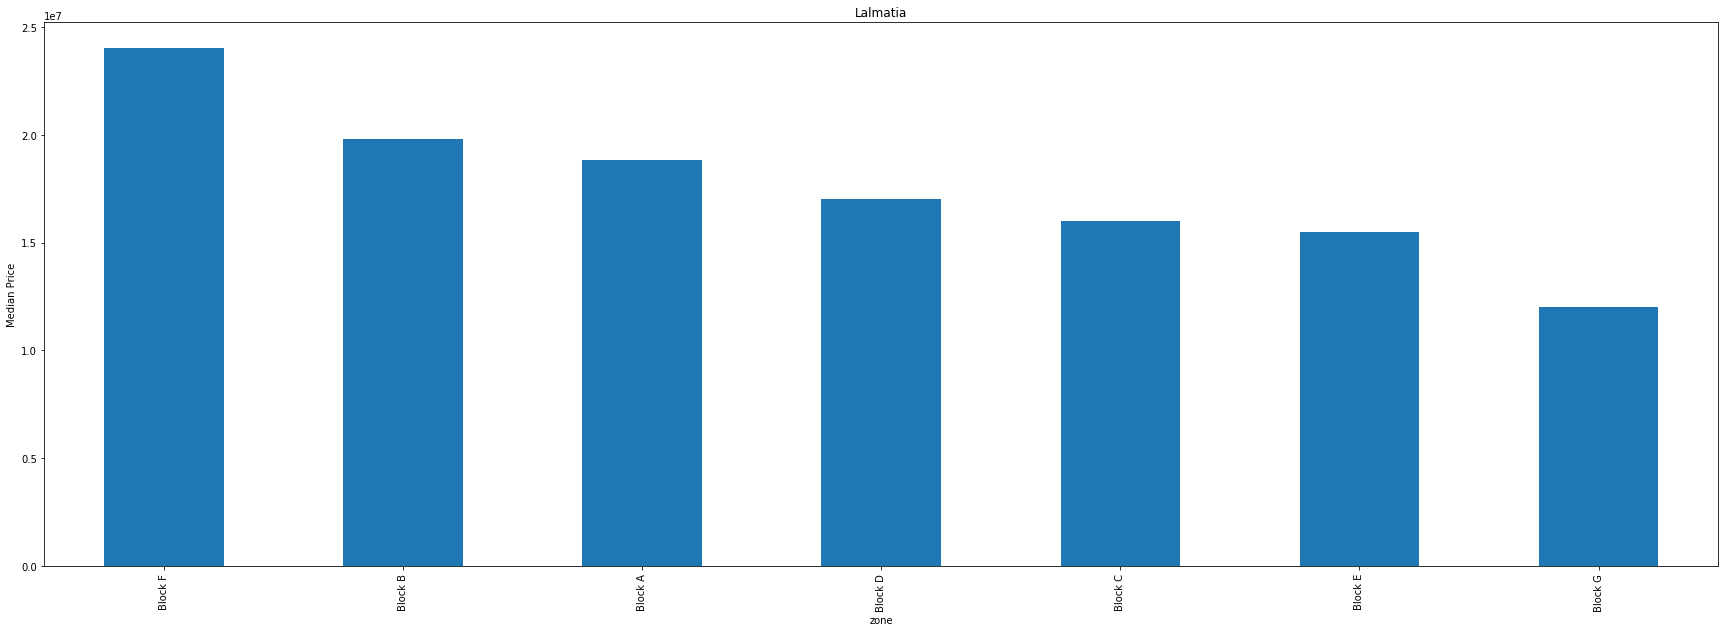

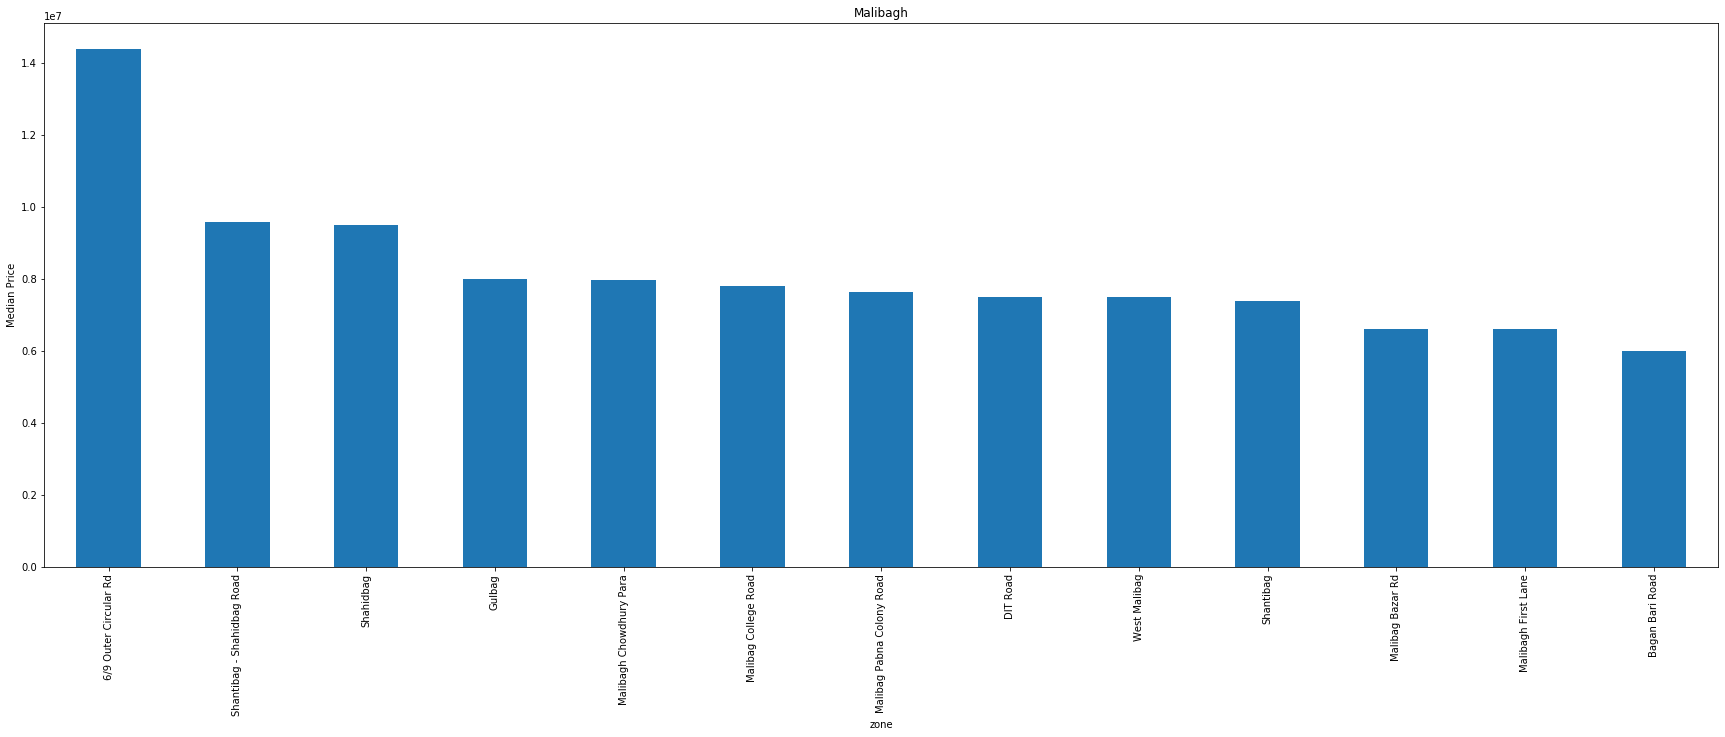

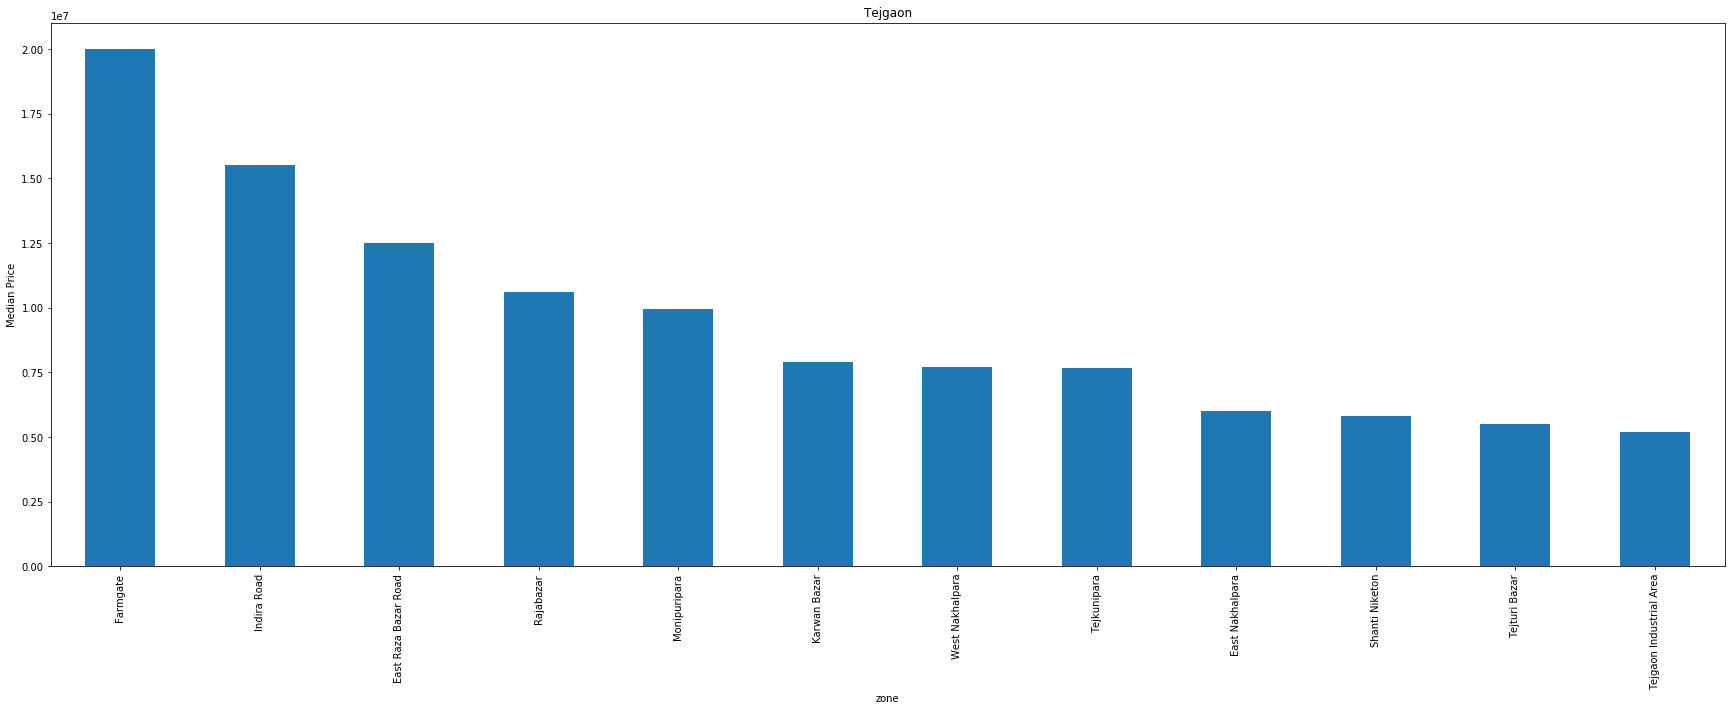

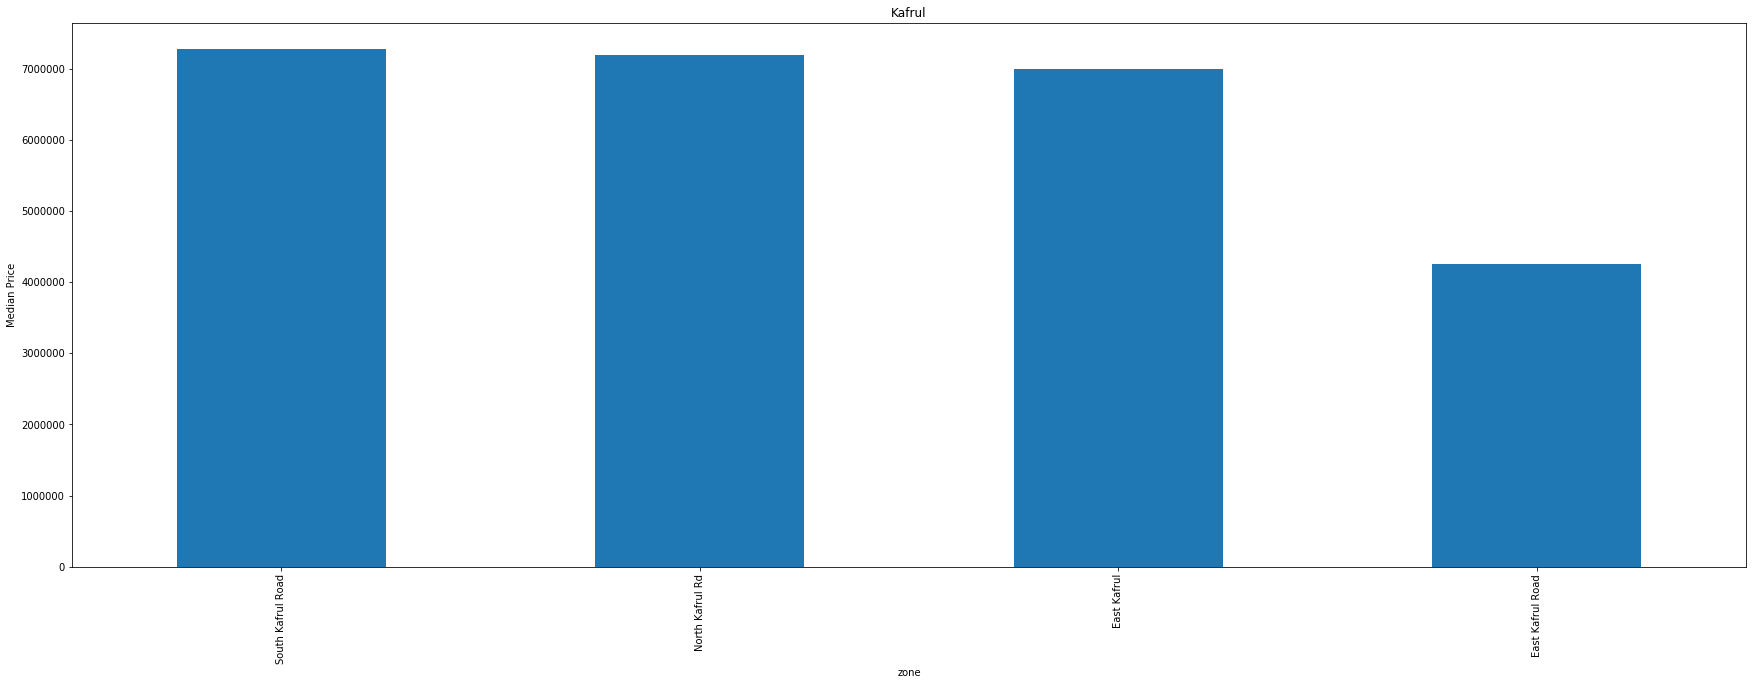

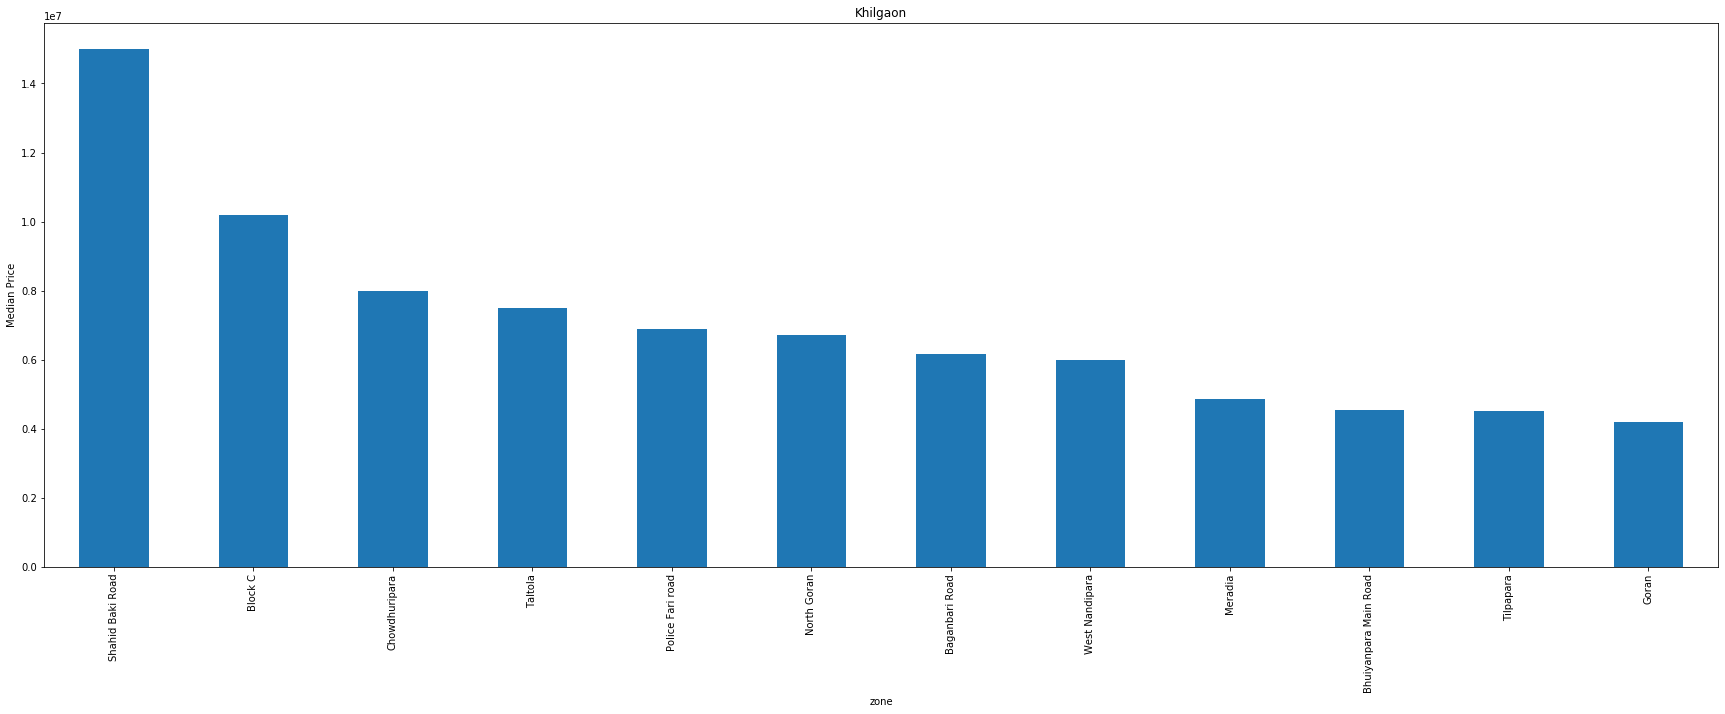

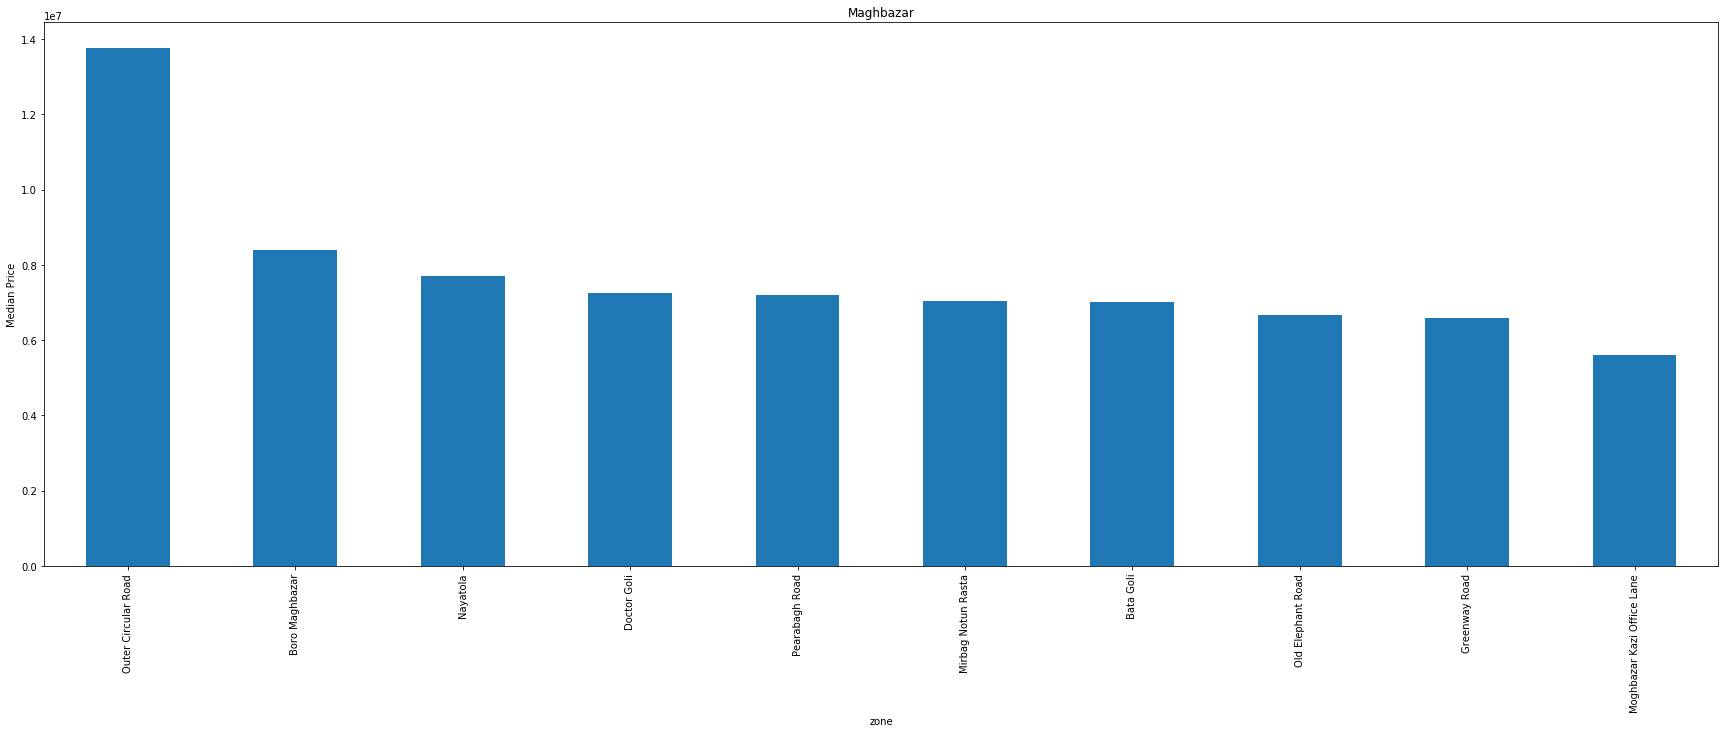

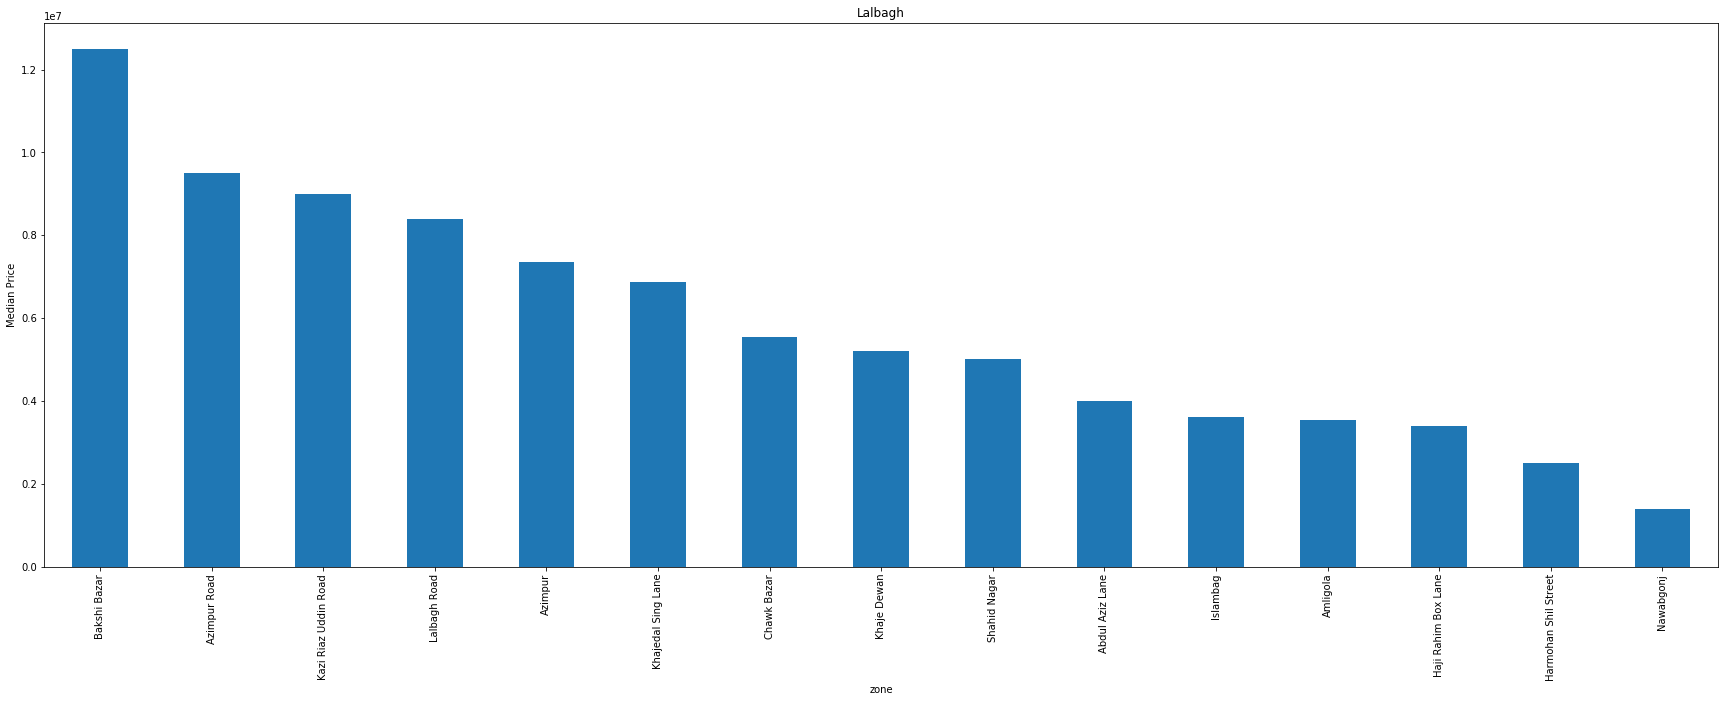

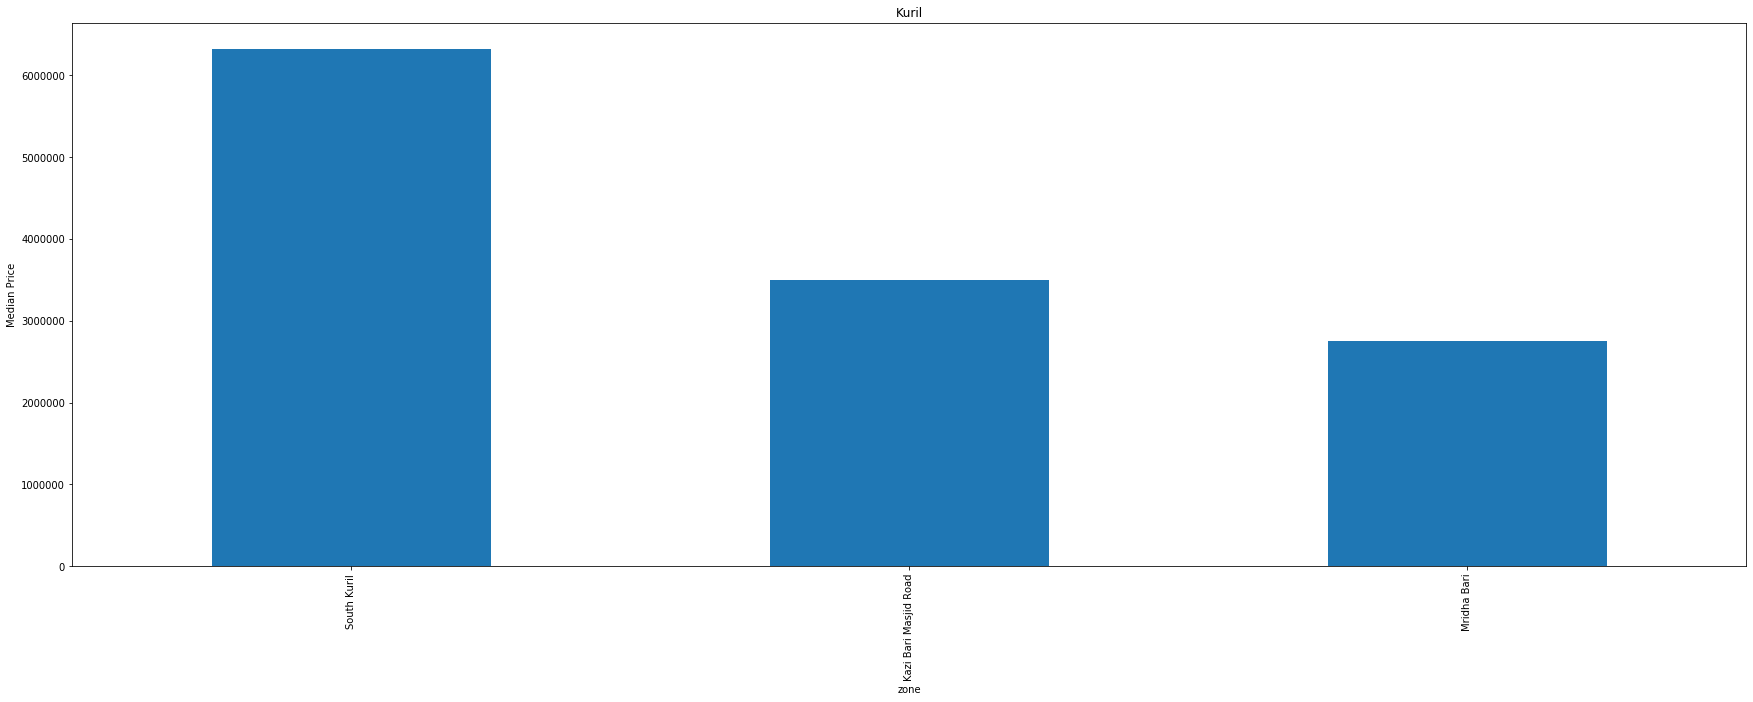

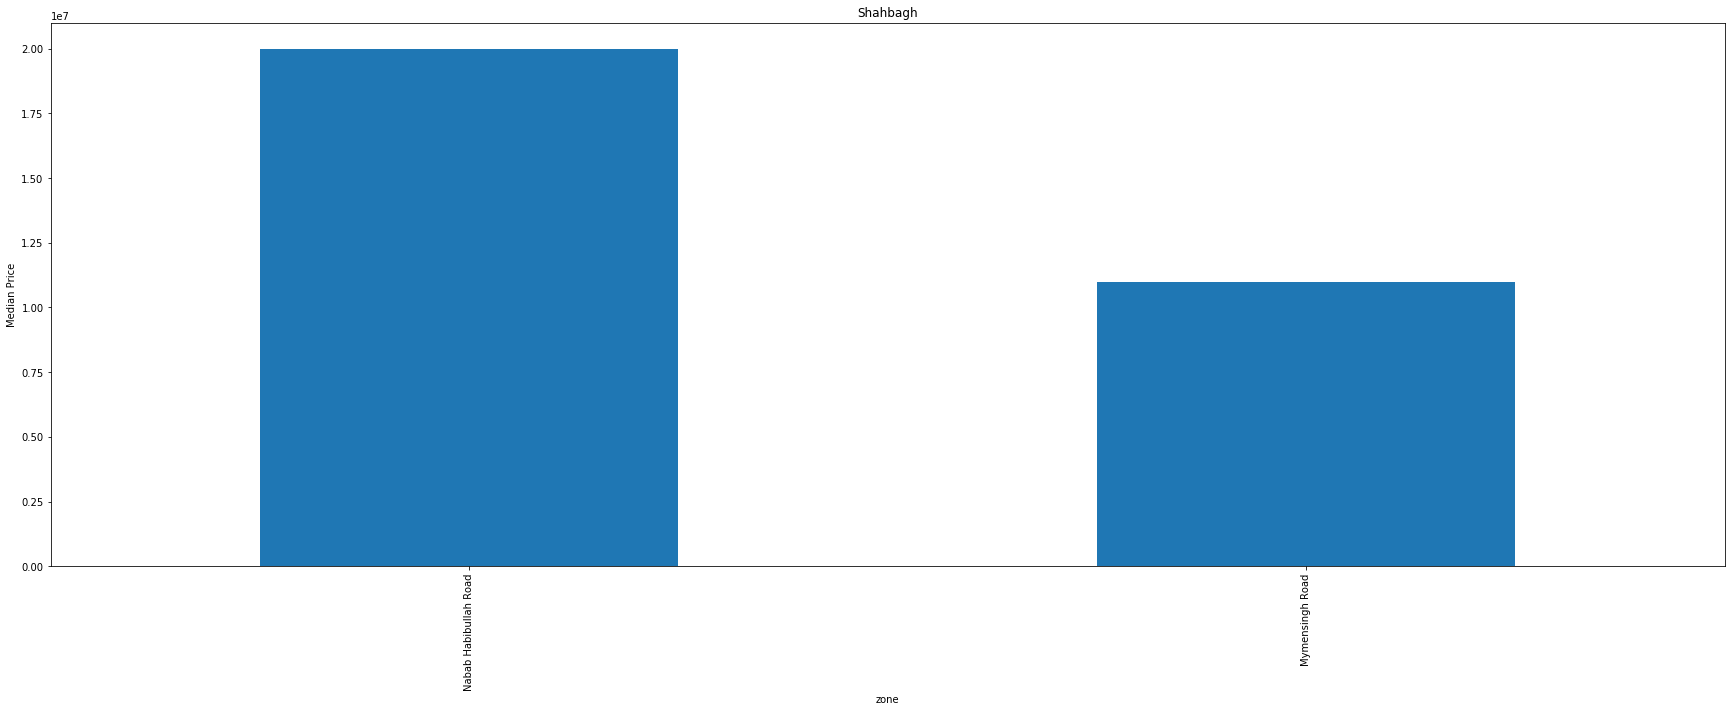

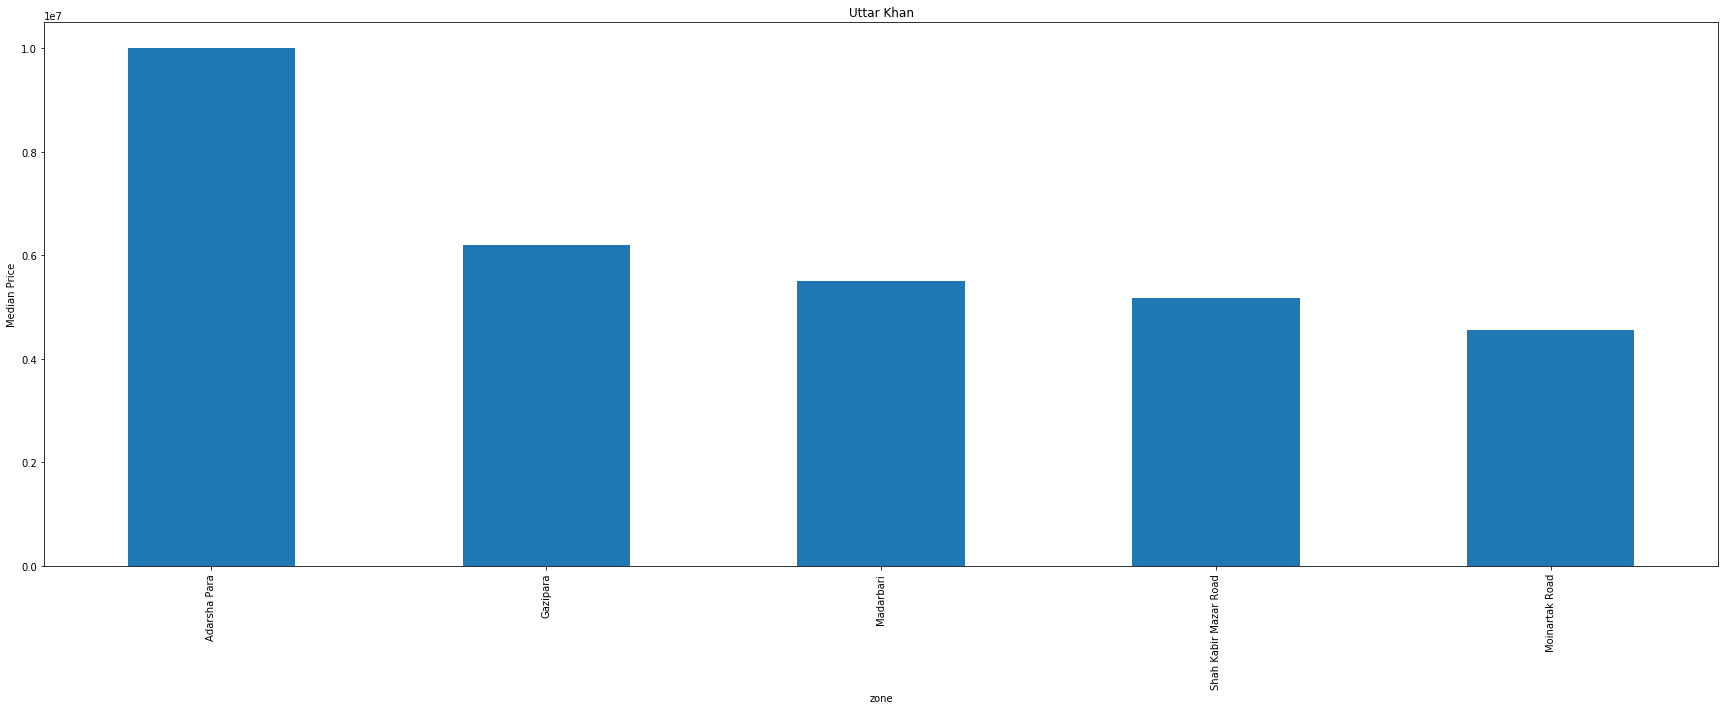

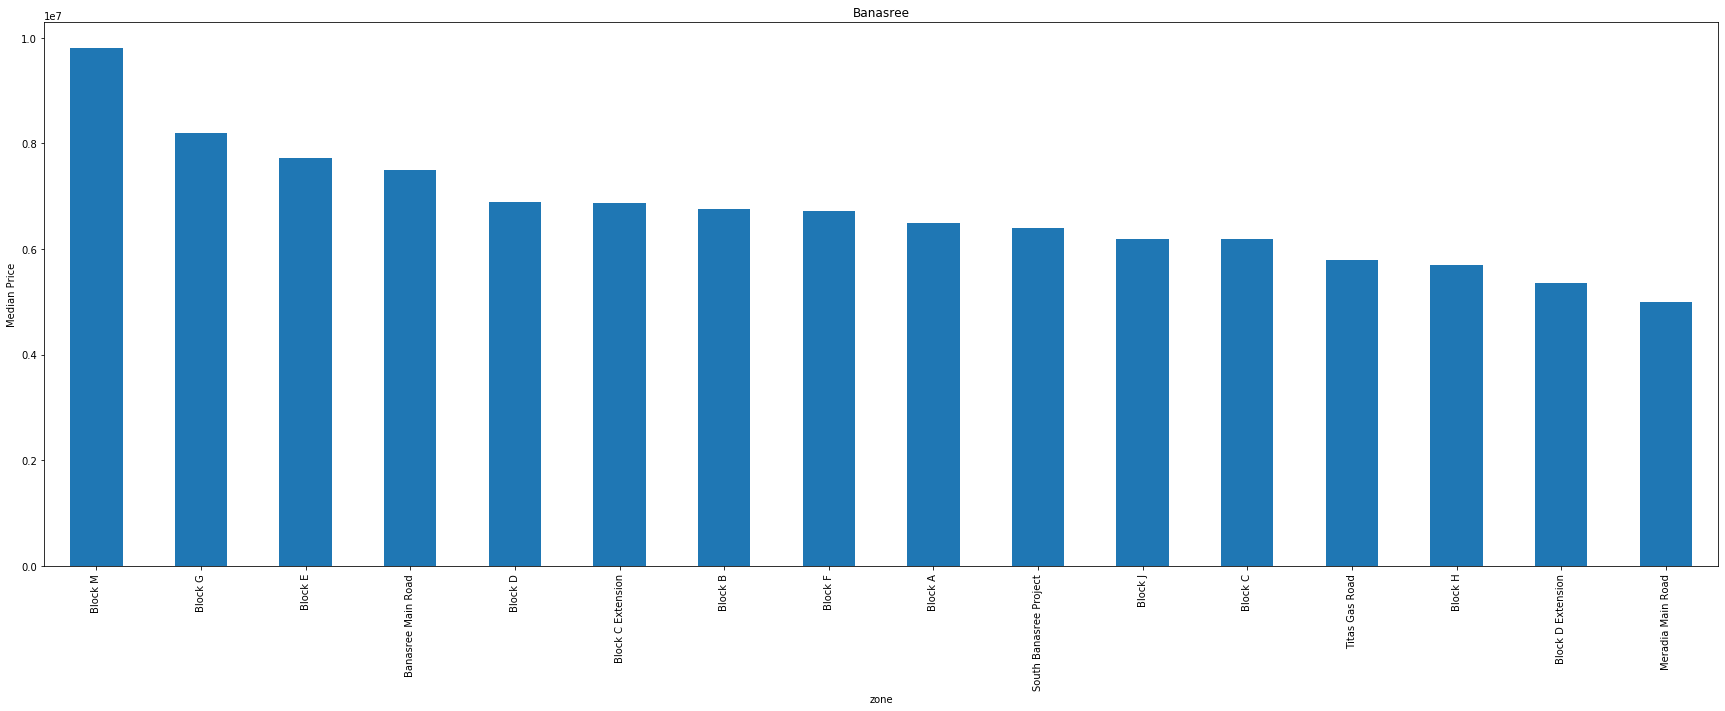

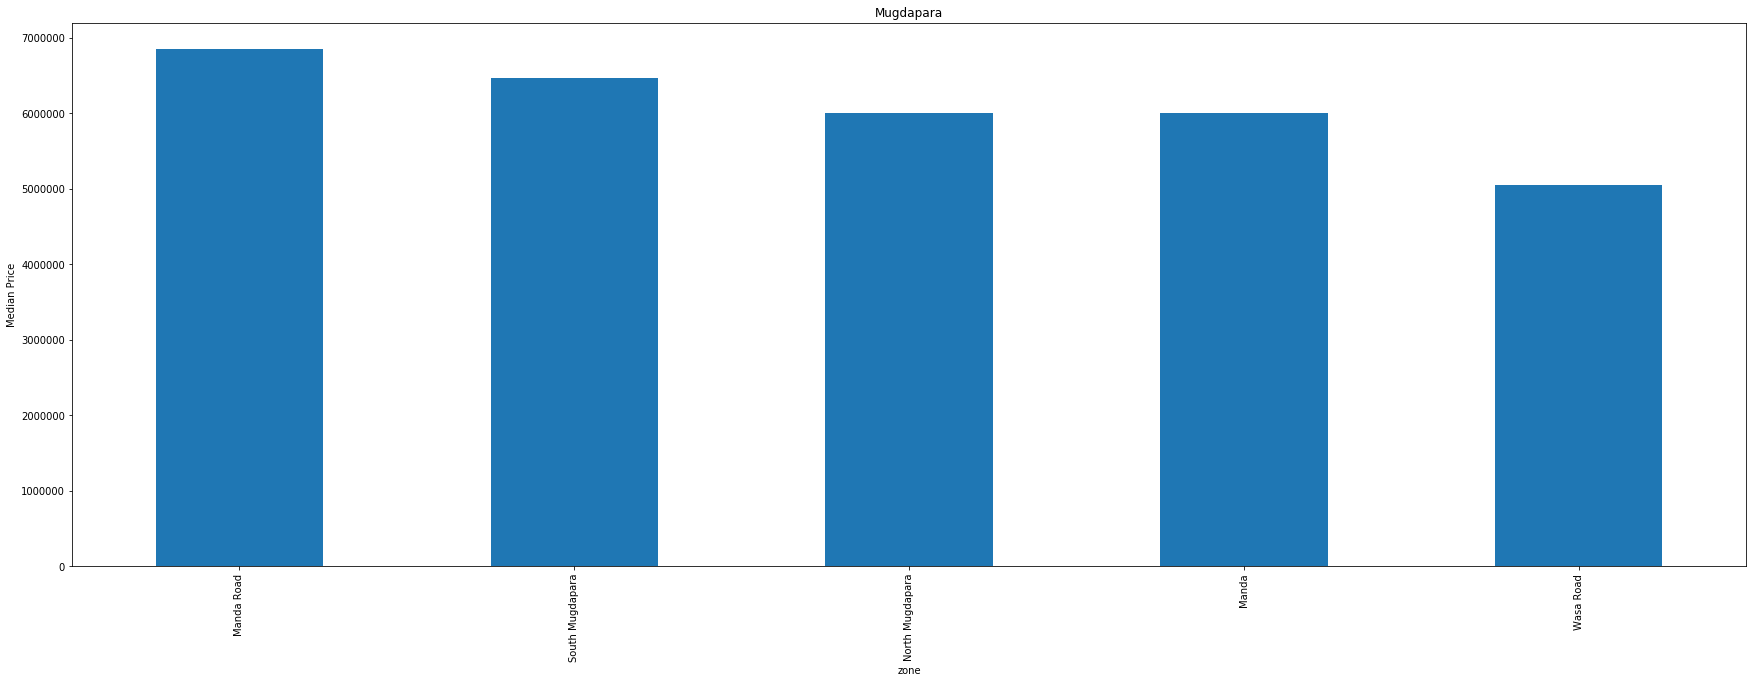

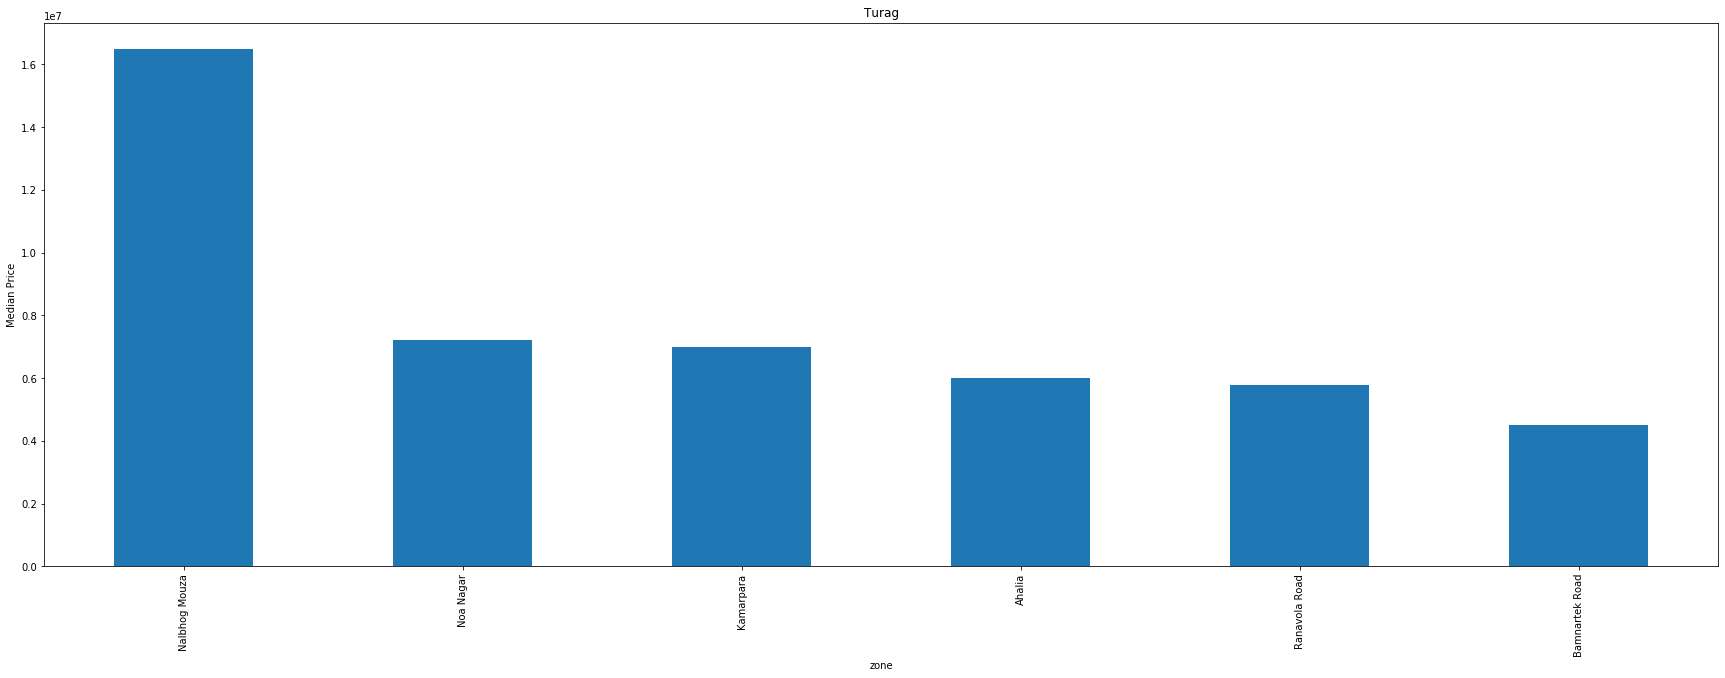

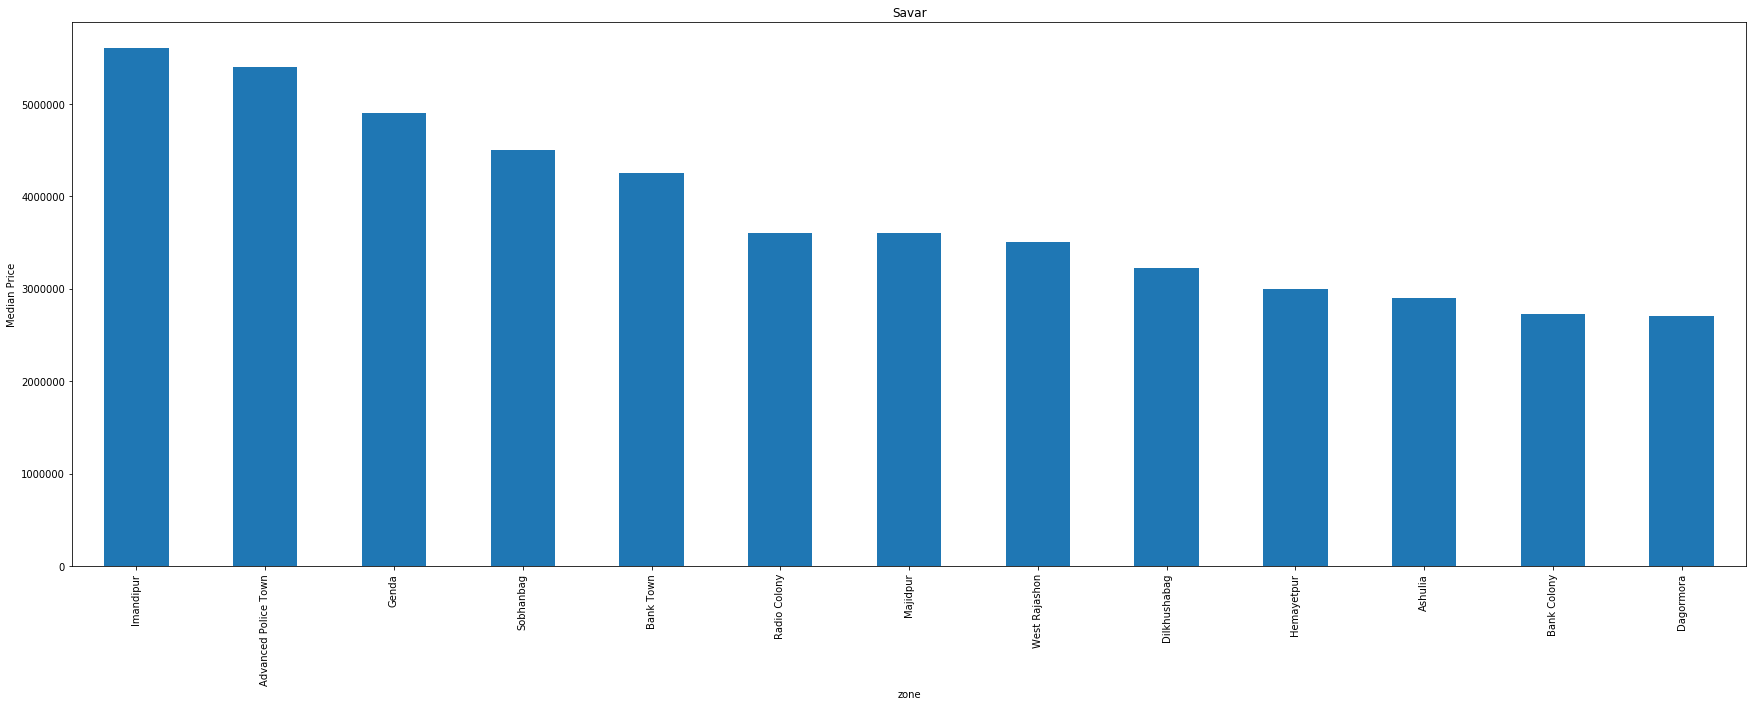

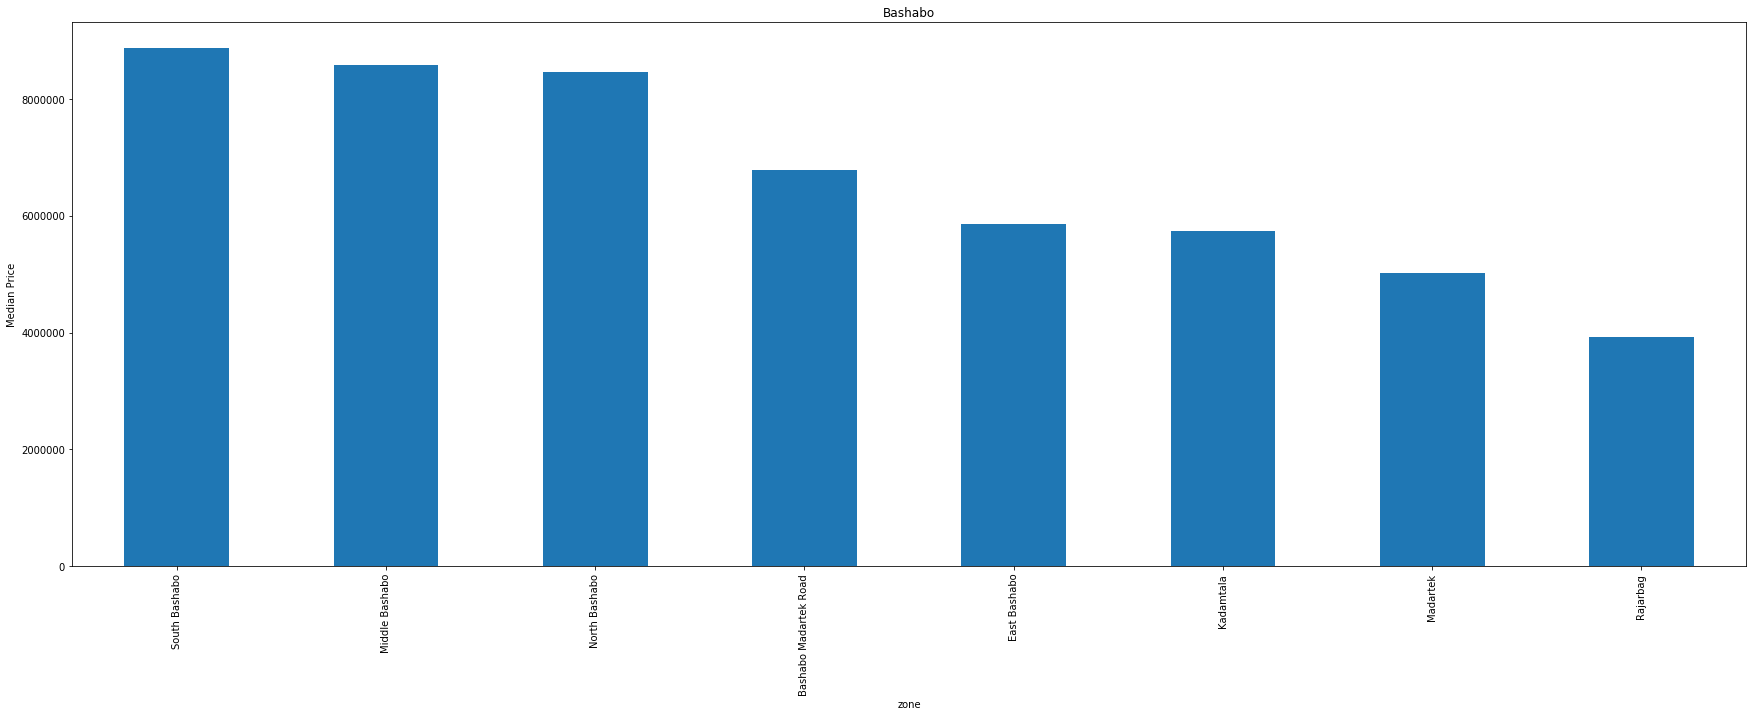

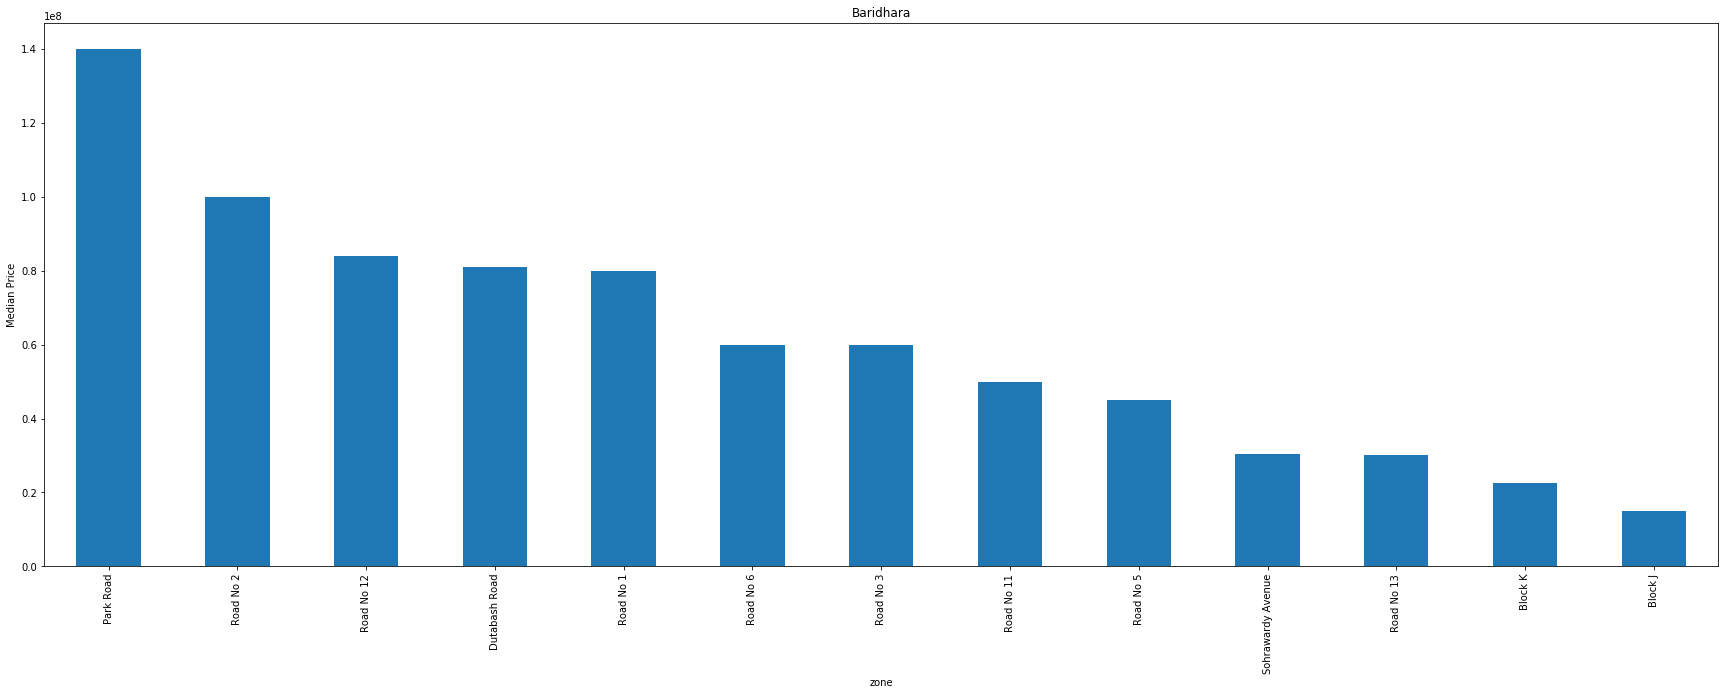

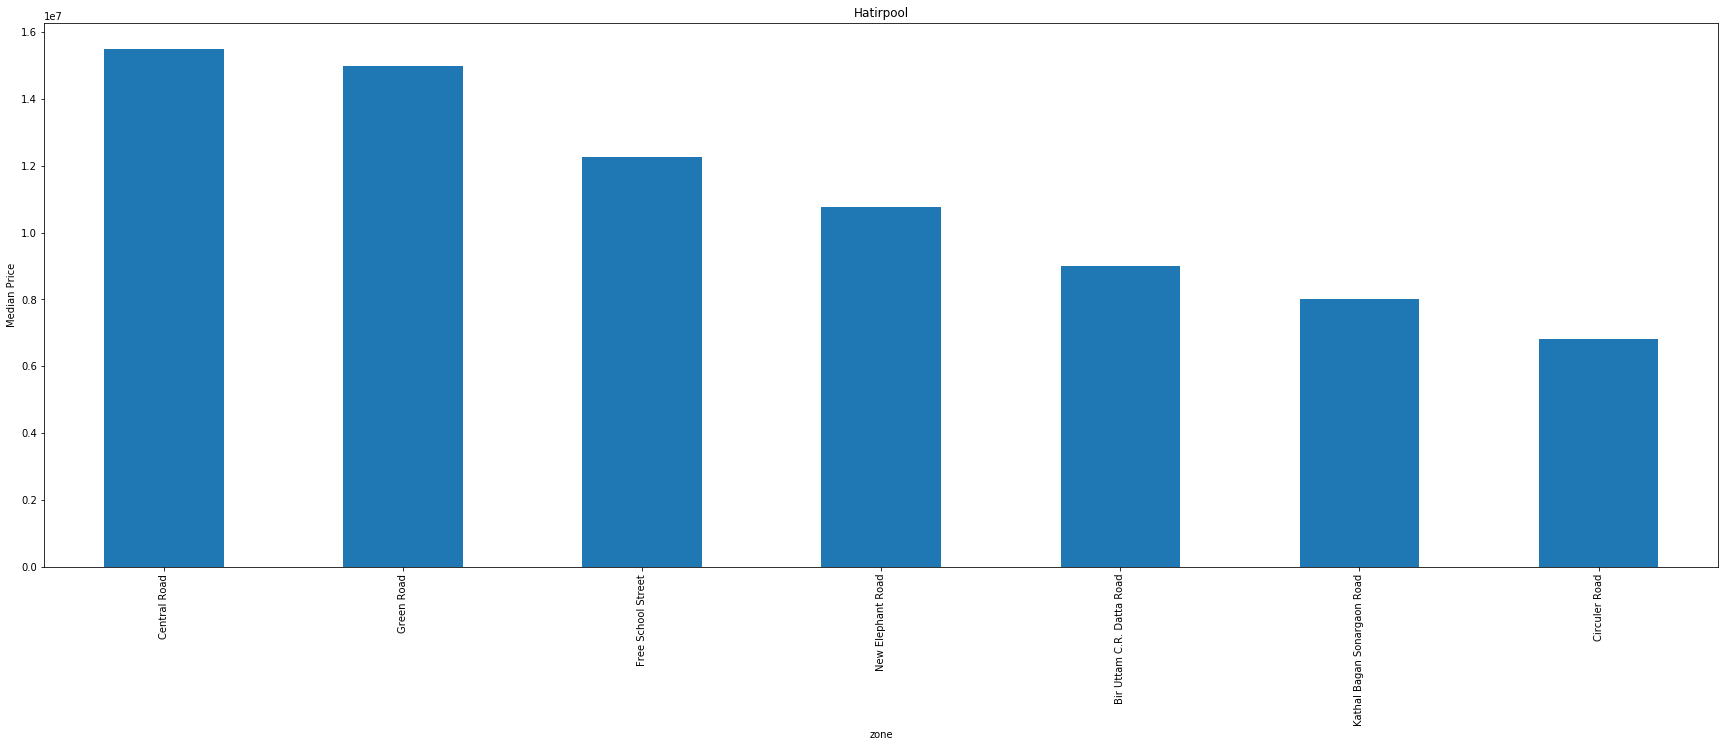

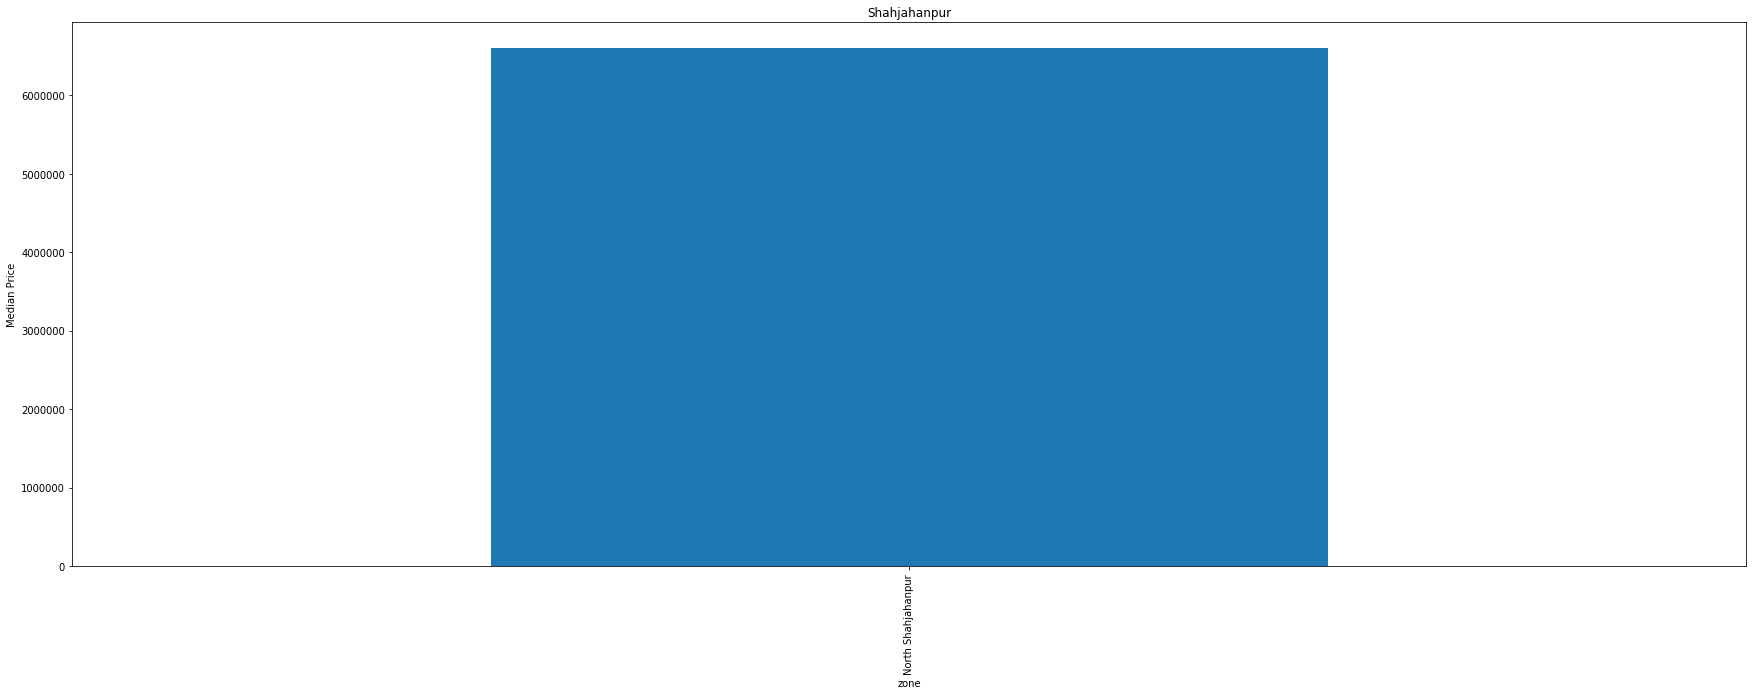

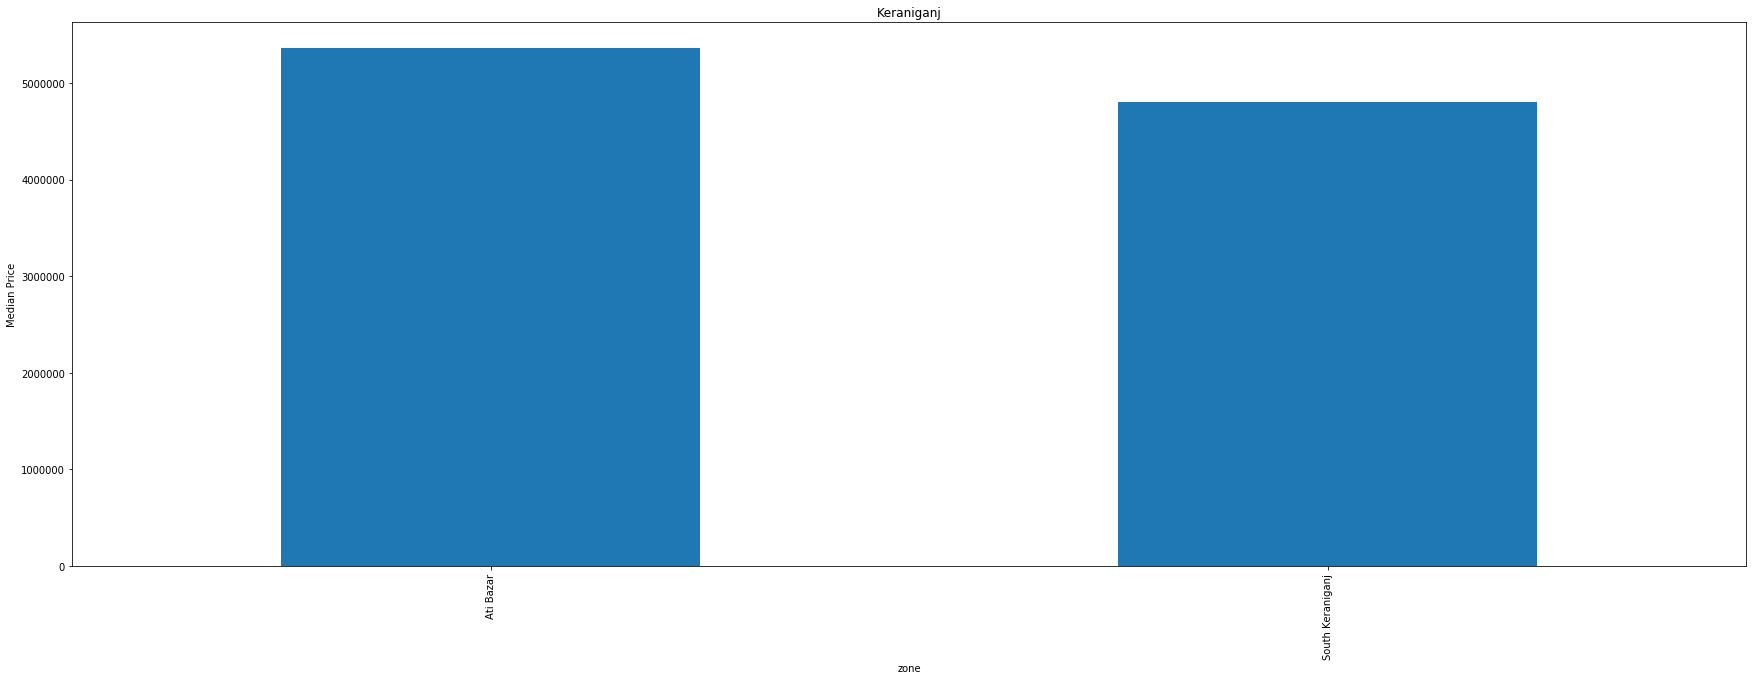

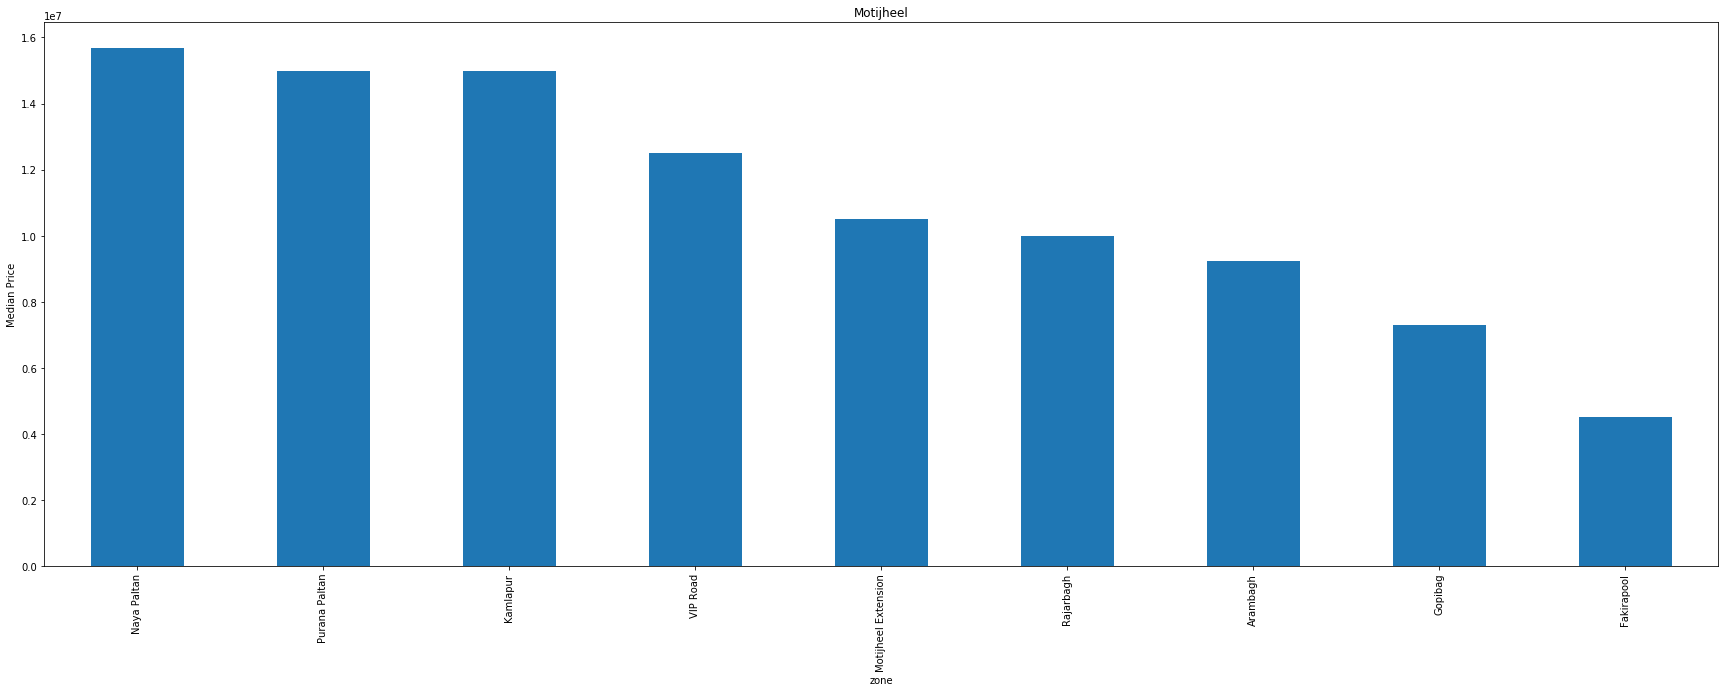

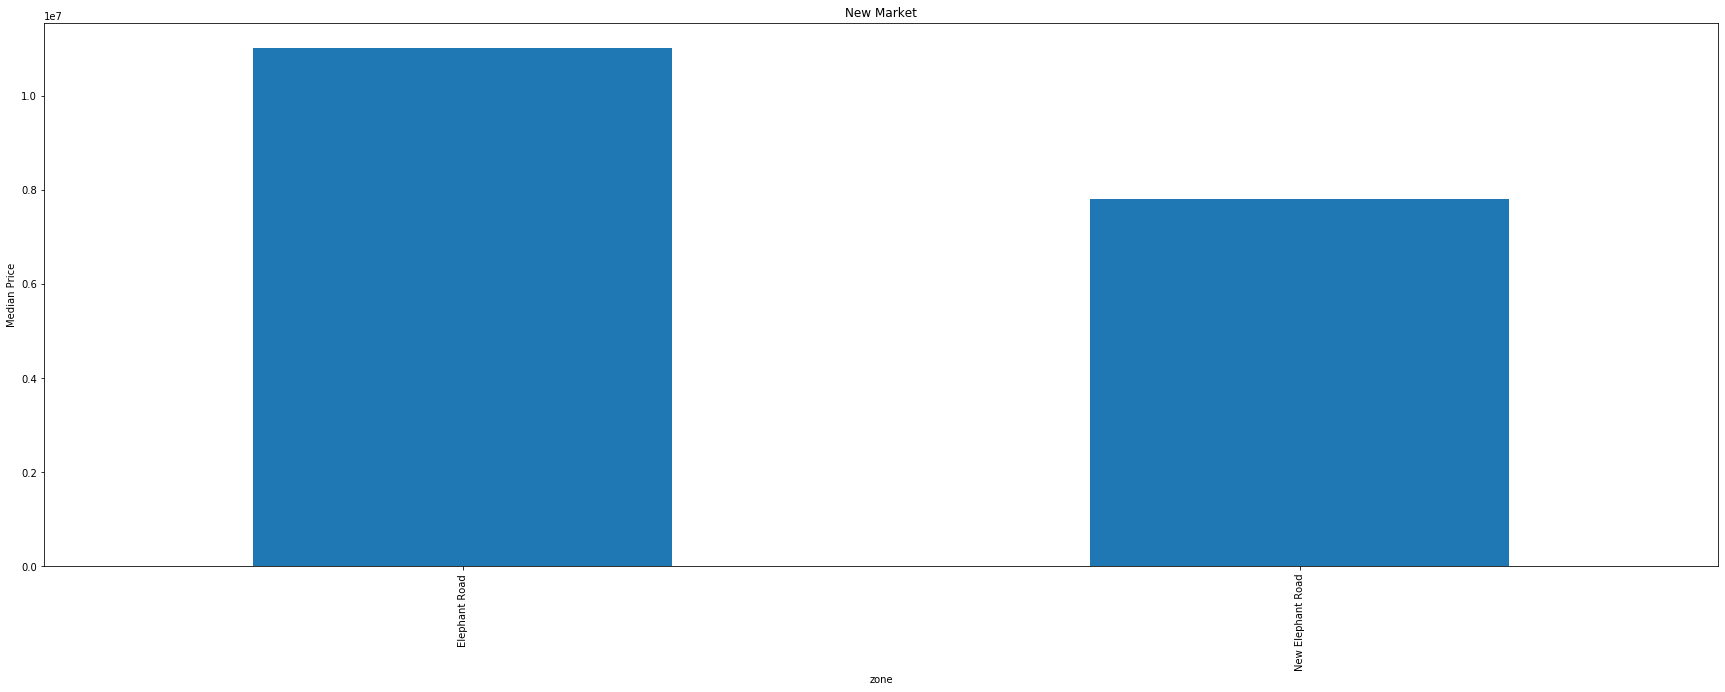

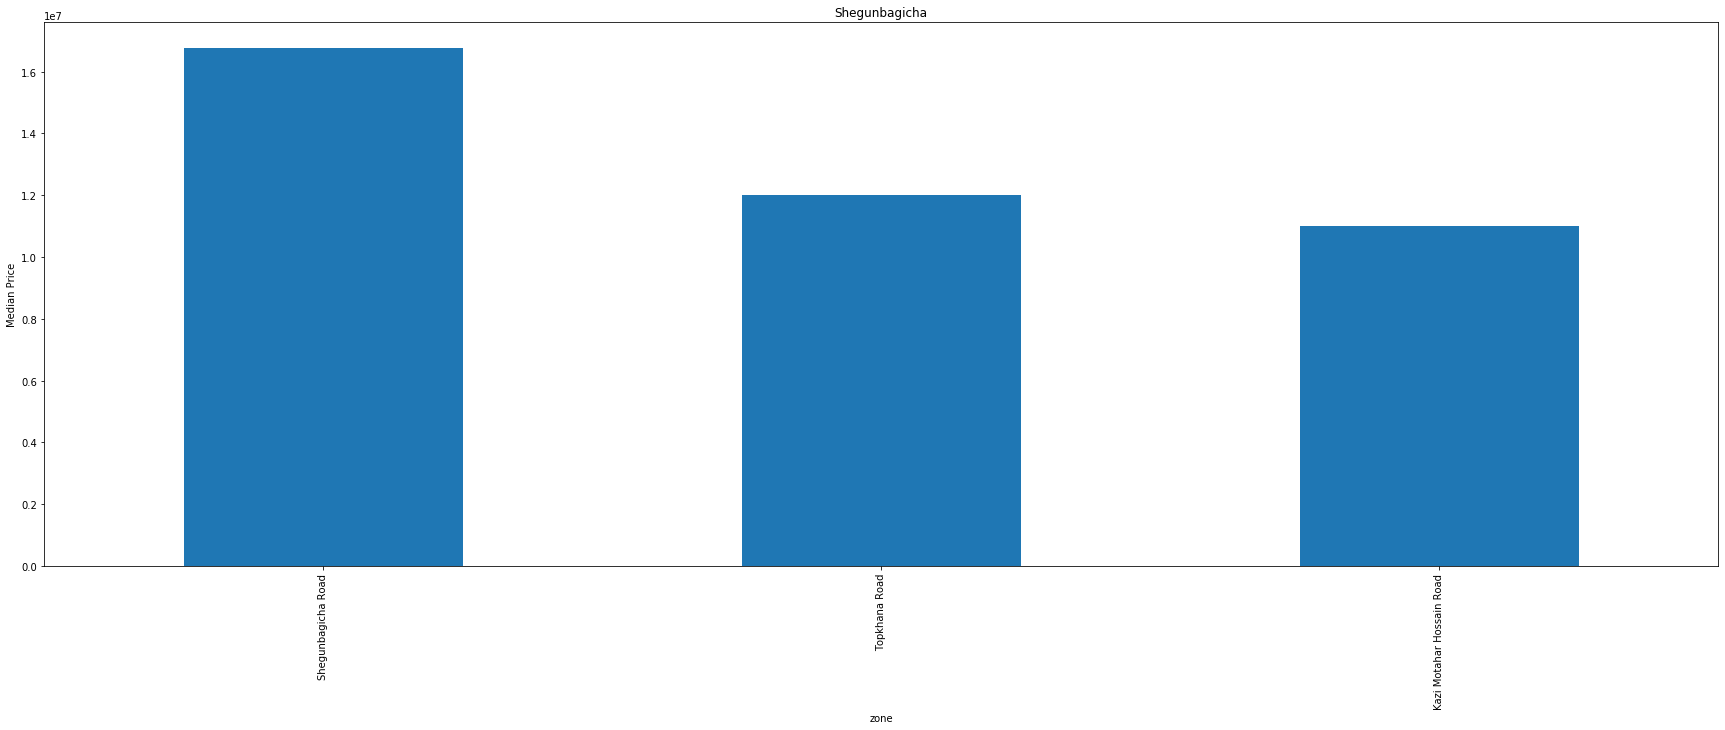

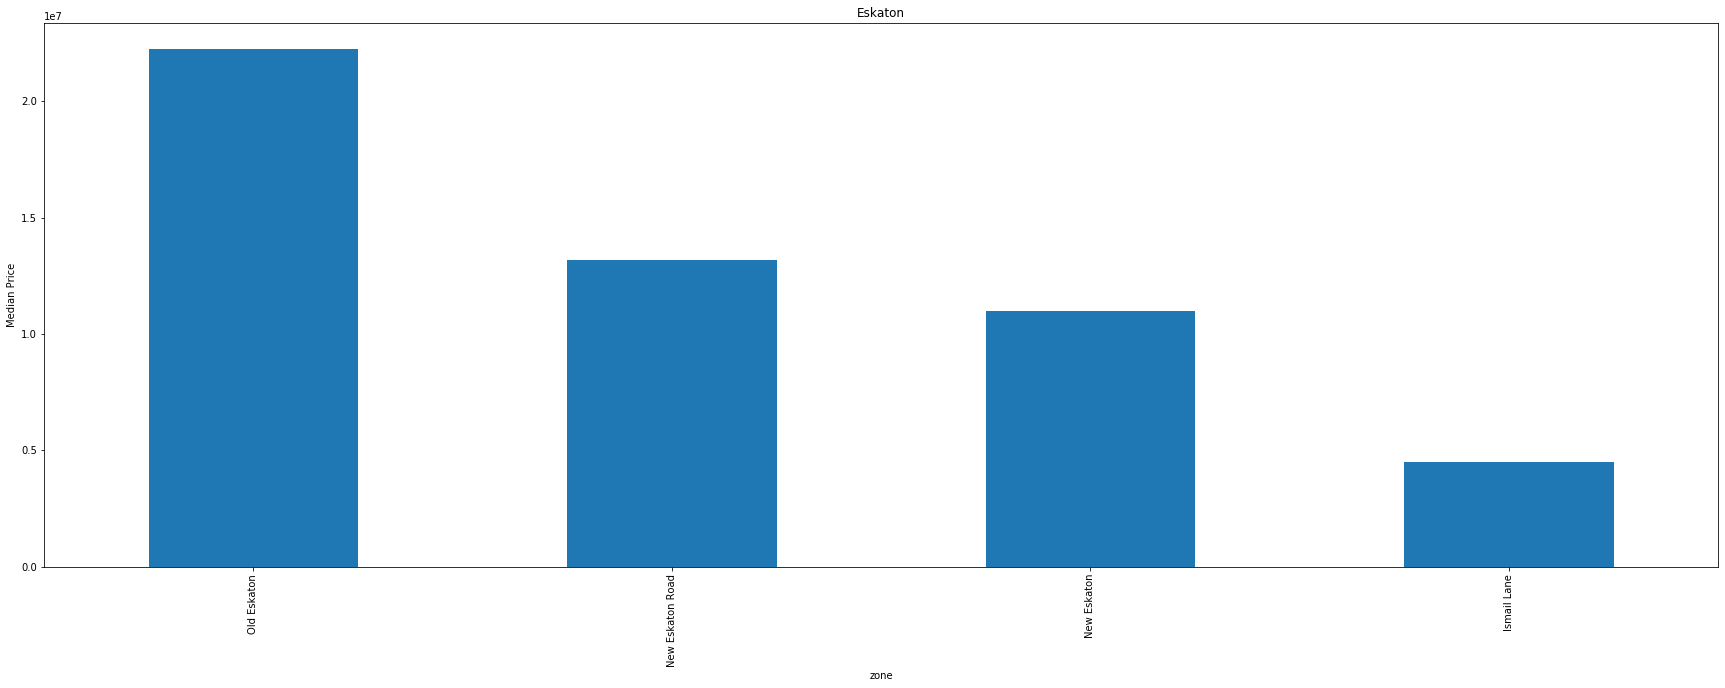

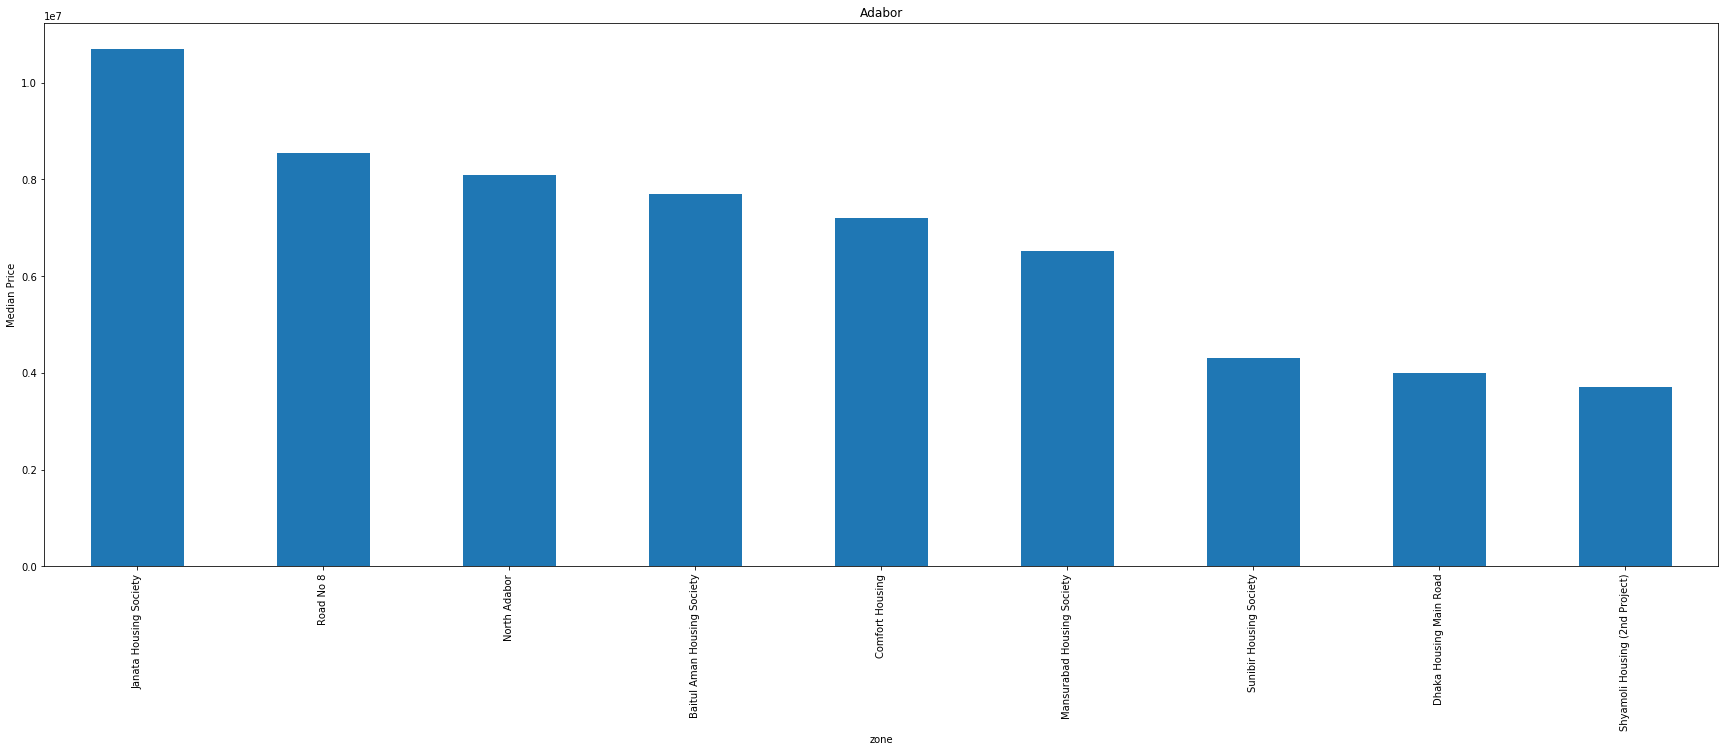

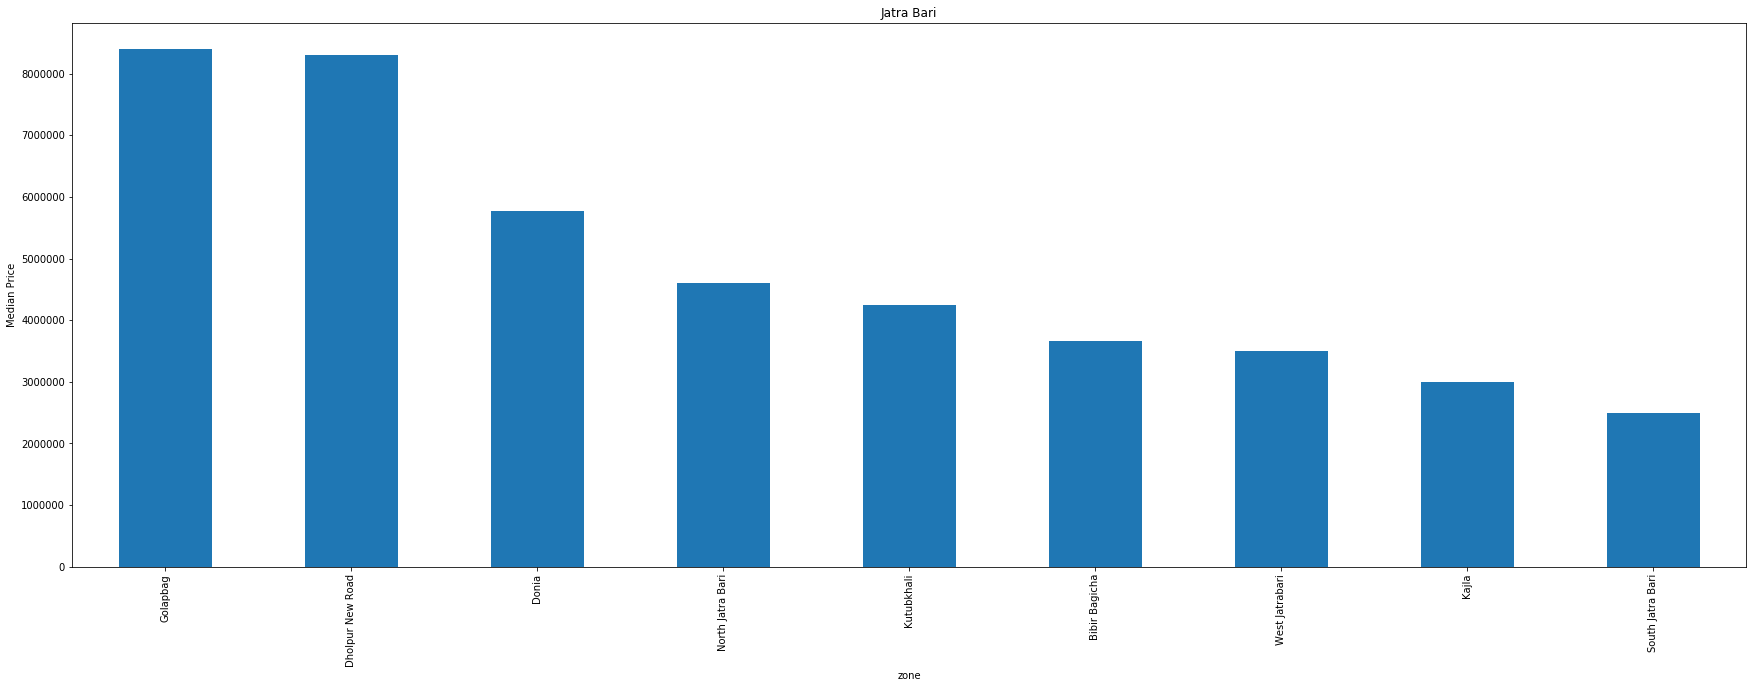

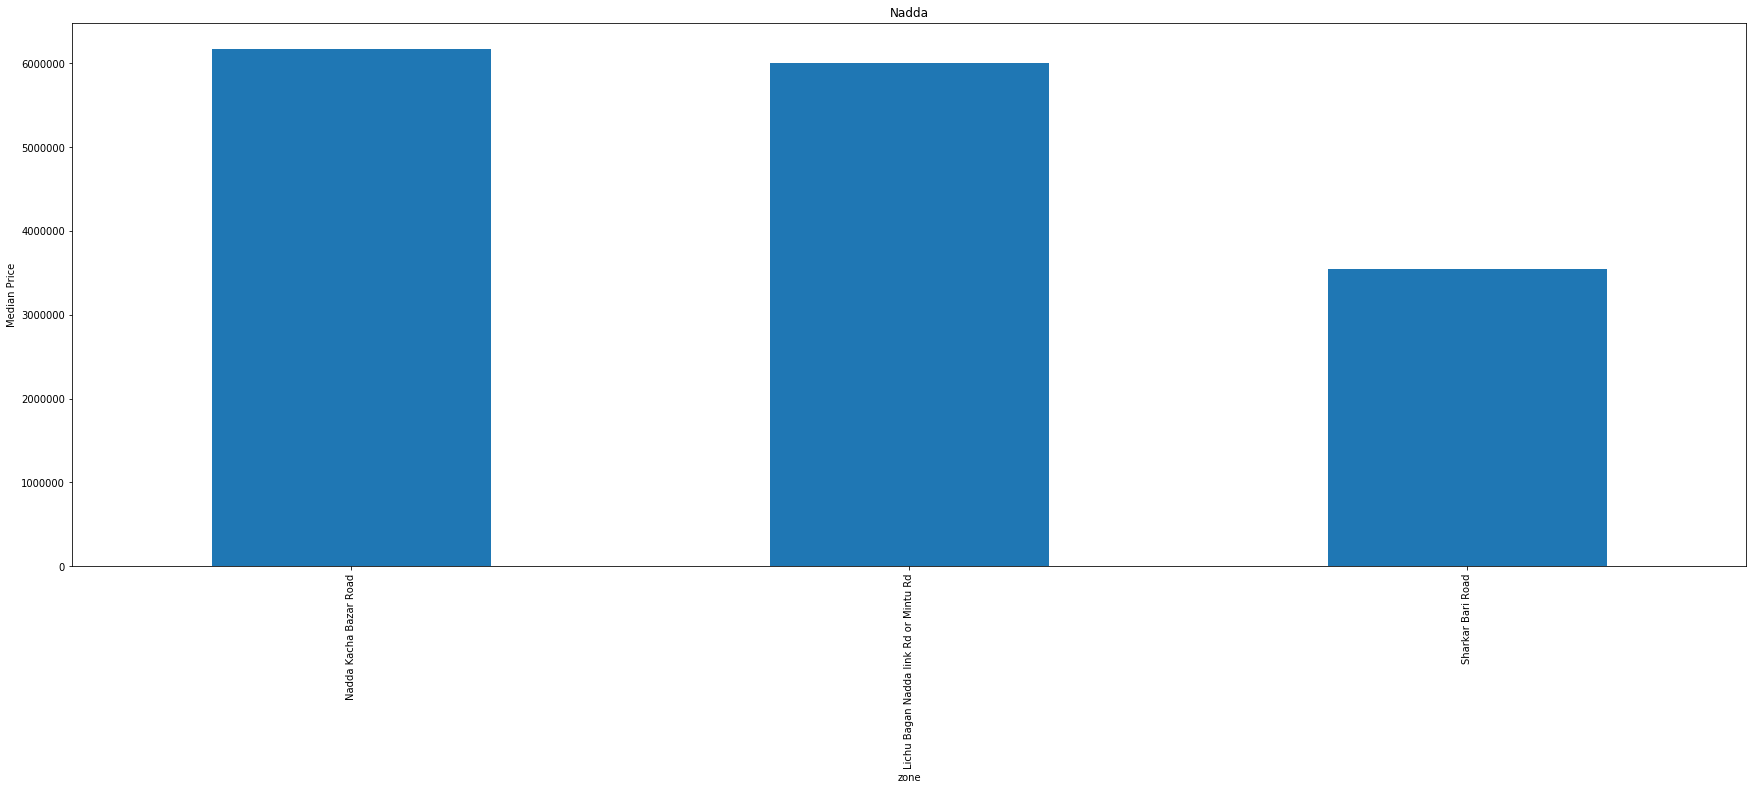

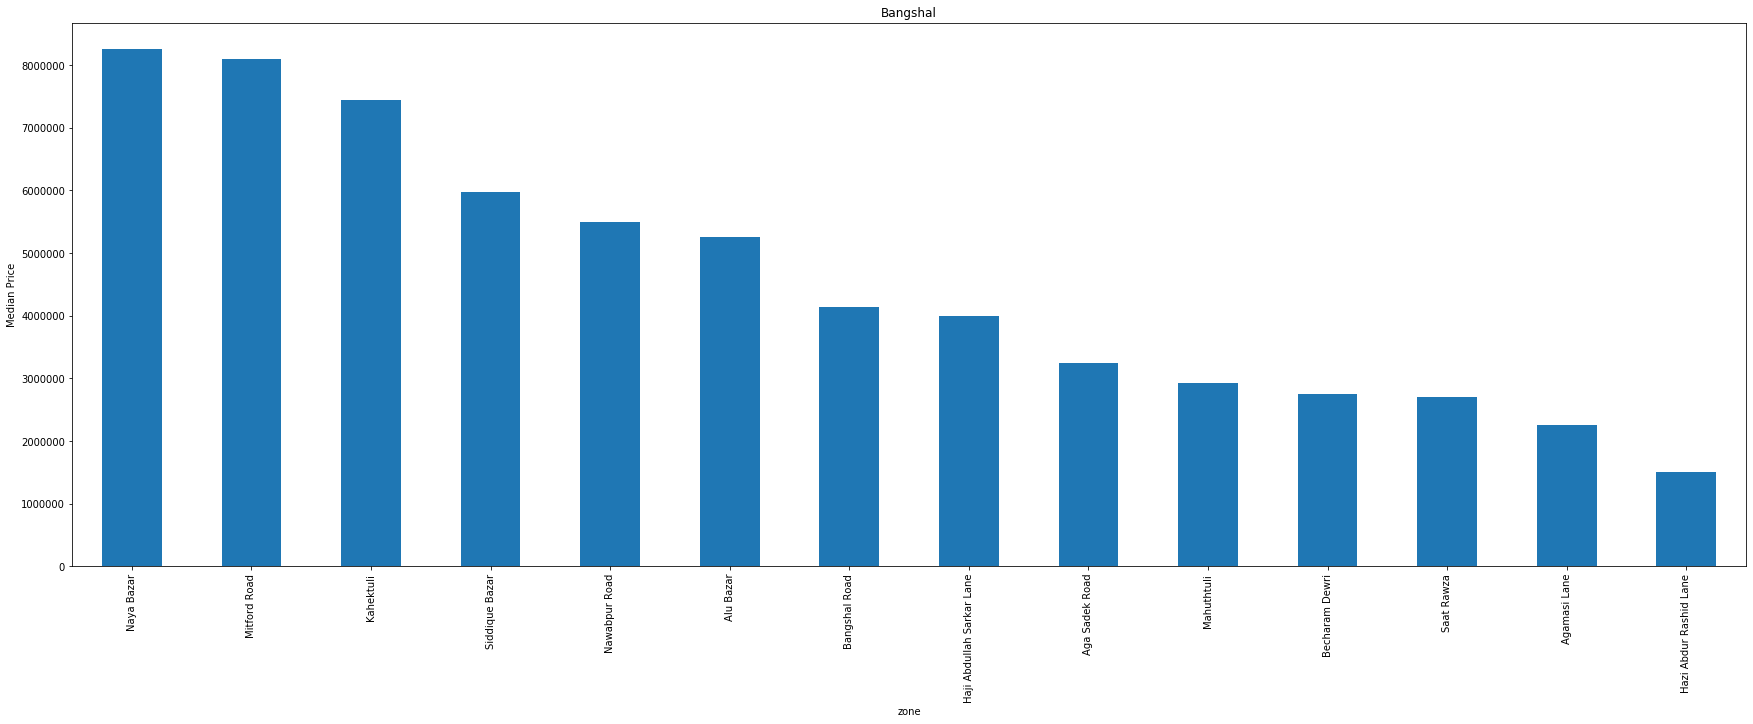

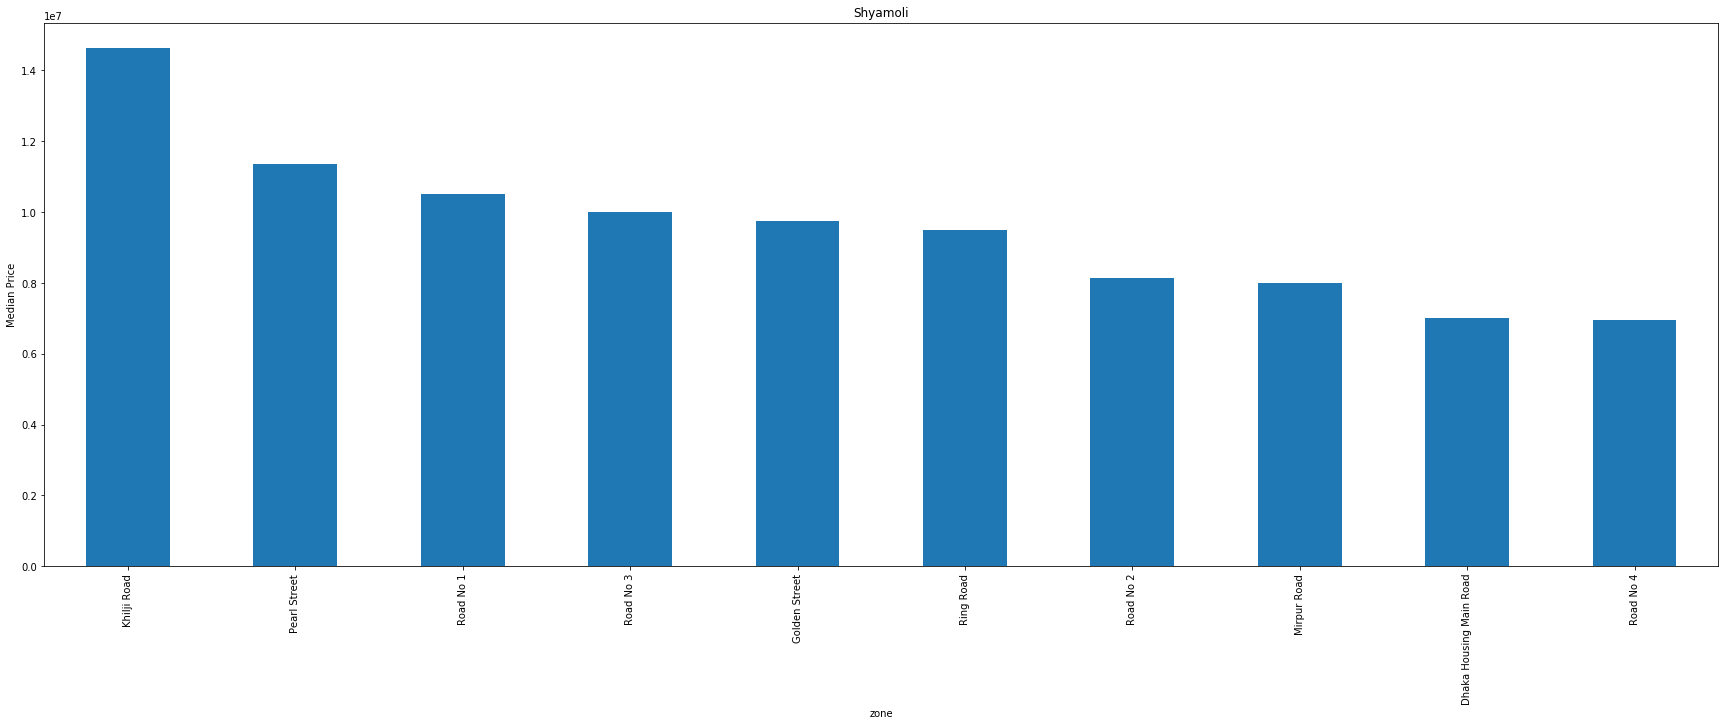

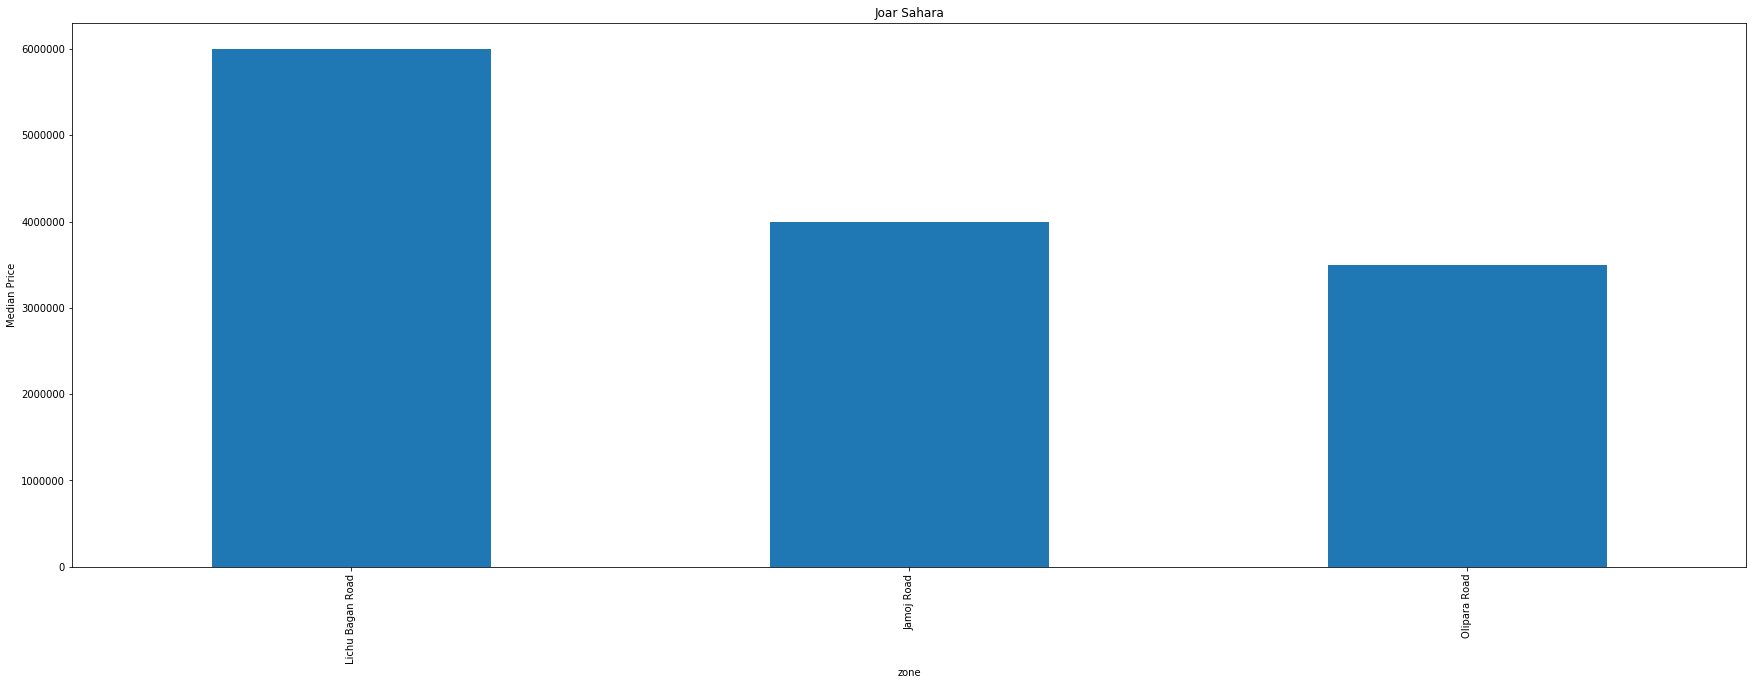

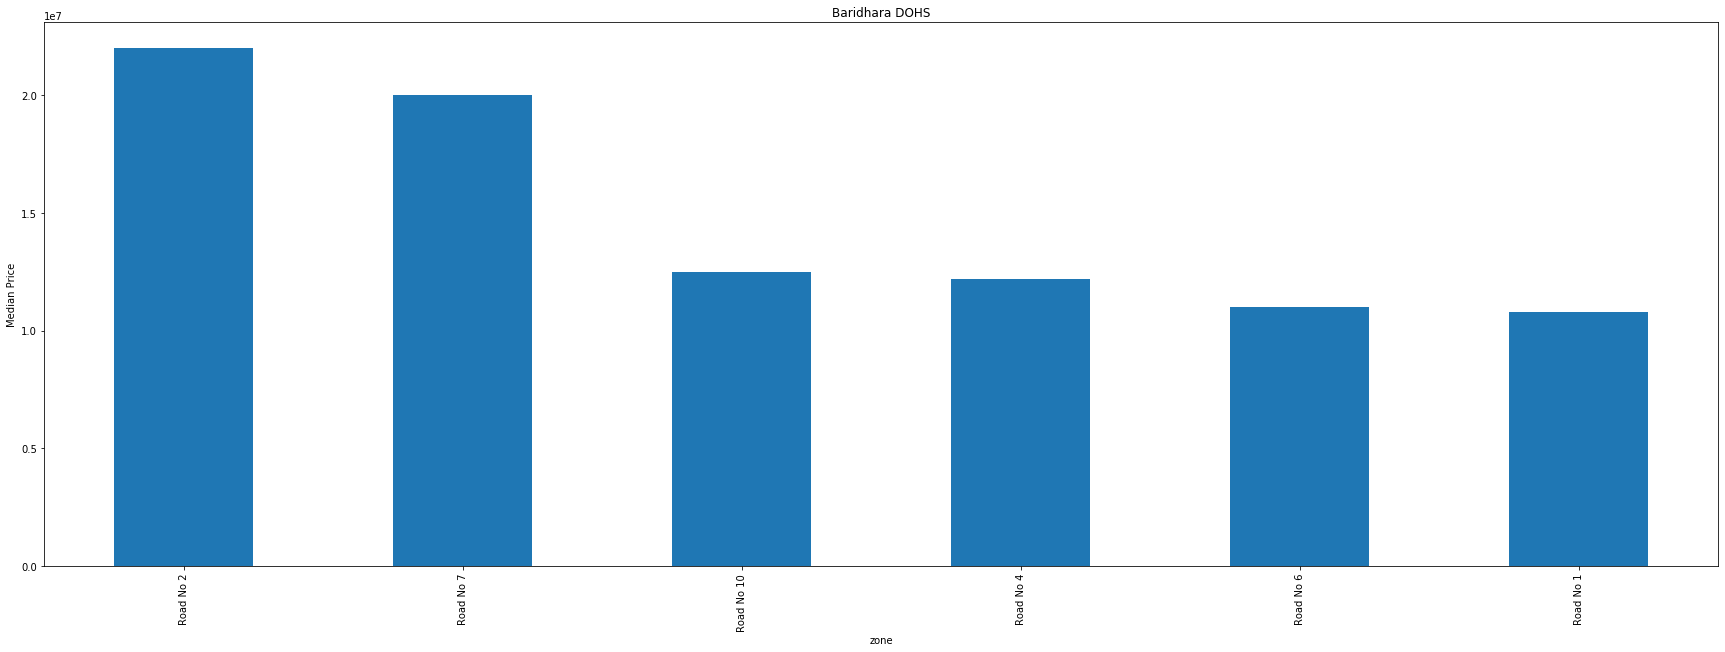

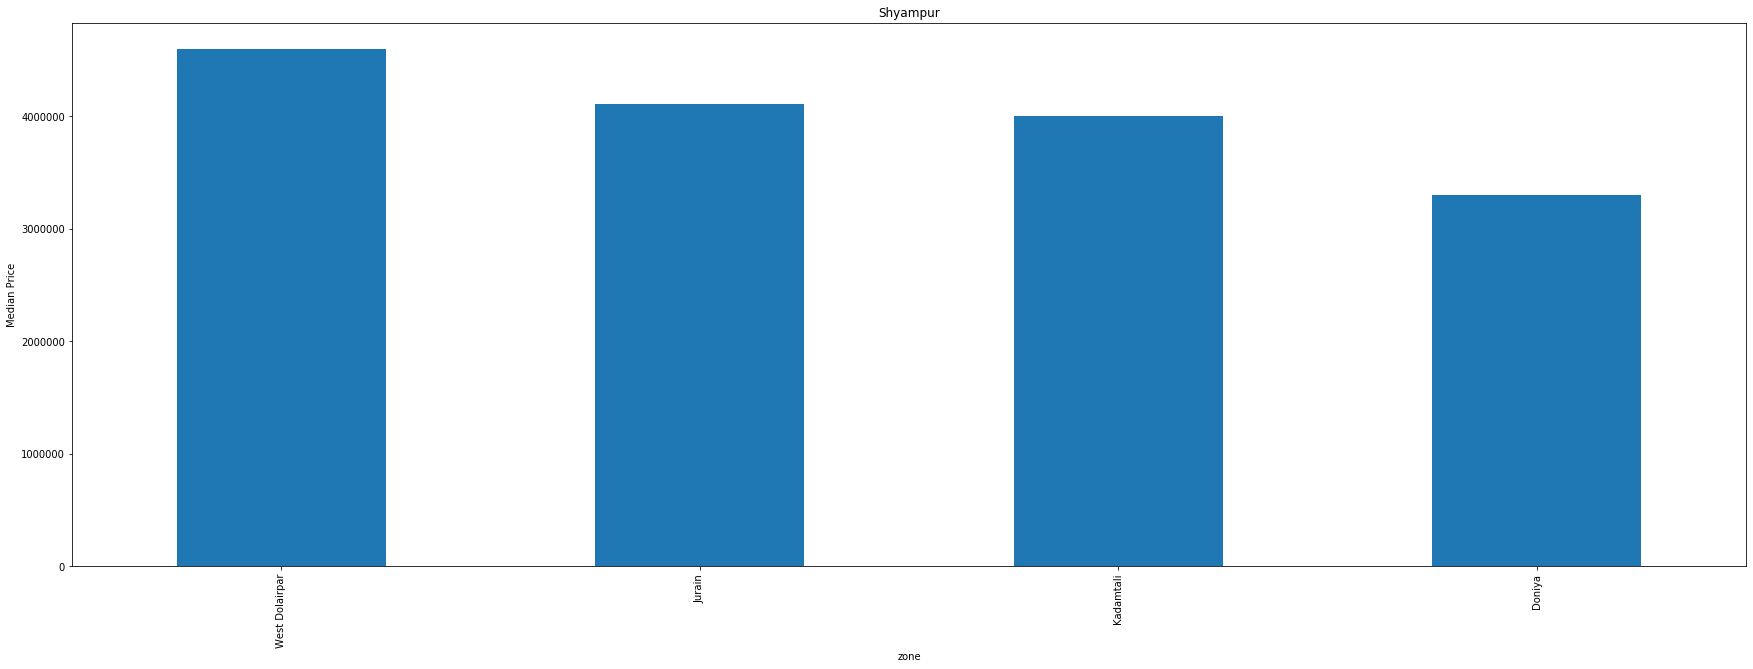

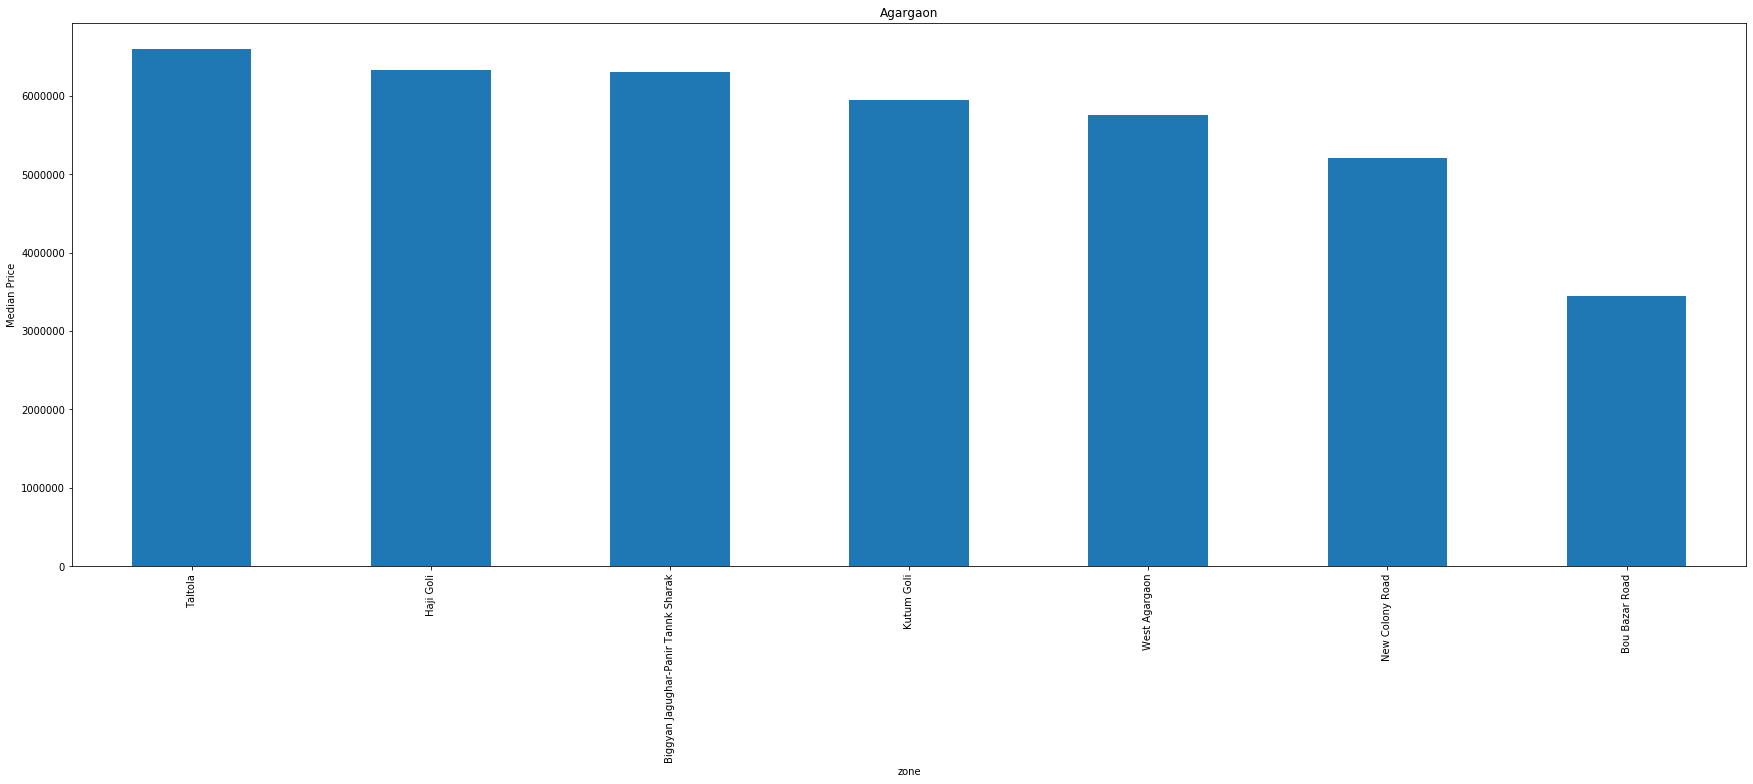

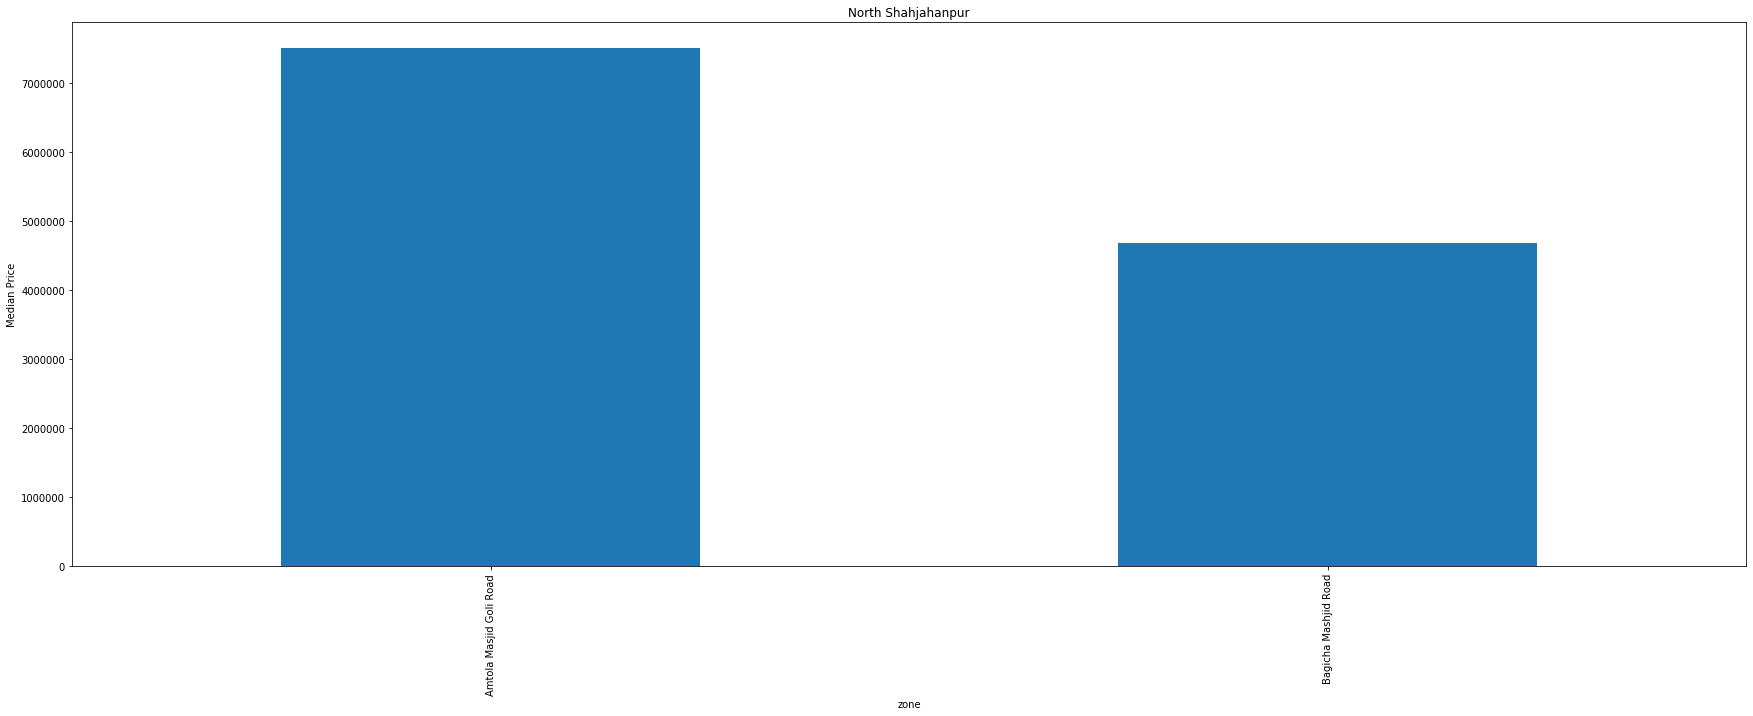

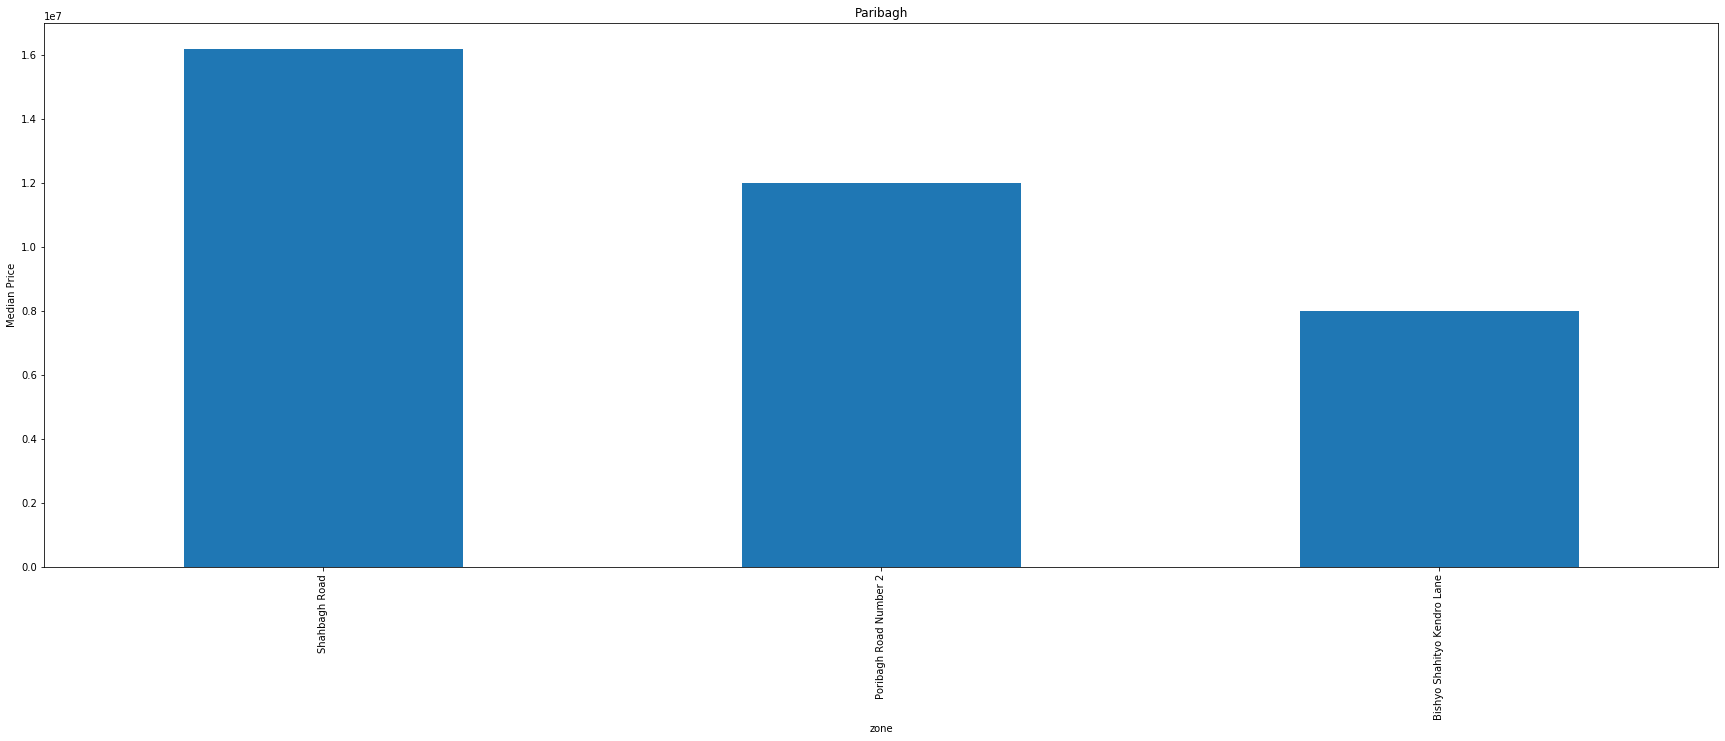

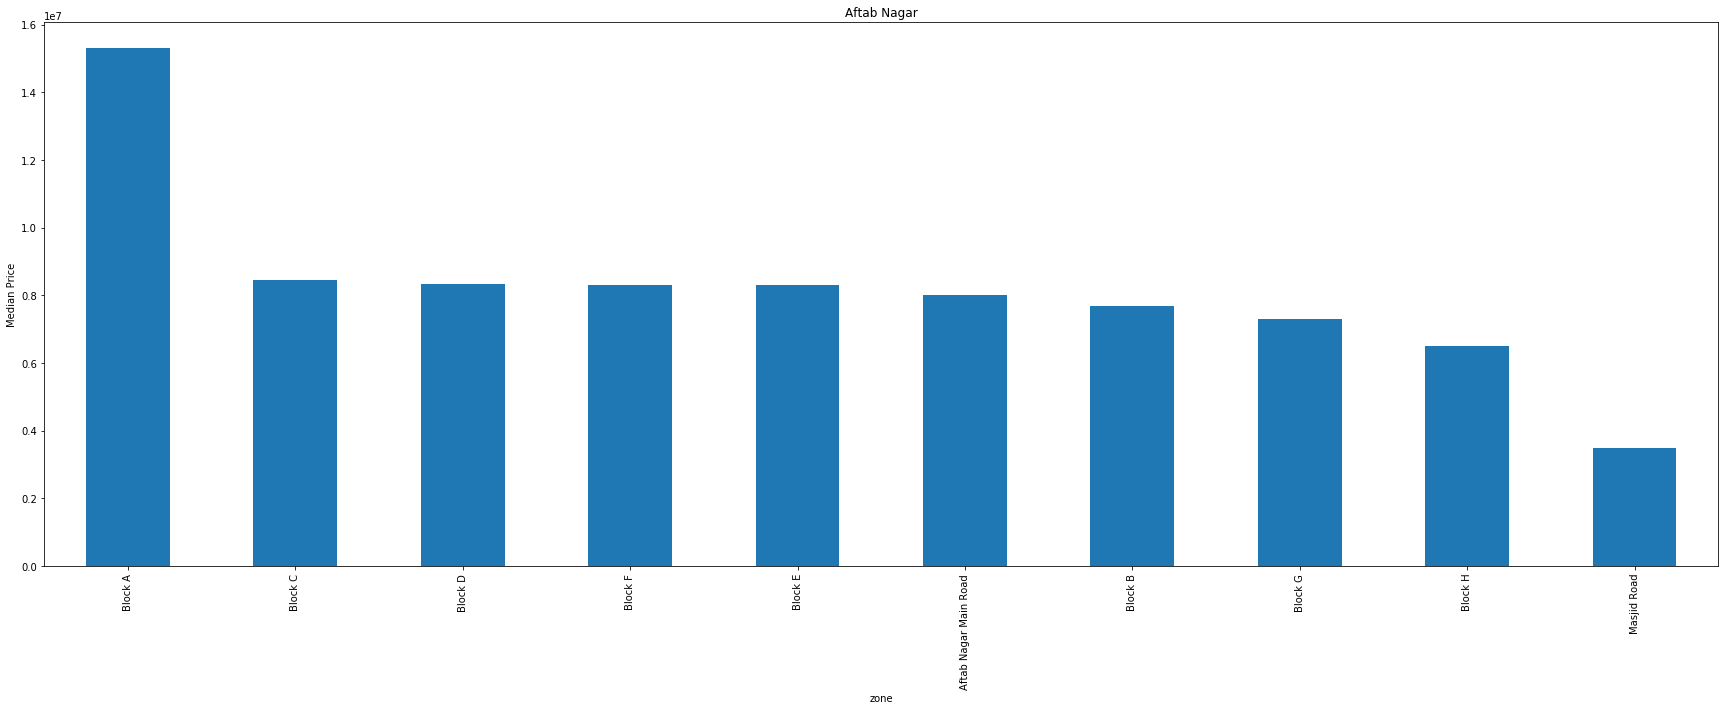

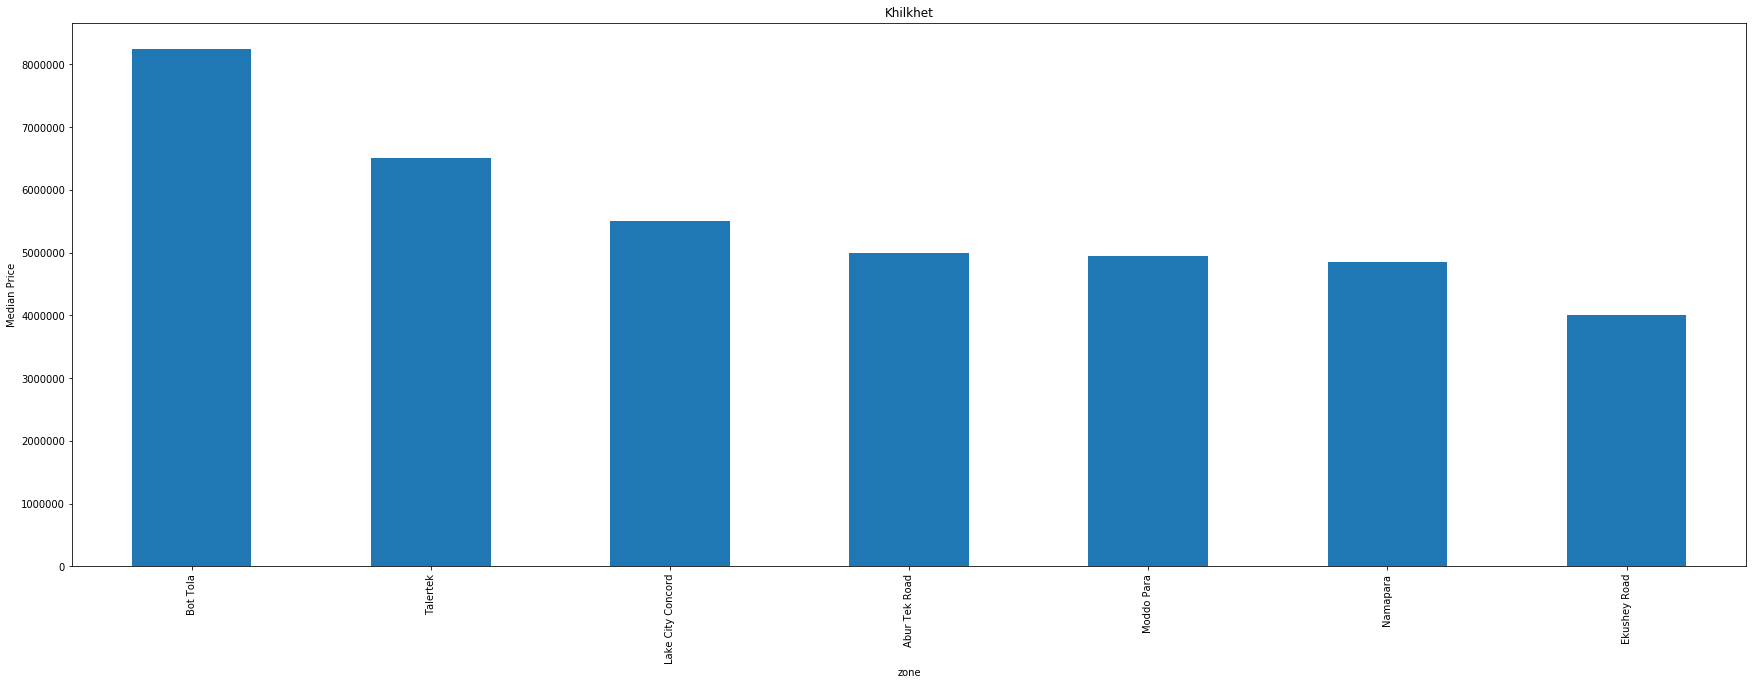

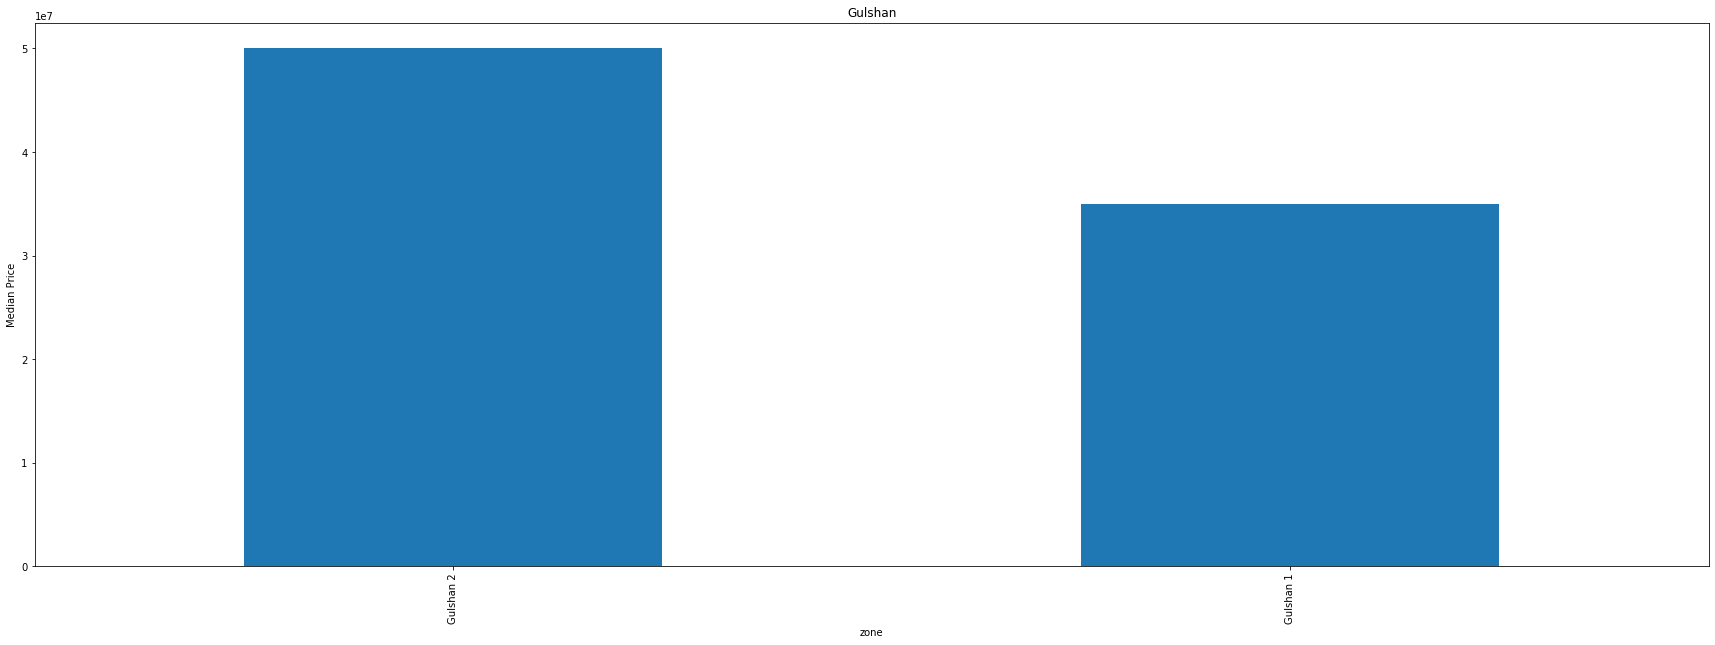

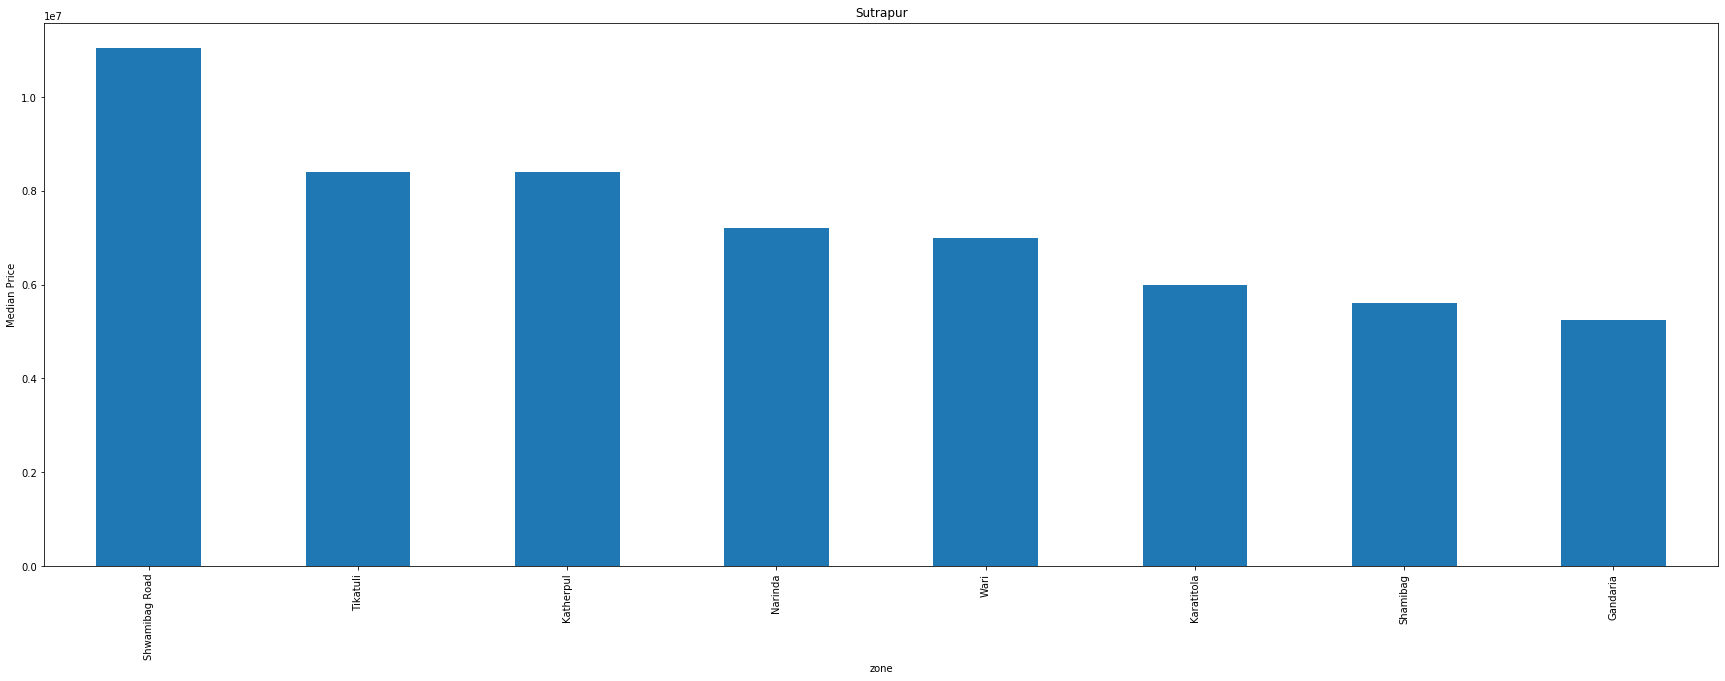

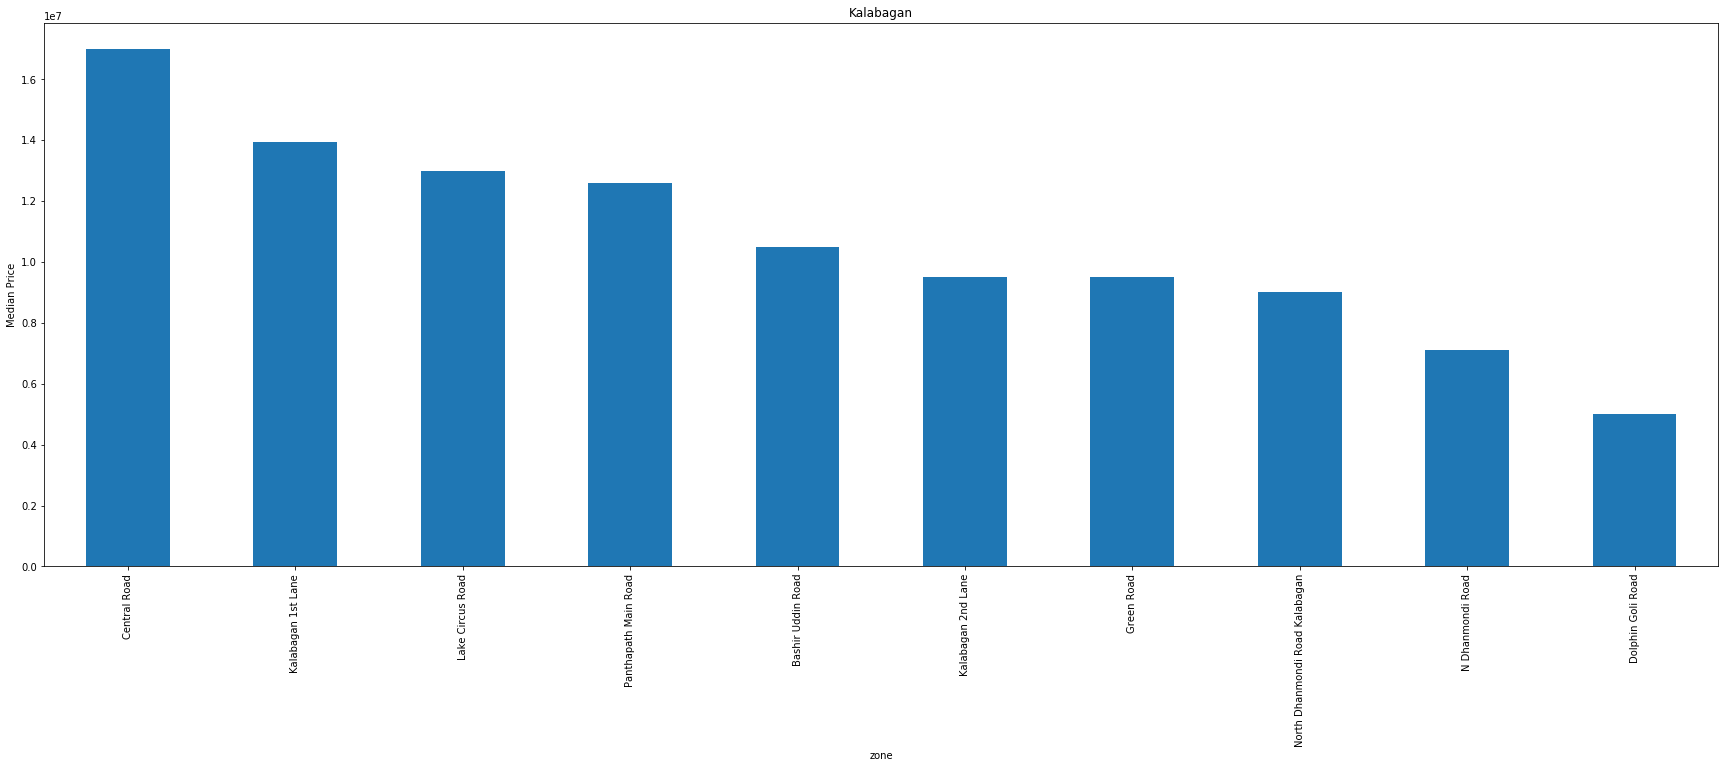

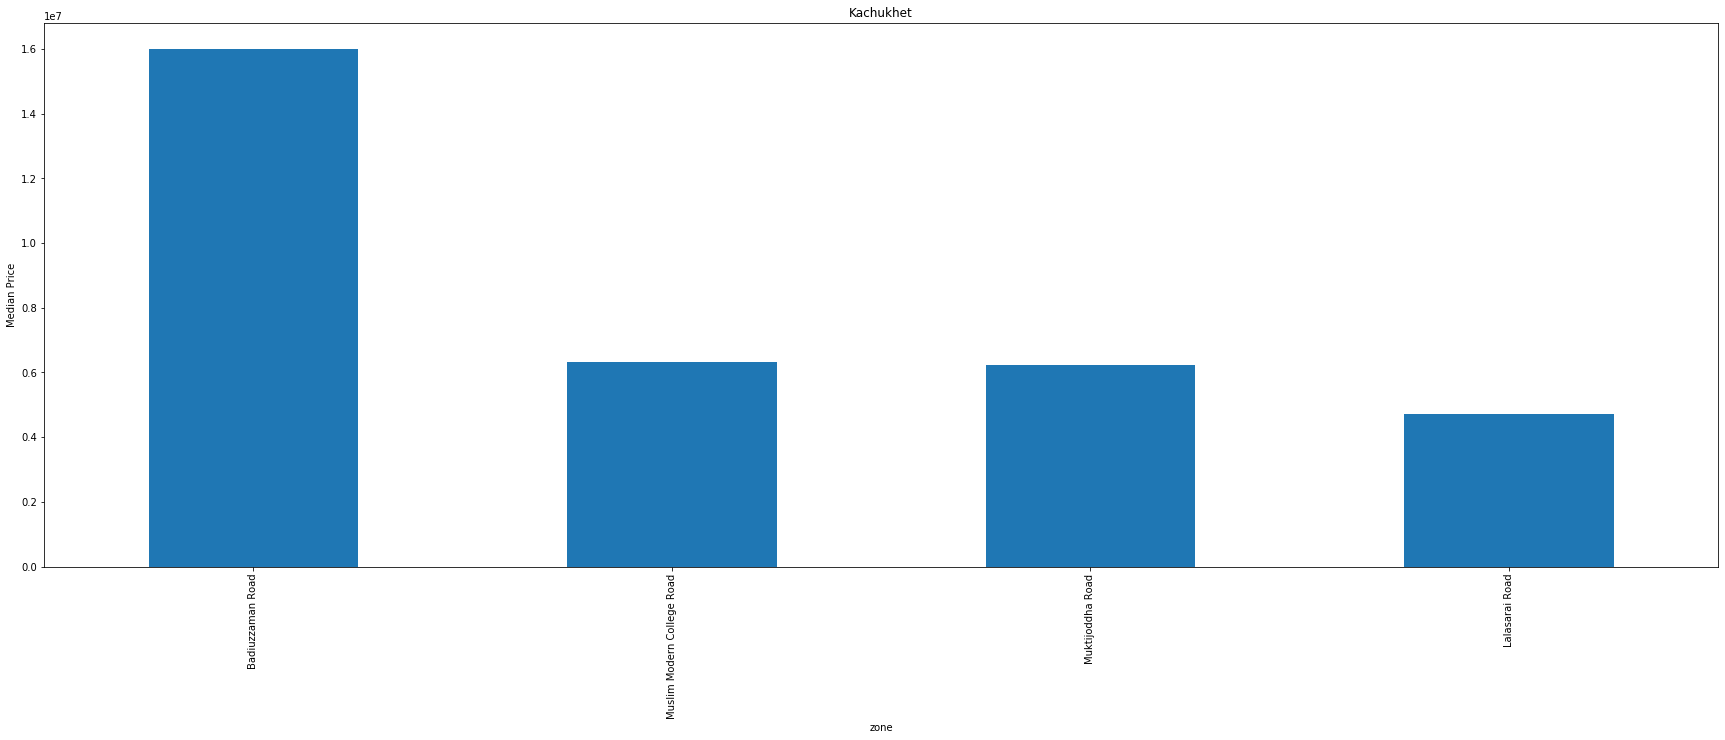

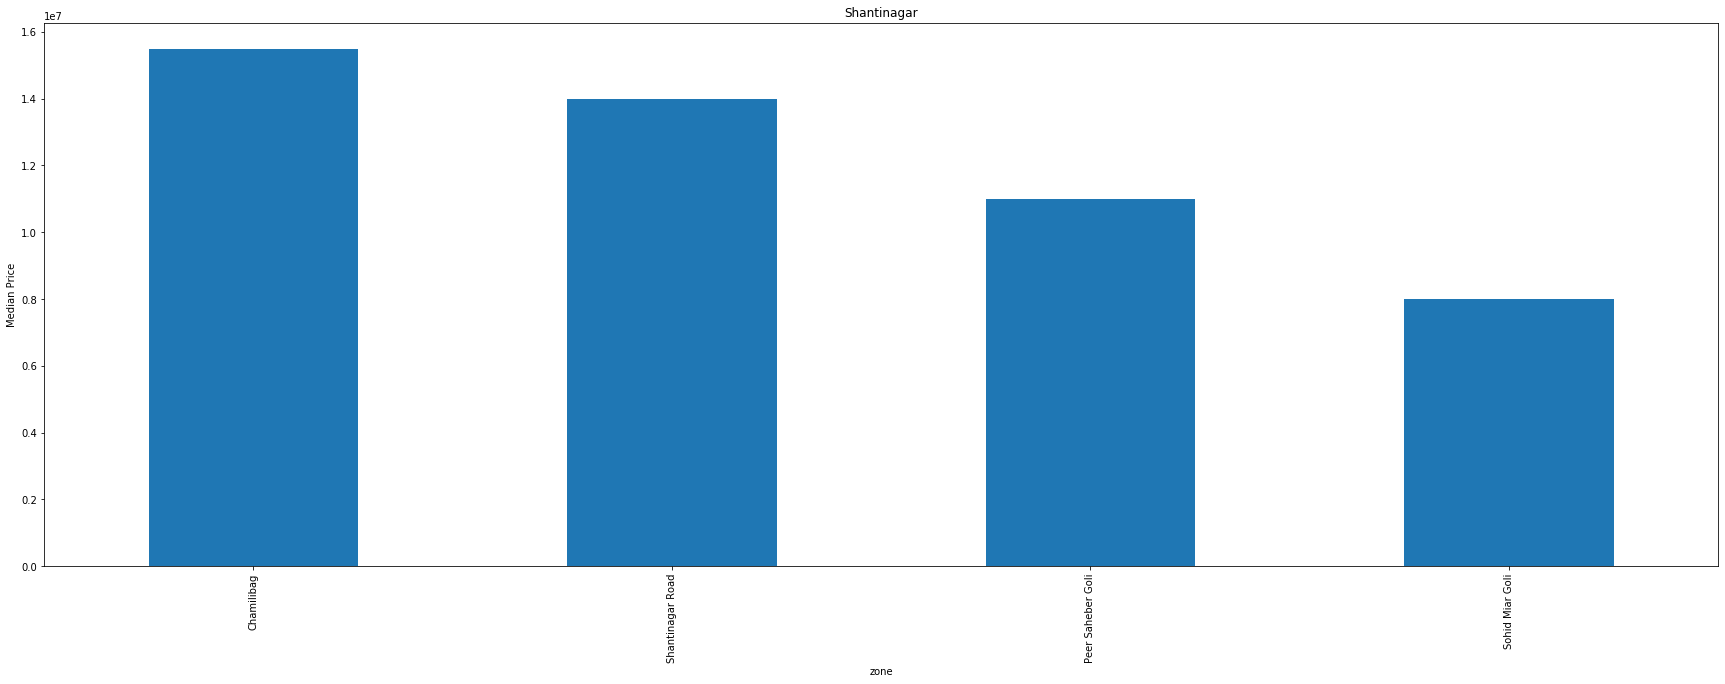

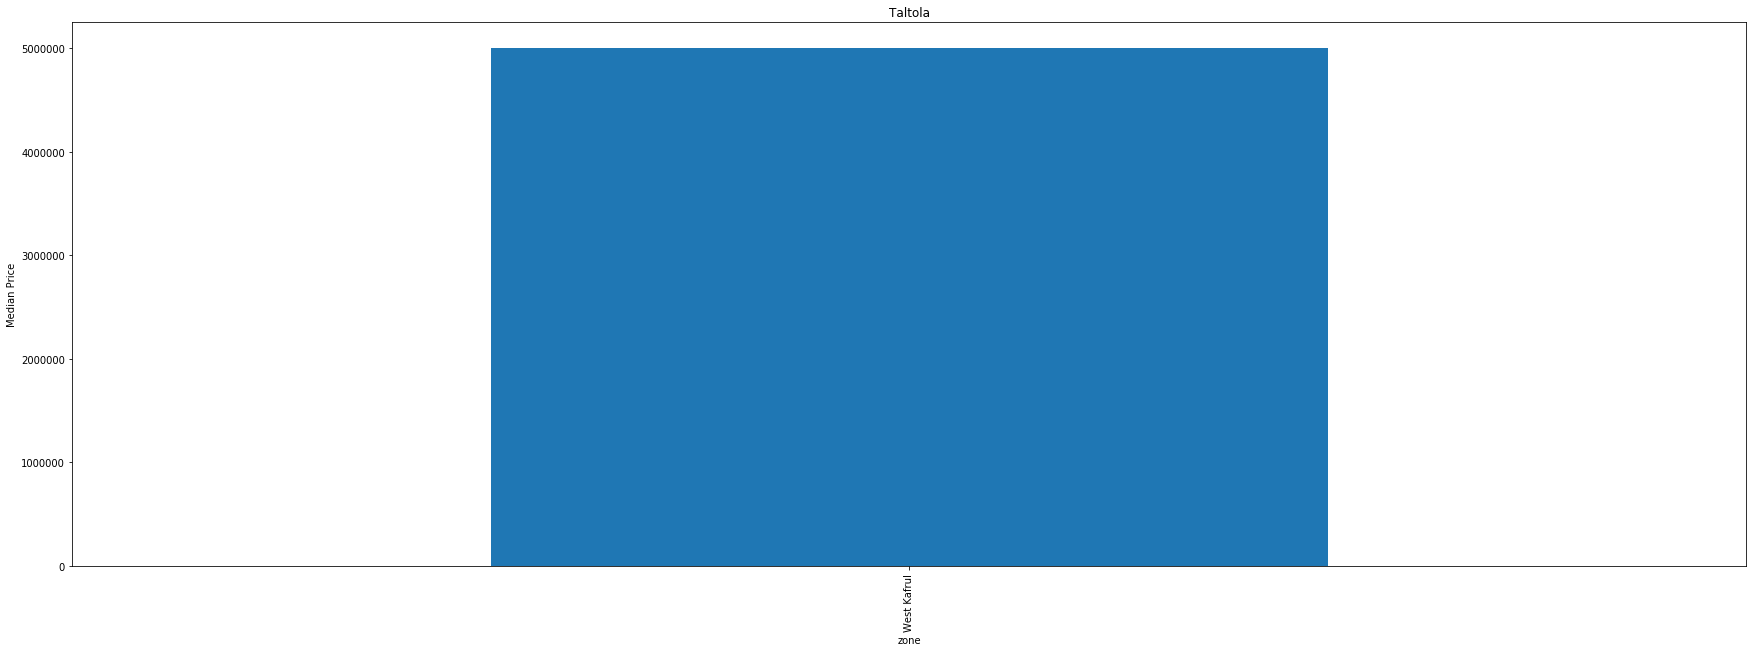

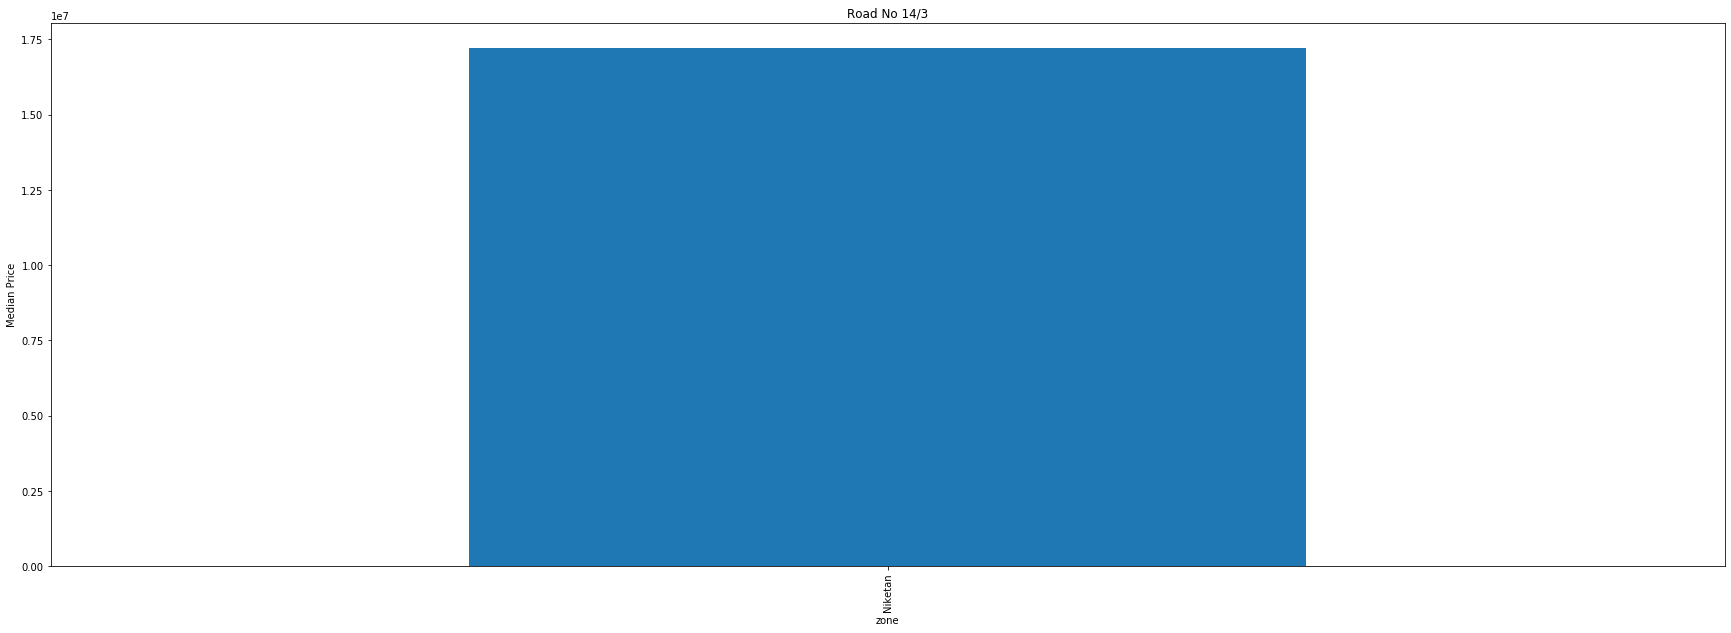

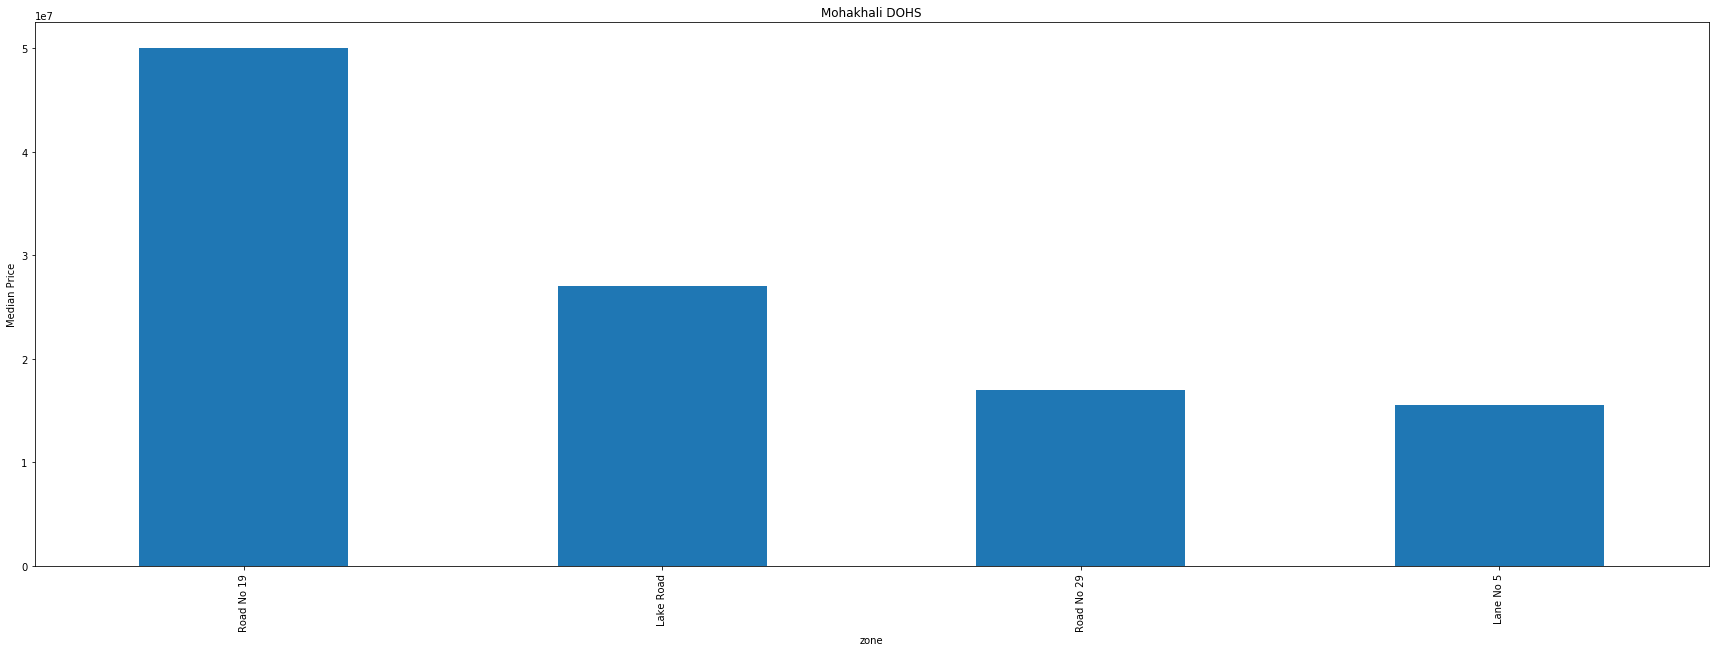

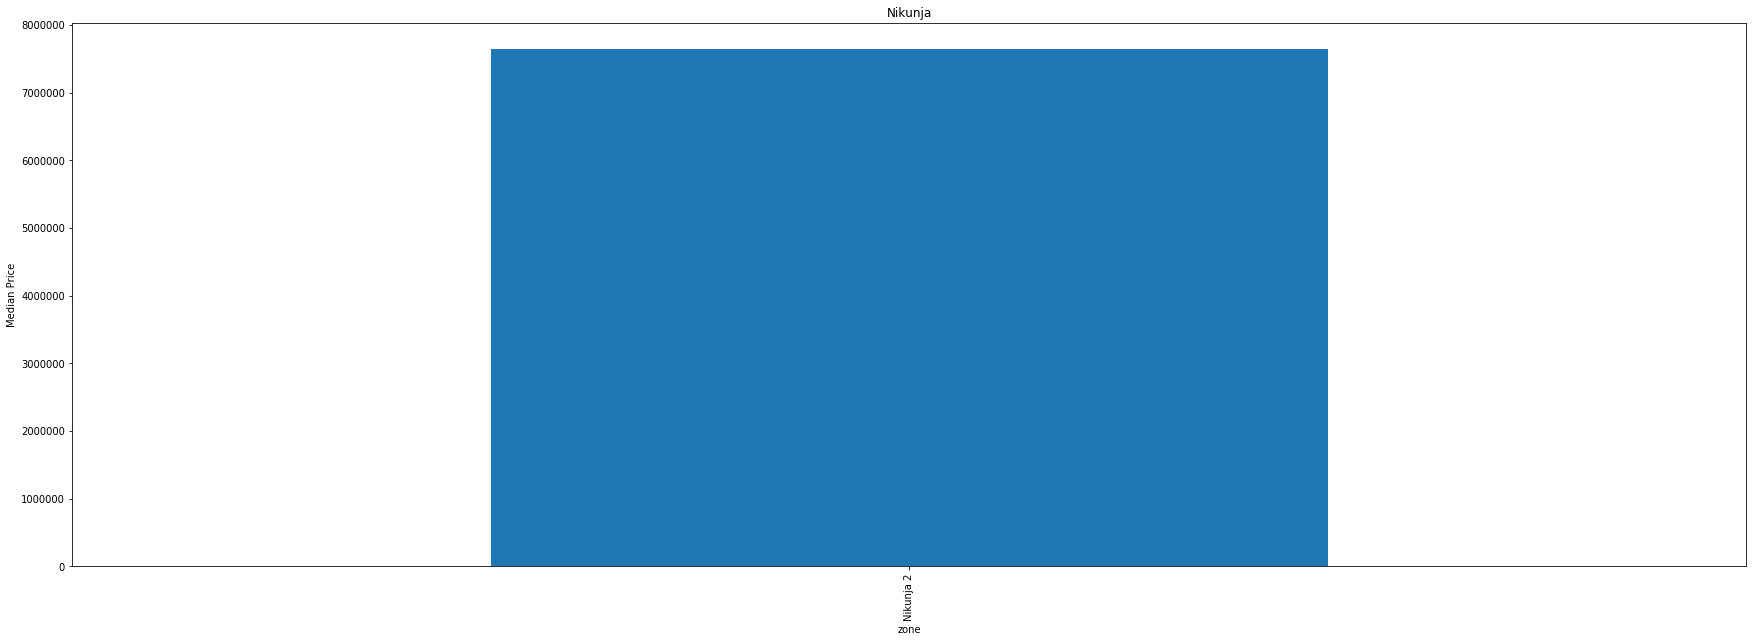

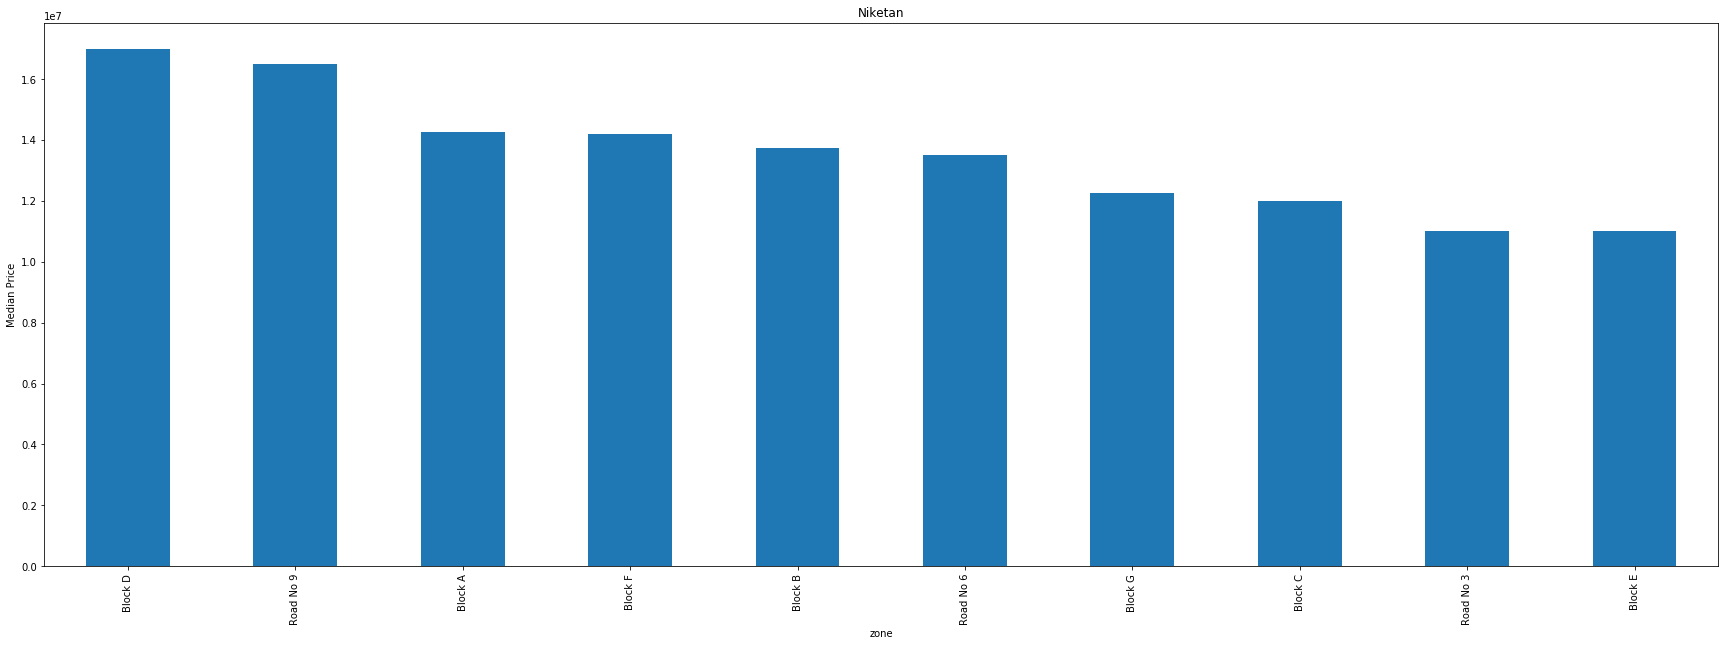

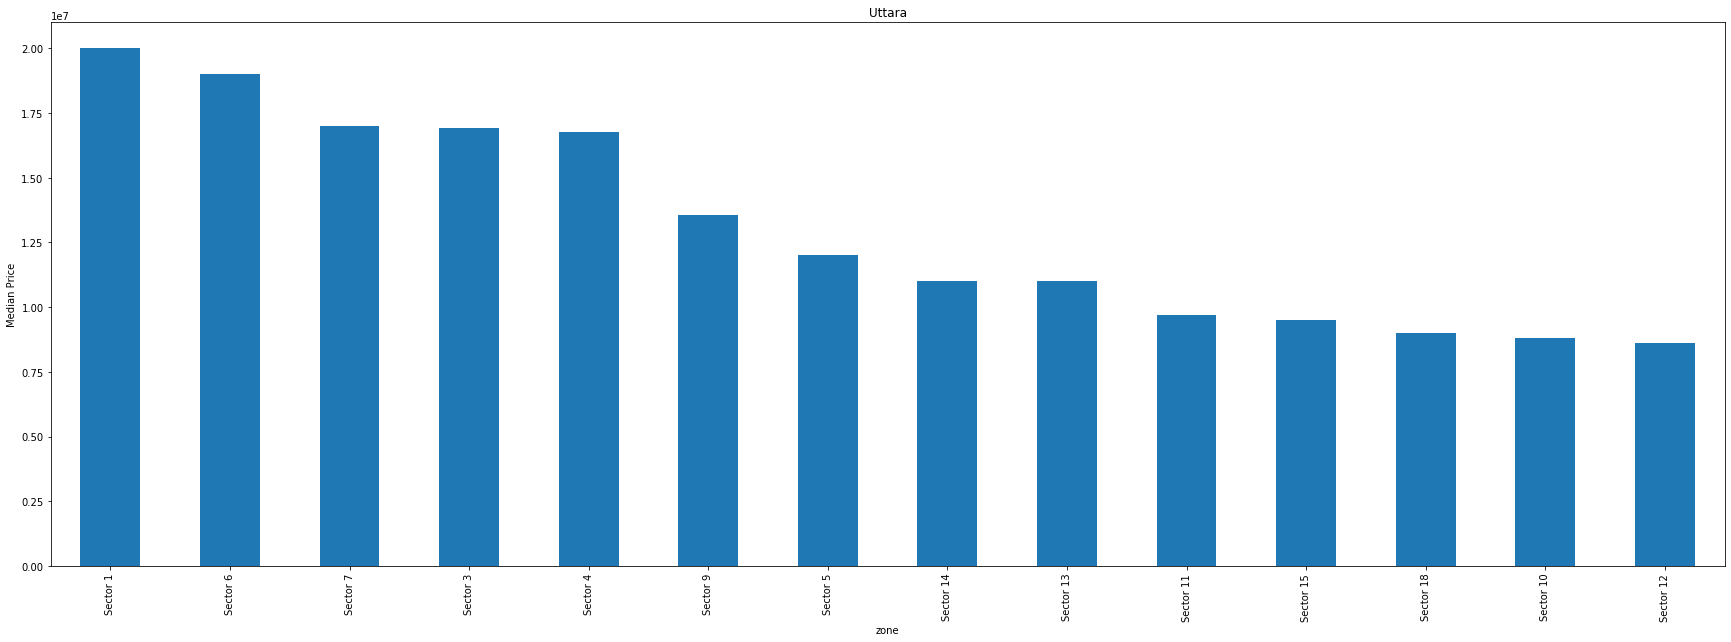

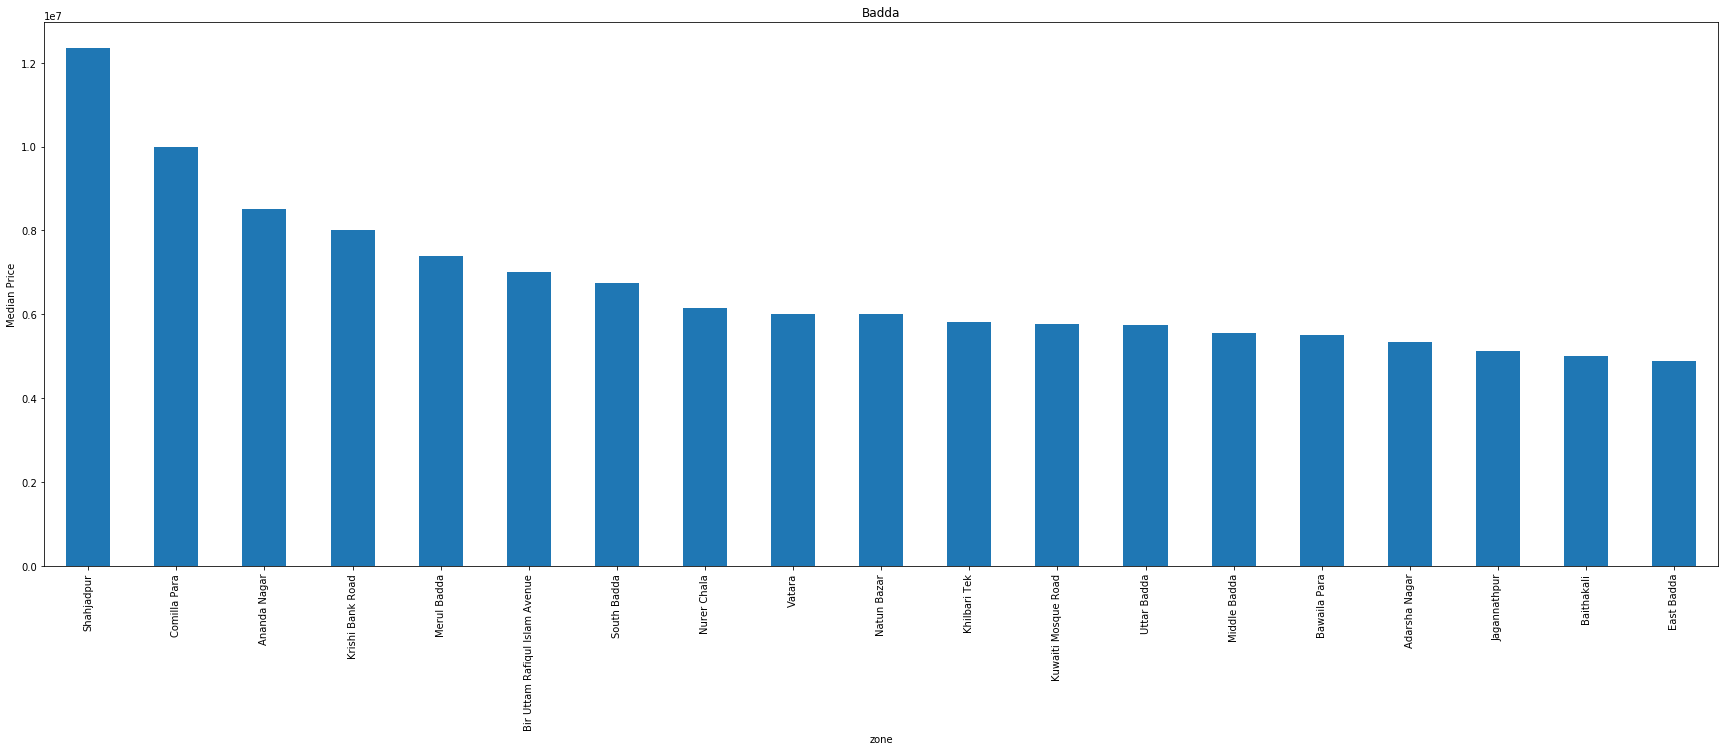

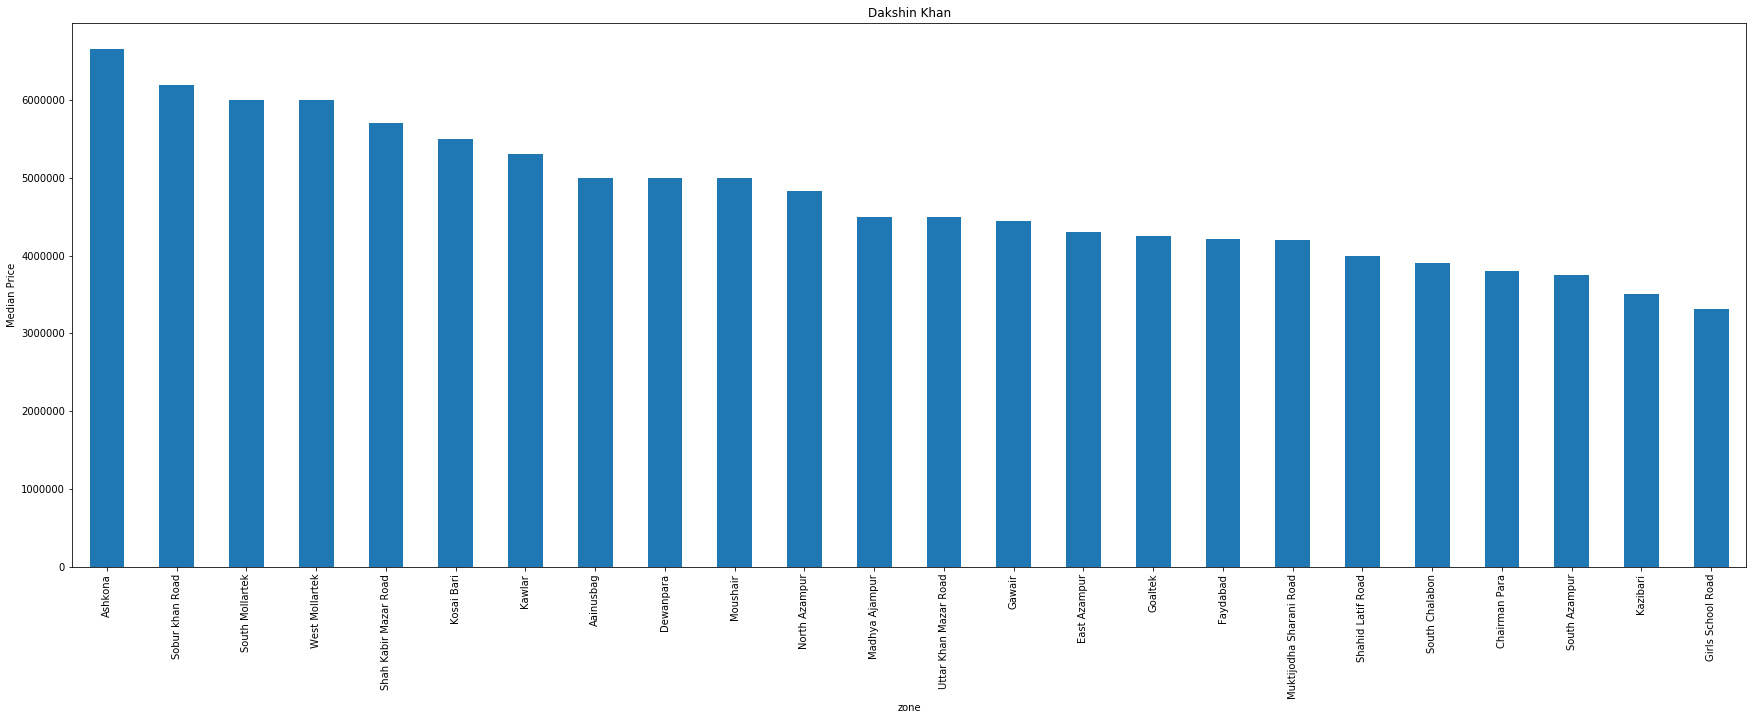

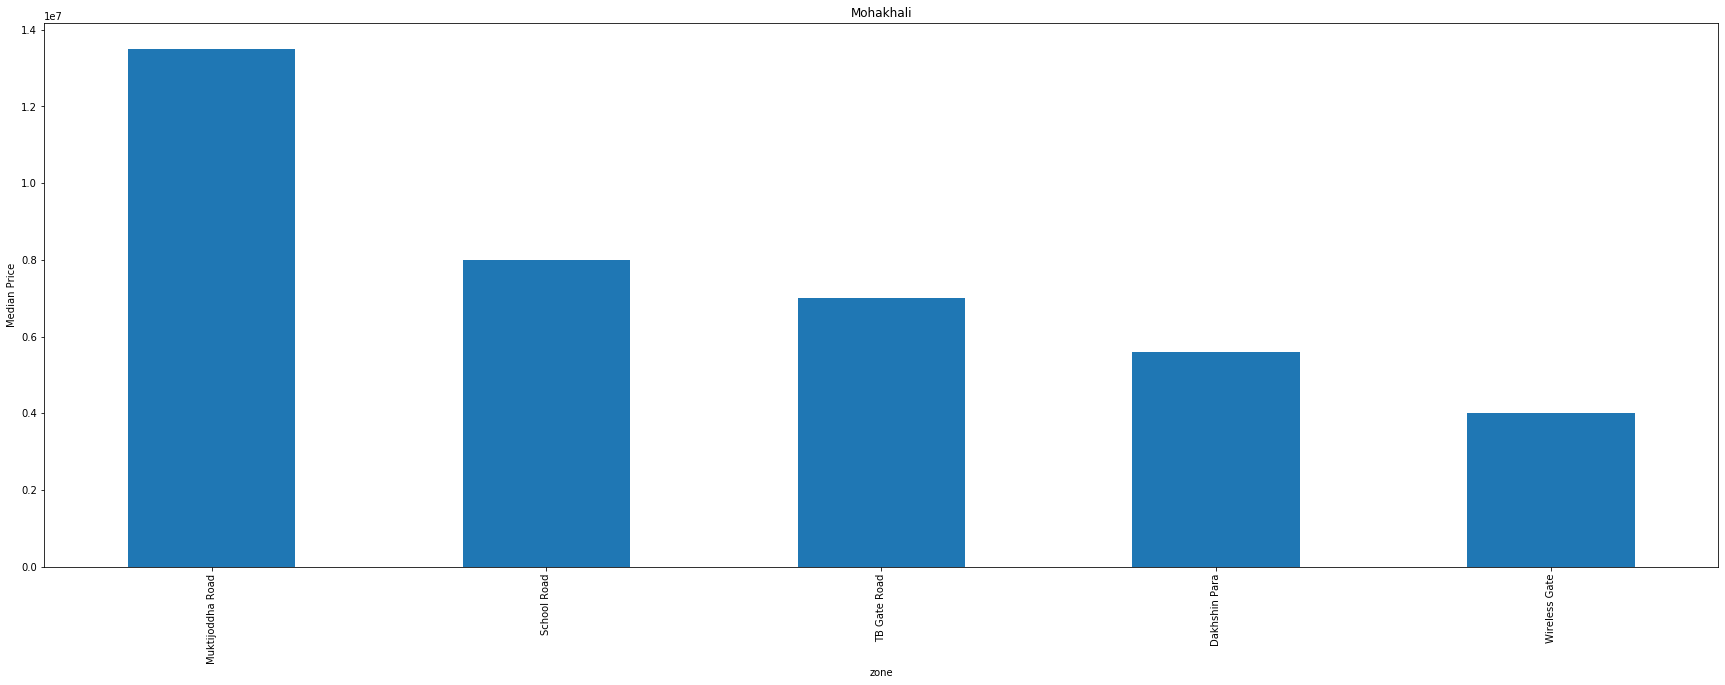

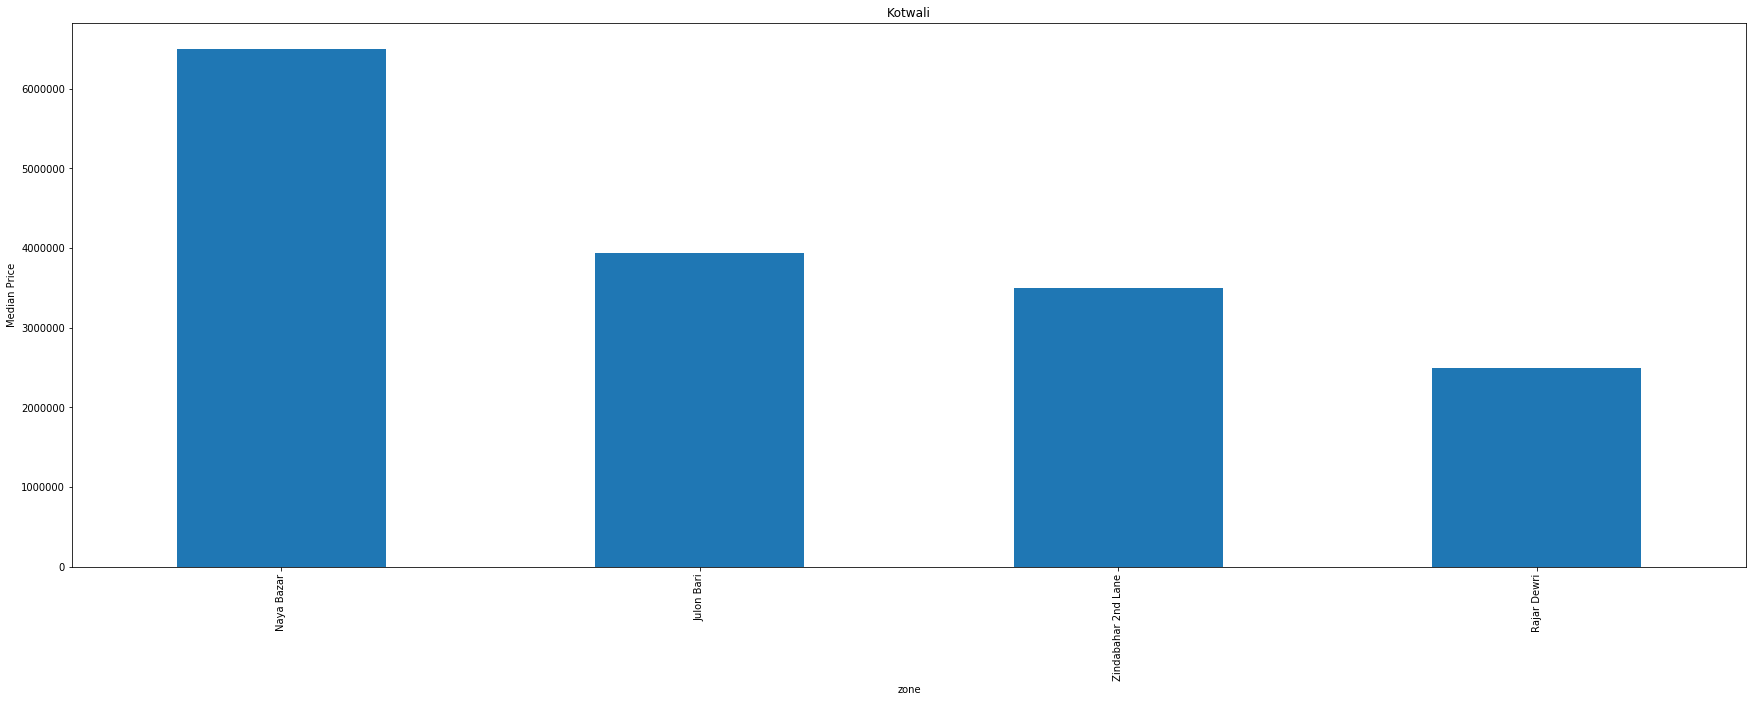

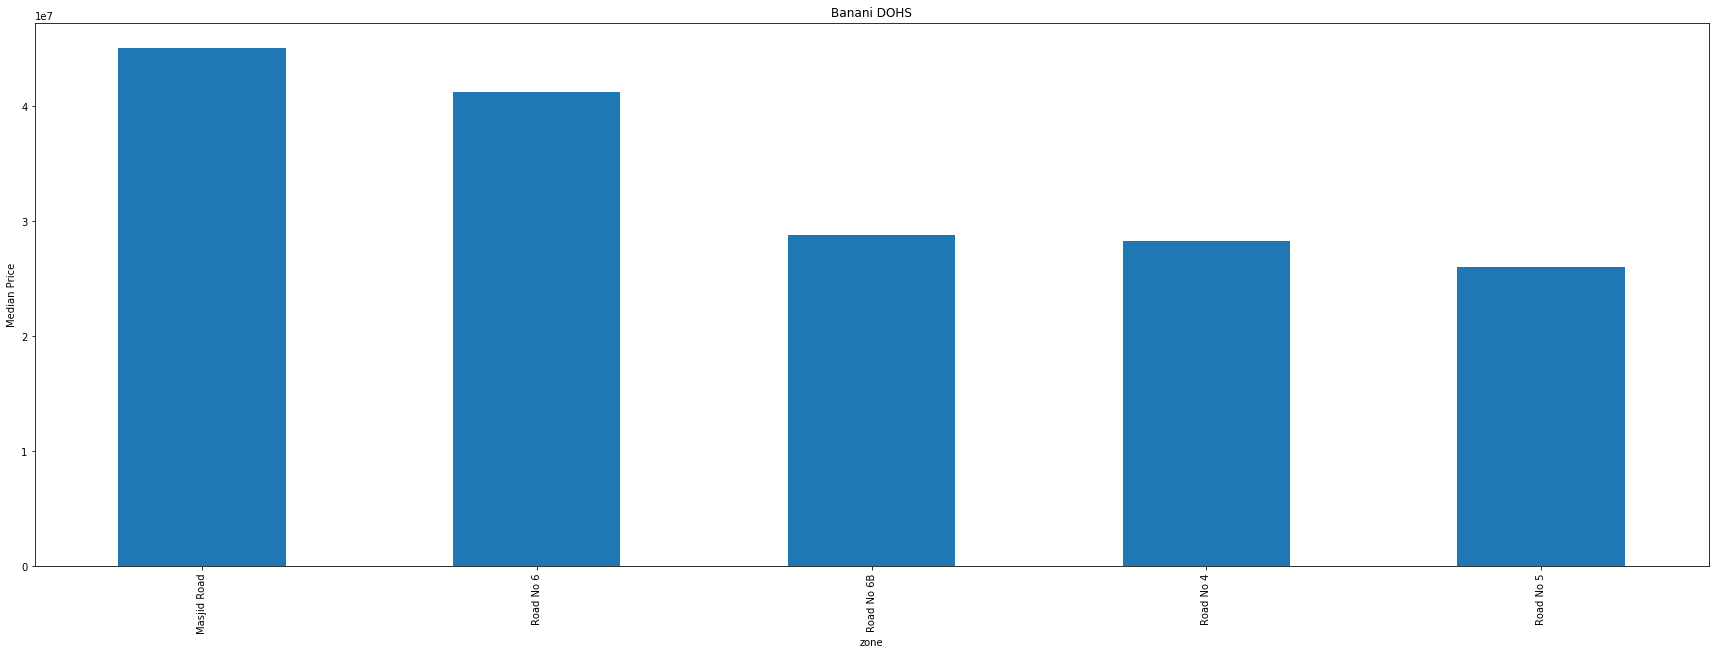

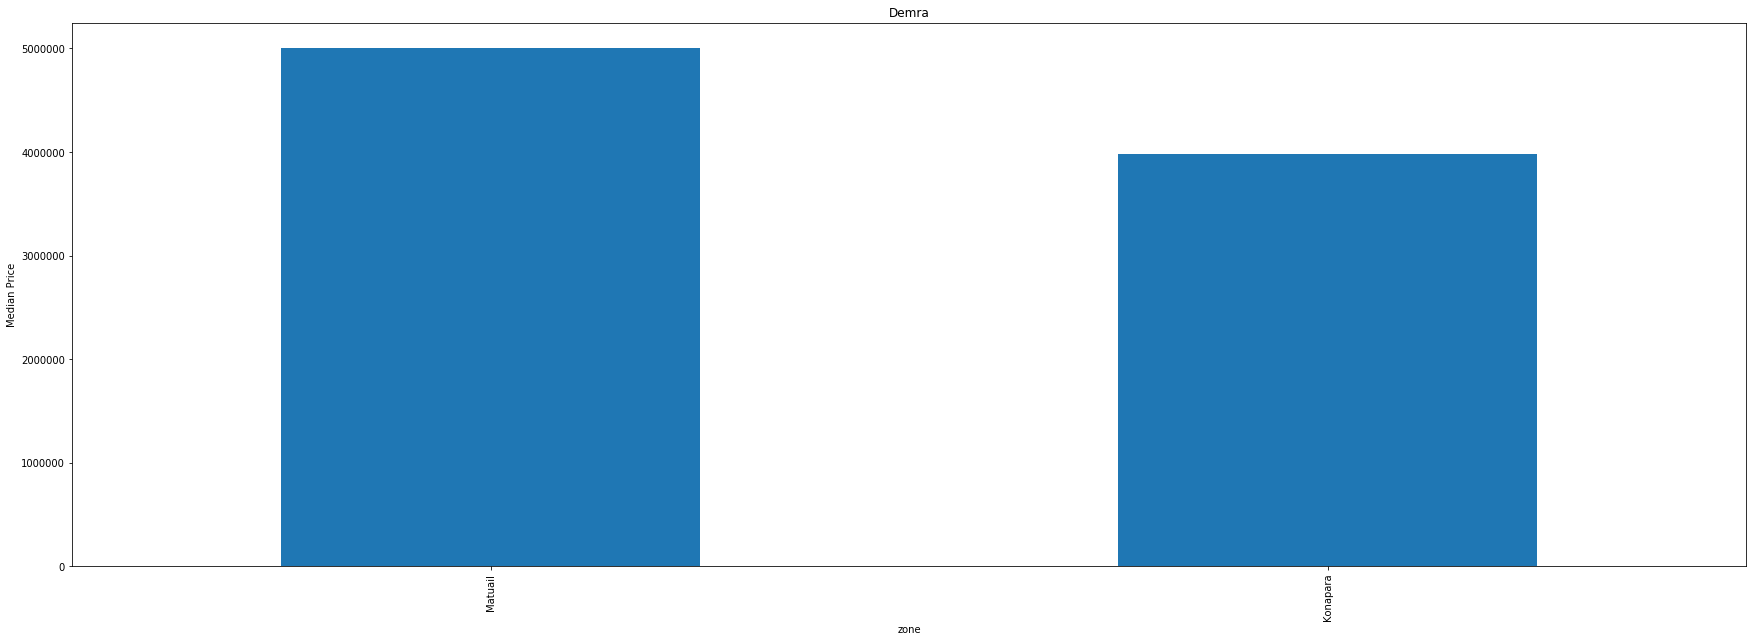

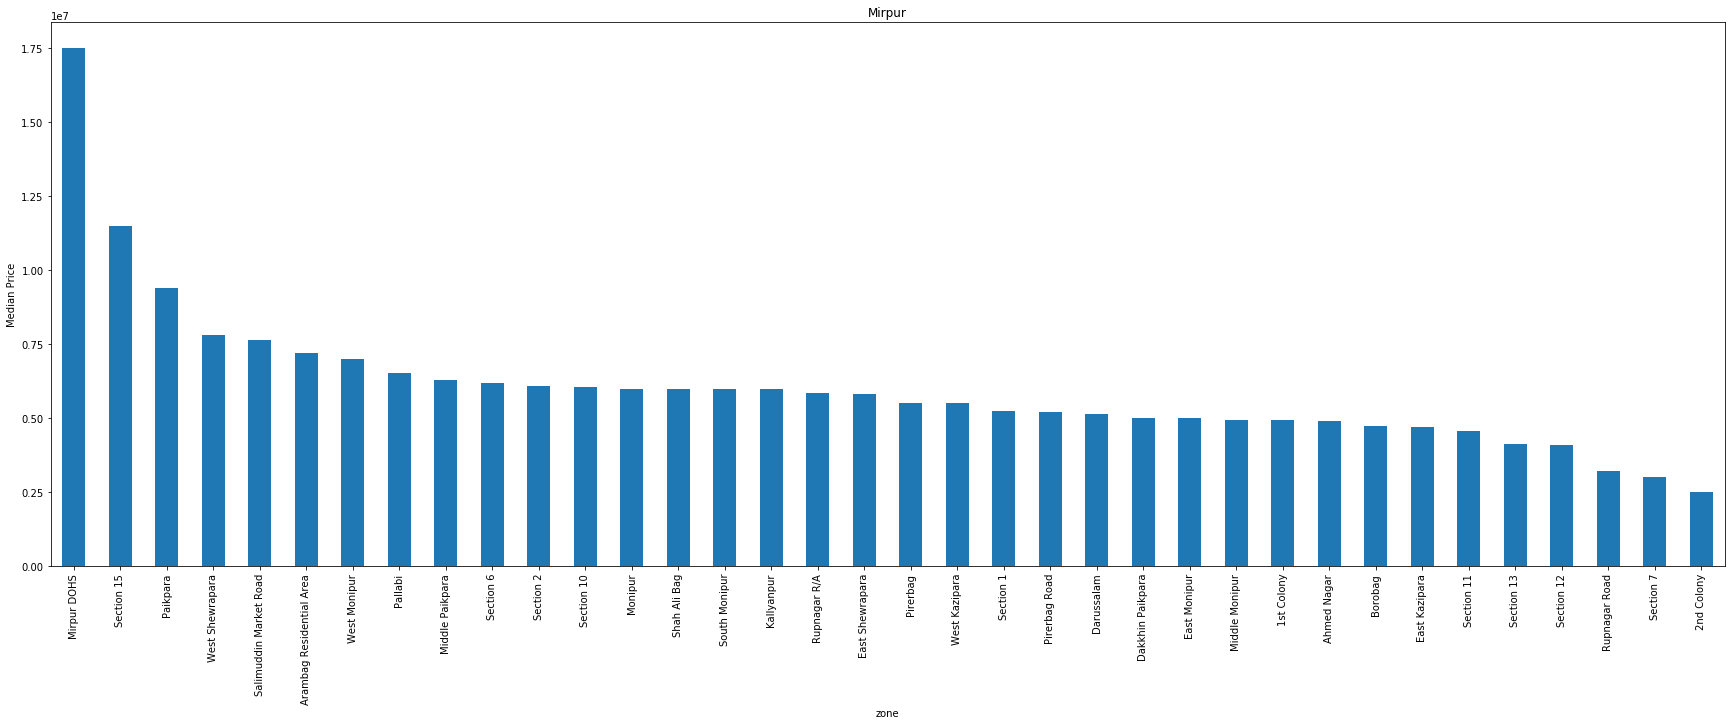

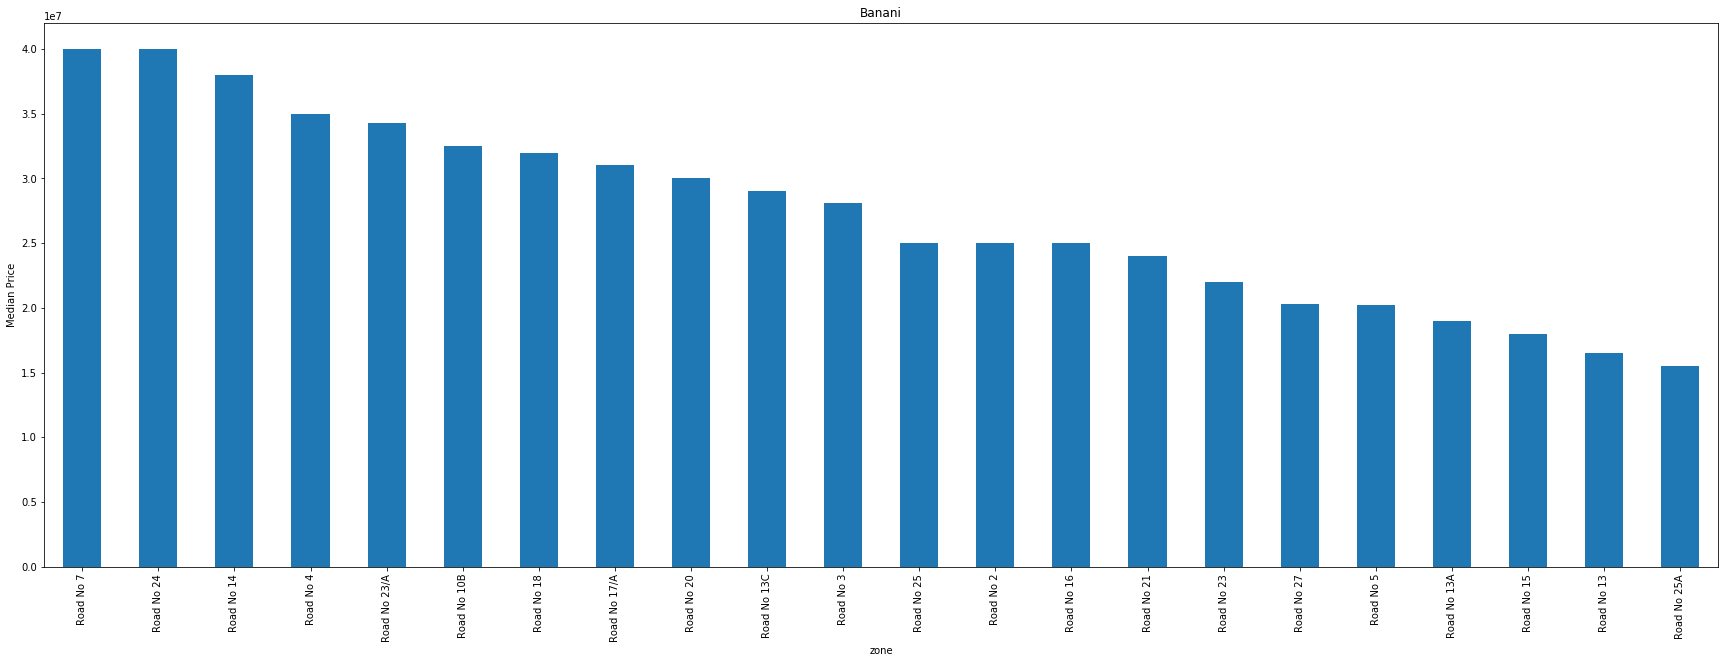

In [106]:
#see avg price across different zones of the same area of Dhaka city
#there are quite a bit of strong differences in price in the same area
#depending on which part of the area the property is located at
for area in list(set(data['area'])):
    area_data = data.loc[data['area'] == area]
    area_data.groupby('zone')['price'].median().sort_values(ascending=False).plot.bar()
    plt.rcParams["figure.figsize"] = (30,10)
    plt.title(area)
    plt.ylabel('Median Price')
    plt.show()

In [107]:
len(data)

8900

In [108]:
#Part 2 - Feature Engineering

In [109]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

cat_vars = ['zone', 'area']

In [110]:
# make a list of the categorical variables that contain missing values

vars_with_na = [var for var in cat_vars if data[var].isnull().sum() > 0 ]

# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [111]:
#there is no missing value in categorical columns, otherwise we would have marked those as "missing" 
#and then process later during label encoding

In [112]:
# make a list with the numerical variables that contain missing values
vars_with_na = [var for var in num_vars if data[var].isnull().sum() > 0]

# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

bed     0.000337
bath    0.000337
dtype: float64

In [113]:
#since the percentage of missing values is negligibly small, 
# we will drop thise rows. Otherwise we would have calculated the 
#most frequent value in each of those cols by "mode()" function and
#replace the missing by mode()

#dropping the rows with missing values 
data = data.dropna()


In [114]:
#transform the numerical (not the discrete ones) variables into normal distribution
# by log transformation
num_vars = list(set(num_vars) - set(discrete_vars))
for var in num_vars:
    data[var] = np.log(data[var])

In [115]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)['price'].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(data, var, 0.01)
    print(frequent_ls)
    
    # replace rare categories by the string "Rare"
    data[var] = np.where(data[var].isin(frequent_ls), data[var], 'Rare')
    

Index(['Ashkona', 'Block A', 'Block B', 'Block C', 'Block D', 'Block E',
       'Block F', 'Block G', 'Block I', 'Chandrima Model Town', 'East Rampura',
       'Faydabad', 'Pallabi', 'Section 1', 'Section 10', 'Section 12',
       'Section 2', 'Sector 10', 'Shahjadpur', 'South Banasree Project',
       'Uttar Badda', 'West Dhanmondi and Shangkar', 'West Rampura'],
      dtype='object', name='zone')
Index(['Adabor', 'Aftab Nagar', 'Agargaon', 'Badda', 'Banasree', 'Bashabo',
       'Bashundhara R-A', 'Dakshin Khan', 'Dhanmondi', 'Gulshan', 'Hazaribag',
       'Khilgaon', 'Malibagh', 'Mirpur', 'Mohammadpur', 'Mugdapara', 'Rampura',
       'Savar', 'Uttara'],
      dtype='object', name='area')


In [116]:
data.groupby('area')['price'].count()

area
Adabor              152
Aftab Nagar         158
Agargaon             94
Badda               591
Banasree            517
Bashabo             213
Bashundhara R-A     671
Dakshin Khan        464
Dhanmondi           277
Gulshan             121
Hazaribag           119
Khilgaon            166
Malibagh            215
Mirpur             1672
Mohammadpur         563
Mugdapara           105
Rampura             359
Rare               1602
Savar               129
Uttara              709
Name: price, dtype: int64

In [117]:
data['zone'].unique()

array(['Rare', 'Section 1', 'Uttar Badda', 'Block F',
       'South Banasree Project', 'Block C', 'Block D',
       'West Dhanmondi and Shangkar', 'Section 10', 'Block I',
       'Shahjadpur', 'Faydabad', 'Block A', 'Pallabi', 'Block G',
       'Block E', 'Sector 10', 'Ashkona', 'Section 12',
       'Chandrima Model Town', 'Section 2', 'Block B', 'East Rampura',
       'West Rampura'], dtype=object)

In [118]:
data.head()

,bed,bath,total_sqft,price,zone,area
0,3.0,3.0,7.207860,15.816991,Rare,Mirpur
1,3.0,2.0,7.170120,15.573368,Section 1,Mirpur
2,2.0,2.0,6.396930,14.771022,Rare,Mohammadpur
3,2.0,2.0,6.396930,14.771022,Rare,Mohammadpur
4,3.0,2.0,7.003065,15.894952,Rare,Rare


In [119]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean price


def replace_categories(df, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = df.groupby([var])[target].mean().sort_values().index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    print(ordinal_label)

    # use the dictionary to replace the categorical strings by integers
    data[var] = df[var].map(ordinal_label)
    

for var in cat_vars:
    replace_categories(data, var, 'price')

{'Faydabad': 0, 'Section 12': 1, 'Chandrima Model Town': 2, 'Section 1': 3, 'East Rampura': 4, 'Uttar Badda': 5, 'Section 10': 6, 'Section 2': 7, 'South Banasree Project': 8, 'Ashkona': 9, 'Pallabi': 10, 'West Rampura': 11, 'Rare': 12, 'West Dhanmondi and Shangkar': 13, 'Sector 10': 14, 'Block E': 15, 'Block F': 16, 'Block G': 17, 'Shahjadpur': 18, 'Block B': 19, 'Block I': 20, 'Block D': 21, 'Block C': 22, 'Block A': 23}
{'Savar': 0, 'Dakshin Khan': 1, 'Khilgaon': 2, 'Mirpur': 3, 'Hazaribag': 4, 'Agargaon': 5, 'Mohammadpur': 6, 'Bashabo': 7, 'Mugdapara': 8, 'Rampura': 9, 'Badda': 10, 'Banasree': 11, 'Adabor': 12, 'Malibagh': 13, 'Rare': 14, 'Aftab Nagar': 15, 'Dhanmondi': 16, 'Uttara': 17, 'Bashundhara R-A': 18, 'Gulshan': 19}


In [120]:
data.groupby('area')['price'].median().sort_values(ascending=True)

area
0     14.946913
2     15.408006
1     15.424948
6     15.567142
9     15.607270
3     15.607270
5     15.623665
4     15.645288
10    15.647692
7     15.656060
8     15.682687
11    15.761421
14    15.789592
12    15.830414
13    15.830414
15    15.902424
16    16.012735
17    16.213406
18    16.341239
19    17.516813
Name: price, dtype: float64

In [121]:
replace_categories(data, 'area', 'price')

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}


In [122]:
data.head()

,bed,bath,total_sqft,price,zone,area
0,3.0,3.0,7.207860,15.816991,12,3
1,3.0,2.0,7.170120,15.573368,3,3
2,2.0,2.0,6.396930,14.771022,12,6
3,2.0,2.0,6.396930,14.771022,12,6
4,3.0,2.0,7.003065,15.894952,12,14


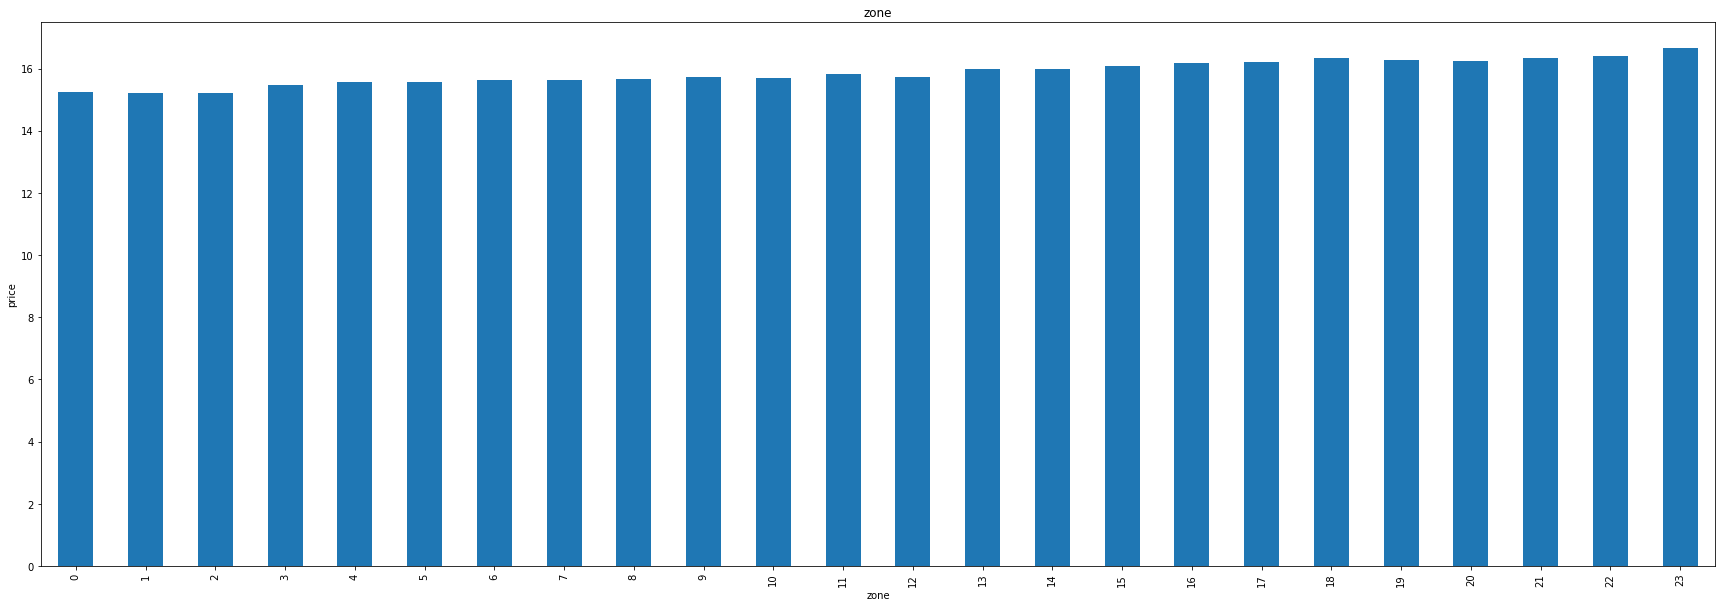

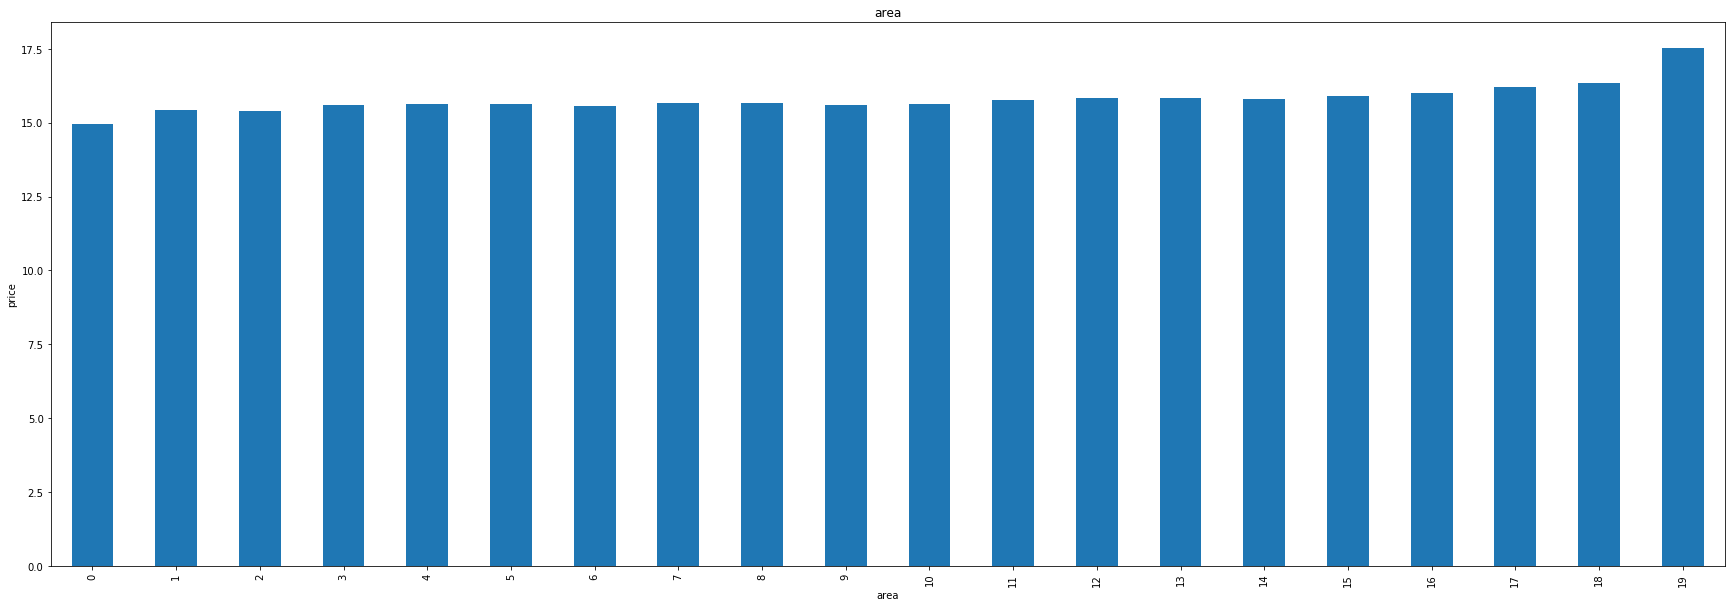

In [123]:
# let me show you what I mean by monotonic relationship
# between labels and target

def analyse_vars(df, var):
    
    # function plots median house sale price per encoded
    # category
    
    df = df.copy()
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in cat_vars:
    analyse_vars(data, var)

In [124]:
# capture all variables in a list
# for scaling except the target

features = [var for var in data.columns if var not in ['price']]

# count number of variables
len(features)

5

In [125]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the data
scaler.fit(data[features]) 

# transform the train and test set
data[features] = scaler.transform(data[features])


In [126]:
#print the max and min values from all the features to see their range normalized
for var in features:
    print('\t', '  Max', '      Min')
    print(var, data[var].max(), data[var].min())

	   Max       Min
bed 1.0000000000000002 0.0
	   Max       Min
bath 0.9999999999999999 0.0
	   Max       Min
total_sqft 1.0 0.0
	   Max       Min
zone 1.0 0.0
	   Max       Min
area 1.0 0.0


In [127]:
data.head()

,bed,bath,total_sqft,price,zone,area
0,0.4,0.333333,0.411020,15.816991,0.521739,0.157895
1,0.4,0.166667,0.398267,15.573368,0.130435,0.157895
2,0.2,0.166667,0.137007,14.771022,0.521739,0.315789
3,0.2,0.166667,0.137007,14.771022,0.521739,0.315789
4,0.4,0.166667,0.341820,15.894952,0.521739,0.736842


In [128]:
# Part 3 - Feature selection

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [129]:
#Now that our dataset is properly analysed, cleaned and processed, it's time to split it into train and test

# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
X = data.drop('price', axis='columns')
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    # setting the seed here:
                                                    random_state=0)  

X_train.shape, X_test.shape

((7117, 5), (1780, 5))

In [130]:
y_train

1413    15.959979
4072    16.341239
3566    15.232577
2009    15.483217
2065    15.725053
3152    15.607270
1547    15.319588
5399    15.761421
7032    16.929026
5263    15.068274
308     15.424948
7716    15.687313
6500    15.018483
3761    15.684231
5164    15.814284
5909    16.213406
1605    15.297115
6061    15.384126
2528    15.830414
5484    16.951005
3043    15.414898
3952    16.440179
1081    15.172634
7349    17.327056
7542    15.761421
214     15.743402
6862    14.731801
4579    15.150512
7726    15.910456
70      14.639686
4430    16.523561
1398    16.677711
7149    15.039286
4827    16.468753
3976    16.380460
953     15.424948
7386    15.424948
5051    16.454568
1690    16.811243
1722    15.573368
2521    16.705882
6375    15.978834
2227    15.949677
4714    15.894952
2615    14.914123
4133    16.418200
4482    15.250595
8265    16.993564
8279    15.214227
3239    15.424948
7780    16.425580
230     15.096444
3585    15.869634
2851    15.830414
5372    15.585365
865     15

In [131]:
X.head()

,bed,bath,total_sqft,zone,area
0,0.4,0.333333,0.411020,0.521739,0.157895
1,0.4,0.166667,0.398267,0.130435,0.157895
2,0.2,0.166667,0.137007,0.521739,0.315789
3,0.2,0.166667,0.137007,0.521739,0.315789
4,0.4,0.166667,0.341820,0.521739,0.736842


In [132]:
# next step should be feature selection but since this dataset is a very little in 
# dimention we can skip that part. 

In [133]:
X_train.head()

,bed,bath,total_sqft,zone,area
1413,0.4,0.333333,0.429289,0.521739,0.157895
4072,0.6,0.500000,0.498709,0.521739,0.894737
3566,0.2,0.166667,0.244612,0.521739,0.157895
2009,0.4,0.333333,0.309614,0.521739,0.736842
2065,0.4,0.333333,0.446621,0.521739,0.157895


In [134]:
#finally, now we can train the model

# set up the model
# remember to set the random_state / seed

#lin_model = Lasso(alpha=0.005, random_state=0)
lin_model = LinearRegression()
# train the model

lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
# evaluate the model:
# ====================

# remember that we log transformed the output (SalePrice)
# in our feature engineering notebook (step 2).

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and
# the root of the mean squared error and r2

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 17491984289064
train rmse: 4182341
train r2: 0.7469497756092174

test mse: 19921865334467
test rmse: 4463391
test r2: 0.760830358689243

Average house price:  6999999


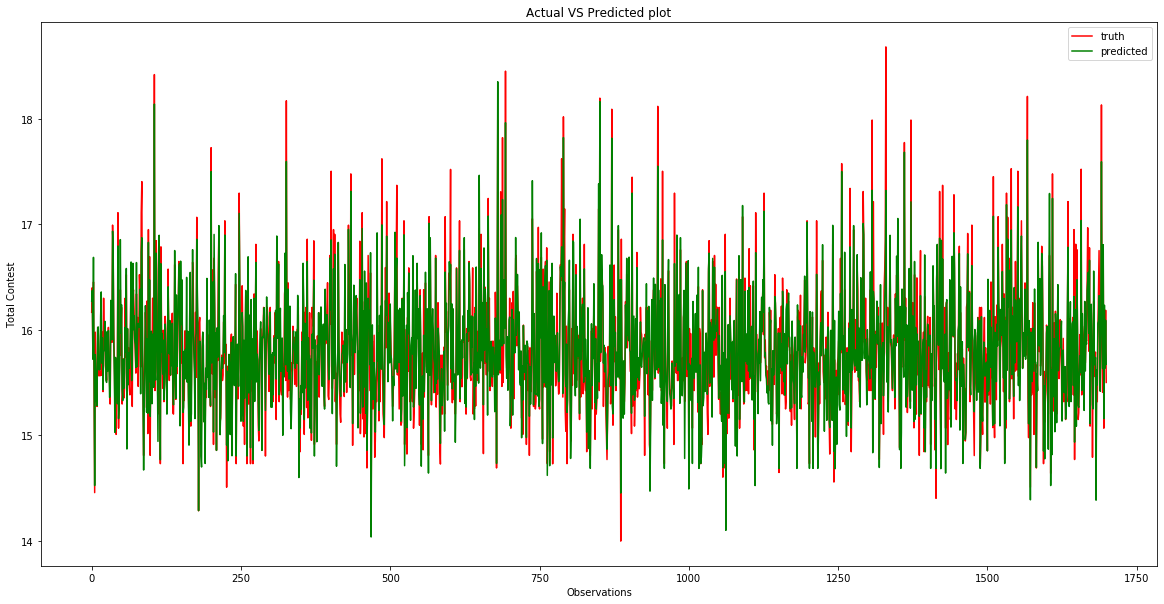

In [136]:
# let's evaluate our predictions with respect to the real price
x = []
for i in range(1700):
    x.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(x, y_test[:1700], label = "truth", color='red')
plt.plot(x, pred[:1700], label = "predicted", color='green')

plt.xlabel('Observations')
plt.ylabel('Total Contest')
plt.title('Actual VS Predicted plot')
plt.legend()

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

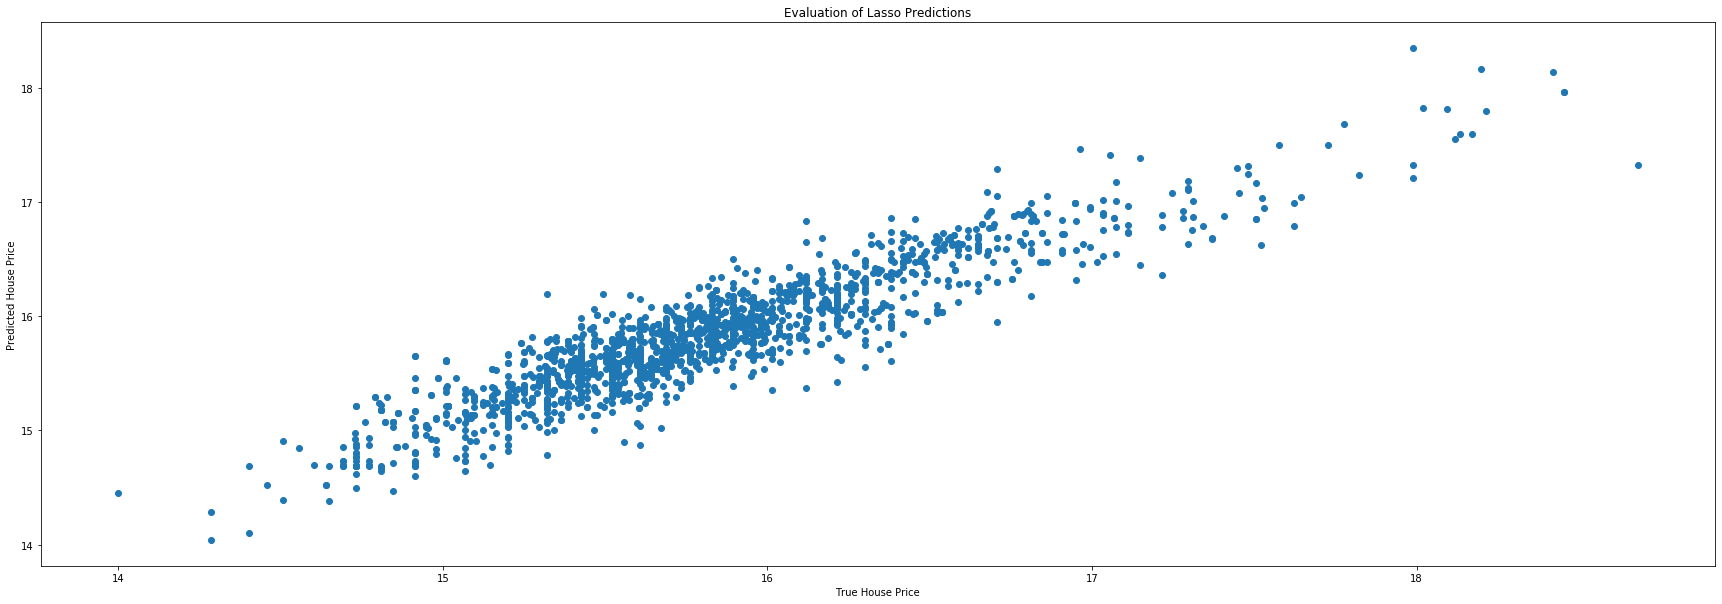

In [137]:
# another way of looking into the model evaluation
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

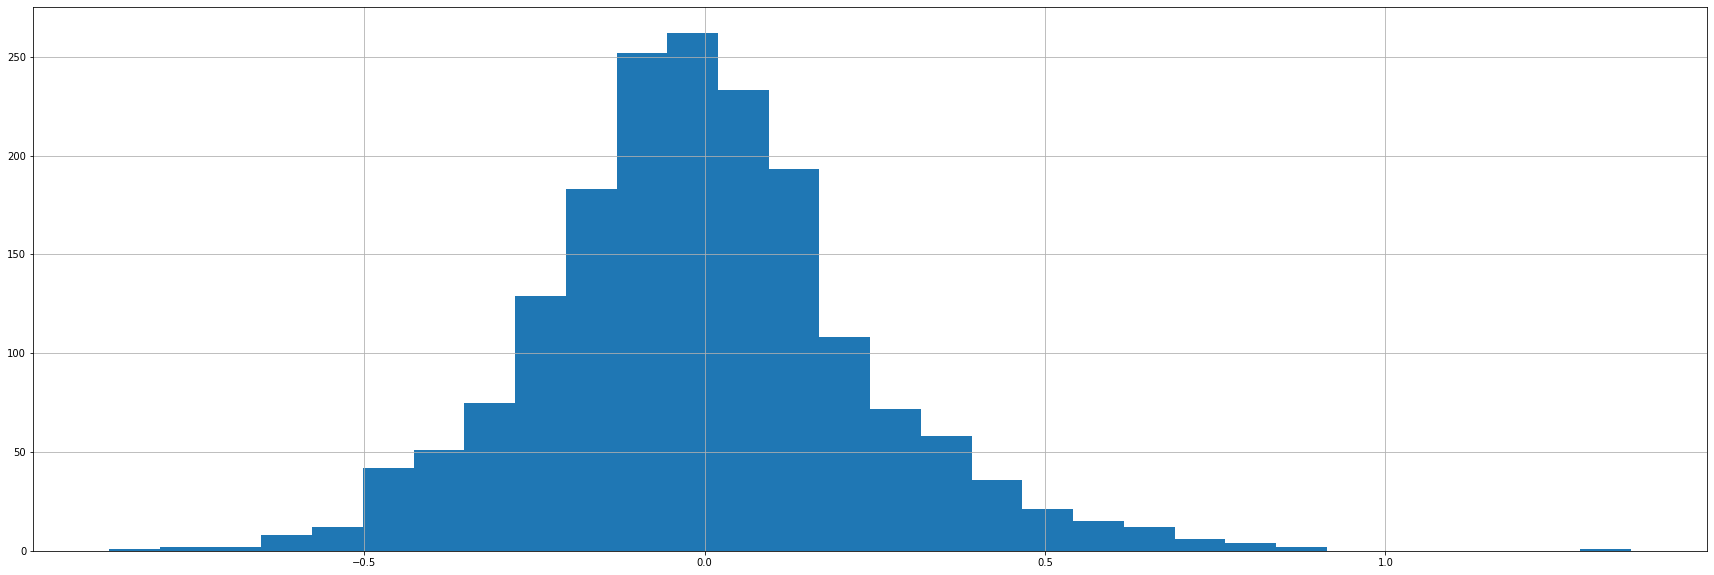

In [138]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=30)